#Исходные данные

проект в GitHub

https://github.com/terrainternship/Radlogics

работы группы 1

https://drive.google.com/drive/folders/1VC34hz6sBAGXYkOc0RbO9-orvThlEXU9

https://drive.google.com/drive/folders/1LHl3mlqN2NERj1xq7aixOTDQH5bkNgwX

**Управление файлами в Google Colab**

https://medium.com/nuances-of-programming/%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D0%B0%D0%B9%D0%BB%D0%B0%D0%BC%D0%B8-%D0%B2-google-colab-8ea813ca20ab

форма для вопросов заказчику

https://docs.google.com/spreadsheets/d/1t8jnHupBSC5hmIn4Rbf7rmR4UbTL9xSGItKXPakkb0E/edit#gid=0

данные для датасета из медицинского репозитория

https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=68551327#685513270a399f0788834f03a790298161149ef6

документ по снимкам

https://radiologyupdate.org/f/2018/10/CT%20scan%20attenuation%20value%20measurement%20as%20a%20diag-%20nostic%20tool%20for%20patients%20with%20pleural%20e%20usions-2.pdf

ссылка на общую папку (на Гугле диске Андрея С.): https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76

ссылка на папку Archive с файлом Dataset.zip: https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l

ссылка на Dataset.zip: https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link


ID файла = 1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG

**библиотеки, программы для работы со снимками:**

**MultiVox Dicom Viewer**	программа для просмотра файлов DICOM

-----------------------------------

Для просмотра изображений .dcm подойдет совместимая с форматом DICOM программа, например, бесплатный графический редактор **GIMP** - https://open-file.ru/programs/gimp

**nibabel** - библиотека для чтения и записи файлов изображений и данных медицинской области, таких как MRI и CT сканы. Она поддерживает множество форматов файлов, включая NIfTI, MINC, Analyze и DICOM.

Метод get_data позволяет сэкономить память и получать отдельные срезы (в отличие от get_fdata).

Он вроде как Deprecated, поэтому на время его пользования можно отключать предупреждения:

warnings.filterwarnings('ignore')

img_eff.get_data()[:, :, img_slice]

warnings.filterwarnings('default')

**pydicom** - пакет Python для обработки файлов формата DICOM, который может обрабатывать, включая медицинские изображения (КТ и т. Д.) и отчеты: https://pydicom.github.io/pydicom/stable/auto_examples/index.html

формат DICOM - https://dicom.nema.org/medical/dicom/current/output/chtml/part10/chapter_7.html


TensorFlow Core - Руководства - Сегментация изображения:

https://www.tensorflow.org/tutorials/images/segmentation?hl=ru

**полезная информация**

максимальное число срезов из аппарата КТ = 300

Файл с расширением .dcm. Чем открыть, описание – 3 формата файла: https://open-file.ru/types/dcm

статья про dcm "Анализ файлов dicom" - https://russianblogs.com/article/24941332478/

https://habr.com/ru/articles/252429/

Компьютерная томография сохраняет в файлах рентгеновскую плотность, которая зависит от физической плотности тканей. Кости имеют большую физическую плотность, кровь меньшую и т.д.

Информацию о плотности в DICOM-файле можно представить в виде обычного изображения, у которого есть разрешение, размер пикселя, формат и другие данные. Только вместо информации о цвете в пикселе храниться информация о плотности тканей.

Диагностическая станция производит не один файл, а сразу несколько для одного исследования. Эти фалы имеют логическую структуру. Файлы объединяются в серии и представляют собой набор последовательных срезов какого-либо органа. Серии объединяются в стадии. Стадия определяет всё исследование. Последовательность серий в стадии определяется протоколом исследования.

Пиксель – это наименьший цифровой элемент КТ-изображения, видеть детали менее размера пикселя невозможно. Чтобы узнать размер пикселя, необходимо размер поля реконструкции разделить на размер матрицы реконструкции, которая в современных томографах составляет 512×512. 
Например, если при КТ грудной полости исходное поле реконструкции 40×40 см, то размер пикселя составит 400 мм/512 = 0,8×0,8 мм.

Шкала КТ-плотностей (шкала Хаунсфилда) включает 4096 значений –от -1024 до +3071 единиц Хаунсфилда (HU).

С помощью окна визуализации осуществляется регулировка яркости и контрастности КТ-изображений таким образом, чтобы на экране монитора в шкале серого цвета (256 оттенков серого) были видны только ткани требуемого диапазона плотностей – определенного участка шкалы Хаунсфилда: ткани с меньшей плотностью будут перекрыты черным цветом, ткани с большей плотностью – белым.

Окно визуализации характеризуется параметрами ширины и центра. Ширина окна – это величина разности наибольшего и наименьшего значений КТ чисел, отображаемых на экране монитора в шкале серого цвета. Центр, или уровень, окна – это значение КТ числа, расположенного по середине между наибольшим и наименьшим значениями отображаемого диапазона КТ чисел. Центр окна должен быть как можно ближе к значению плотности тканей, которые требуется отобразить наилучшим образом.

Наконец, не следует забывать о зависимости КТ-чисел от напряжения в рентгеновской трубке. При сканировании пациента на разных томографах или том же аппарате с различными значениями киловольт плотность одного и того же образования может отличаться (больше киловольты – ниже плотность).

https://trauma.ru/content/articles/detail.php?ELEMENT_ID=20460&ysclid=lhozxgb7h766650199

Формат **png**

Диапазон значений, используемый в пикселях для изображений в формате PNG, обычно составляет от 0 до 255. Это означает, что каждый пиксель может иметь значение яркости от полностью черного (0) до полностью белого (255), а также все промежуточные значения. Однако, в некоторых случаях могут использоваться другие диапазоны значений, например, для изображений с более высоким разрешением (16 бит на канал) может использоваться диапазон от 0 до 65535.

**Функция tifffile.TiffFile** 

предназначена для чтения файлов формата TIFF. Она возвращает объект TiffFile, который представляет собой последовательность страниц (изображений) в файле TIFF.

С помощью метода TiffFile.pages можно получить список страниц в файле. Каждая страница представлена объектом TiffPage, который содержит информацию о размере изображения, типе данных, количестве каналов и других параметрах.

Методы TiffPage.asarray и TiffPage.toarray позволяют преобразовать изображение в numpy массив. Метод TiffPage.save сохраняет страницу в новый файл.

Также объект TiffFile имеет атрибут tags, который содержит информацию о метаданных файла TIFF, таких как дата создания, автор, разрешение и другие параметры.

Функция tifffile.TiffFile поддерживает чтение файлов формата TIFF в различных кодировках и сжатиях, включая LZW, JPEG, PackBits и другие.

**Статья про сегментацию плевральных выпотов**

https://journals.lww.com/investigativeradiology/Fulltext/2022/08000/Automated_Detection,_Segmentation,_and.8.aspx

**Работы на гитхабе для сегментации мед.изображений**

https://github.com/Project-MONAI/tutorials/tree/main/auto3dseg

Из важного, что на данный момент удалось найти в предыдущих работах:

1. nii маски имеют обратный порядок кадров, индекс можно вычислить следующим образом:

nifti_index = num_slices - img_slice_num - 1

2. все маски нужно поворачивать на 90 градусов против часовой:

mask_img = nii_img[:, :, nifti_index]

mask_img = np.rot90(mask_img)

##**Ответы от заказчика**



Пиксели в дайкоме означают (условную) плотность ткани.

Формула для перевода значений пикселя в HU (Hounsfield Unit - единицы измерения этой радиоплотности) такова:

**HU = Pixel Value x Rescale Slope + Rescale Intercept** 

значения Rescale Slope и Rescale Intercept содержатся в соответствующих дайком тегах: (0028,1053) и (0028,1052)

В нашем случае значение Rescale Intercept будет, обычно, равно -1024 - его же и можно использовать как нейтральное значение HU, т.к. это то значение, которое, согласно формуле, получится при значении пикселя = 0.


Допустимые методы искажения снимков (dcm) для увеличения данных (ответ от заказчика):

- поворот
- отражение
- наклон
- шум
- искажения 

Эти варианты мы часто используем, и они могут оказаться полезными и для данной патологии.


In [ ]:
# Важные теги в файле dcm

# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000                    указывает значение заполнения пикселей, которые не содержат информации об изображении.
#                                                                               не во всех срезах есть!!!
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'
# (7fe0, 0010) Pixel Data                          OW: Array of 524288 elements

Сортировка dcm-файлов:

лучше опираться на DICOM метаданные, а не на имя файла при сопоставлении. А именно на тег **Instance Number**

#Установка

In [1]:
#@title проверка наличия, установка двух модулей для работы с nii.gz и dcm файлами

splitter = " "                                                           # для list; "==" для freeze (freeze есть модули без "=="")

# нужные модули
needed_packages = ["nibabel", "pydicom"]

# проверяем список уже установленных модулей, выбираем из него нужные модули
import subprocess                                                        # для запуска команды

# pip freeze - выводит в виде модуль==версия, но у некоторых модулей нет версии, вместо нее ссылка и нет "=="
# output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')    # вывод от команды "!pip freeze" в виде байтов и декодирование в набор строк
# packages = output.split(sep='\n')                                      # получаем список модулей
output = subprocess.check_output(['pip', 'list']).decode('utf-8')
packages = output.strip().split('\n')[2:]
# print(packages)
# ['absl-py                       1.4.0', 'alabaster                     0.7.13', 'albumentations                1.2.1', ...]

print("Список необходимых модулей:")
print(needed_packages)
print()
print("Список всех установленных модулей:")
print(packages)
print()

installed_packages = [pack.split(splitter)[0] for pack in packages if pack.split(splitter)[0] in needed_packages]
print("Список уже установленных необходимых модулей:")
print(installed_packages)
print()

# устанавливаем те модули из числа необходимых, которые еще не установлены
for pack in needed_packages:
  if pack not in installed_packages:
    print(f"Установка модуля: {pack}")
    !pip install $pack

Список необходимых модулей:
['nibabel', 'pydicom']

Список всех установленных модулей:
['absl-py                       1.4.0', 'alabaster                     0.7.13', 'albumentations                1.2.1', 'altair                        4.2.2', 'anyio                         3.6.2', 'appdirs                       1.4.4', 'argon2-cffi                   21.3.0', 'argon2-cffi-bindings          21.2.0', 'array-record                  0.2.0', 'arviz                         0.15.1', 'astropy                       5.2.2', 'astunparse                    1.6.3', 'attrs                         23.1.0', 'audioread                     3.0.0', 'autograd                      1.5', 'Babel                         2.12.1', 'backcall                      0.2.0', 'beautifulsoup4                4.11.2', 'bleach                        6.0.0', 'blis                          0.7.9', 'blosc2                        2.0.0', 'bokeh                         2.4.3', 'branca                        0.6.0', 'build    

In [2]:
# вариант через "pip list"

# output = subprocess.check_output(['pip', 'list'])
# packages = output.decode('utf-8').strip().split('\n')[2:]
# packages_dict = {}

# for package in packages:
#     name, version = package.split()
#     packages_dict[name] = version
# print(packages_dict)

# !pip list
# print(packages)

#Библиотеки

In [3]:
# импорт библиотек

import gdown
from google.colab import files
import os
import zipfile                              # для работы с архивами
import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению
import shutil                               # для работы с файлами, папками: копировать, перемещать, удалять файлы и папки, изменять их атрибуты.
import sys
import tarfile
from urllib.request import urlopen
from tqdm import tqdm                       # индикатор процесса

# предоставляет возможность работать с байтами в памяти, как с файлом. 
# создает буфер в памяти, в который можно записывать или считывать байты, используя методы, аналогичные методам работы с файлами. 
import io  
#import resource                             # Увеличение объёма оперативной памяти Colab                     
import gc                                   # очистка ОЗУ    

#import requests                             # для взаимодействия с удаленными серверами

import nibabel as nib                       # для файлов nii.gz
import pydicom as dicom                     # для файлов dcm
from PIL import Image                       # для работы с изображениями
#import tifffile                             # для работы с изображениями

import time                                 # для подсчета времени

In [4]:
# импорт библиотек

import matplotlib.pyplot as plt              # импорт библиотеки matplotlib
%matplotlib inline
import numpy as np                           # импорт библиотеки numpy

import tensorflow as tf                      # Библиотека TensorFlow
import tensorflow.keras.backend as K

from tensorflow.keras.preprocessing.image import load_img, img_to_array

#from tensorflow.keras import layers
#from tensorflow.keras import utils 

# # Для сохранения и загрузки модели с кастомными метриками
# from keras.utils.generic_utils import get_custom_objects
# # для регистрации кастомных функций, чтобы их можно было сериализовать/десериализовать при сохранении/загрузке модели
# from tensorflow.keras.utils import register_keras_serializable
# from tensorflow.python.keras.utils import register_keras_serializable


# from keras.preprocessing.image import ImageDataGenerator          # для сборки датасета из файлов

# from tensorflow.keras import optimizers as opt                    # оптимайзеры
# from tensorflow.keras import losses as lss                        # функции потерь
# from tensorflow.keras import metrics as mtr                       # метрики

# для оценки качества бинарной сегментации
# BinaryIoU - вычисляет коэффициент пересечения и объединения между двумя бинарными масками и возвращает значение от 0 до 1, 
#             где 1 означает идеальное совпадение масок
# IoU - может быть применена к многоклассовой сегментации; вычисляет коэффициент пересечения и объединения между 
#       предсказанными масками и масками истинных значений и возвращает среднее значение IoU для всех классов.
# iou = true_positives / (true_positives + false_positives + false_negatives)               
# from tensorflow.keras.metrics import BinaryIoU, IoU  


#from sklearn.model_selection import train_test_split              # Для разделения выборки на тестовую и обучающую
#from sklearn.utils import class_weight as sklucw                  # для подсчета весов классов

#from sklearn.preprocessing import StandardScaler                  # для нормализации числовых значений

In [5]:
# для установки ограничений на ресурсы (лимиты на использование CPU, памяти, количества файловых дескрипторов, размера стека и тд)
# аргументы: тип ресурса (-> int); объект rlimit, который определяет лимит для ресурса (-> tuple())
# RLIMIT_DATA = максимальный размер памяти, которую процесс может использовать для хранения данных (например, переменных)
# resource.setrlimit(resource.RLIMIT_DATA, (2**30, 2**31-1))

# Примеры от ТГ-chatGPT3.5
# установка лимита на использование памяти в 1 Гбчё
# resource.setrlimit(resource.RLIMIT_AS, (1 * 1024 * 1024 * 1024, -1))
# отмена установленного лимита - !!!! не работает: ValueError: not allowed to raise maximum limit
# resource.setrlimit(resource.RLIMIT_DATA, (resource.RLIM_INFINITY, resource.RLIM_INFINITY))

In [6]:
# подключение гугл-диска
from google.colab import drive 

DrivePath='drive'
drive.mount(os.path.join(os.getcwd(), DrivePath))

Mounted at /content/drive


#Константы

In [7]:
# URL = "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"         # ссылка на общую папку Андрея С.
# FLD_ID = "1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"                                             # id общей папки на гугл-диске Андрея С.
GDFOLDER_URL = "https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"    # ссылка на папку Archive с файлом dataset.zip
GDFILE_URL = "https://drive.google.com/uc?id=1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG"              # ссылка на файл dataset.zip: !gdown -q $FILE_URL
FOLDER_ID = "1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"                                          # id общей папки на гугл-диске Андрея С.
FILE_ID = "1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG"                                            # id файла Dataset.zip из общей папки

# ссылка на файл с масками эффузий с мед.репозитория
FILE_URL = "https://wiki.cancerimagingarchive.net/download/attachments/68551327/PleThora%20Effusions%20June%202020.zip?version=1&modificationDate=1593202778373&api=v2"

#https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link
#https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l?usp=share_link

DATASET_DIR = os.getcwd() + os.sep # = "/content/"                      # /home/jupyter/mnt/datasets/SEGMENTATION/
WORK_DIR = os.getcwd() + os.sep    # = "/content/"                      # /home/jupyter/work/resources/ 

ORIGINAL_DIR = os.path.join(DATASET_DIR, "Dataset/manifest-1586193031612/NSCLC-Radiomics/")  # папки с оригинальными изображениями (LUNG1-001, ...)
EFFUSIONS_DIR = os.path.join(DATASET_DIR, "Effusions 05.2023/")                              # эффузия - сегментированные изображения выпотов; было: "Effusions/"
CAVITIES_DIR = os.path.join(DATASET_DIR, "Thoracic_Cavities/")                               # полости - сегментированные изображения ??????

TRAIN_DIR = os.path.join(DATASET_DIR, "train/")                                              # папка для записи срезов - обучающие файлы
TEST_DIR = os.path.join(DATASET_DIR, "test/")                                                # папка для записи срезов - тестовые файлы

ORIG_FOLDER = "originals"                                                                       # подпапка для записи срезов - оригинальные снимки
MASK_FOLDER = "masks"                                                                           # подпапка для записи срезов - маски снимков

In [8]:
# параметры датасетов

# размеры картинок
IMG_WIDTH = 512  
IMG_HEIGHT = 512  
IMG_DEPTH = 304          # меняется от 75 до 297 !!!!  макс.возможное значение = 300, но 3DUnet собирается только при 304
FILLER = -1024.          # вроде как это воздух в единицах HU

# Преобразование кадров - ????? 0 HU-400 HU - диапазон для выпота, не может быть вне этих рамок
LOW_LIMIT = 0    # 864   # значения в оригинальном изображении ниже этого порога будут приравнены к нему
HIGH_LIMIT = 400 # 1264  # значения в оригинальном изображении выше этого порога будут приравнены к нему
CONST_HU = 1024          # константа для сдвига значений пикселей в положительную область (после перевода пикселей в HU значения будут в диапазоне [-1024; +3071])
CONST_HU_MAX = 4095      # после сдвига значений пикселей в диапазон [0; +4095] используем это значение для нормирования данных

CLASS_COUNT = 1          # Количество классов на изображении
# Цвета пикселей сегментированных изображений
NOEFF = (0,)
EFF = (1,)
CLASS_LABELS = (NOEFF, EFF)

TRAIN_TEST_RATIO = 0.2

EPS = 1e-8               # для предотвращения деления на 0

In [9]:
# гиперпараметры обучения

BATCH_SIZE = 8  # 1 - плохие результаты за 6 эпох     # 8 - обучается, но результаты по loss хуже, чем при 1     # 10 - вызывает ошибку OOM
EPOCHS = 3
LEARNING_RATE = 1e-3

#Функции

##**прочие**

In [10]:
#@title контекстный менеджер "timex" для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [11]:
#@title разные функции для действий с папками, архивами: создать/удалить, упаковать/распаковать
# -----------------------------------------------------------------------------------------------

# распаковать архивный файл 
def extract_zip(fname, path):
    '''
    fname - полный путь к архиву
    path  - полный путь к месту распаковки
    '''
    with zipfile.ZipFile(fname, 'r') as zf:
        for entry in tqdm(zf.infolist(), desc='Extracting '):
            zf.extract(entry, path)


# загрузка и распаковка, если архив, нескольких файлов с ЛОКАЛЬНОЙ папки 
def upload_and_extract(folder_name):
    print("Укажите файлы для загрузки:")

    uploaded = files.upload()    # модуль из google.colab; можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
    for fname, fdata in uploaded.items():
        with open(fname, 'wb') as f:
            f.write(fdata)
        print(f"Загружен файл:   {fname}")
        if zipfile.is_zipfile(fname):
            extract_zip(fname, os.path.join(DATASET_DIR, folder_name))
            # with zipfile.ZipFile(fname, 'r') as zipped:
            #   zipped.extractall(os.path.join(DATASET_DIR, folder_name))
            os.remove(fname)
            print(f"Распакован архив: {fname}")

  # посмотреть содержимое архива
  # for item in zipped.infolist():
  #   print(item.filename) 


# создать папки из списка в указанной папке
def make_dirs(current_dir, new_dirs):
    '''
    current_dir - str: текущая папка, в которой надо создать другие папки
    new_dirs    - [str, ...]: список папок для создания
    '''
    try:
        print(f"В папке {current_dir} созданы директории:")
        for new_dir in new_dirs:
            #os.mkdir(os.path.join(current_dir, new_dir))           # создает одну папку в текущей папке
            os.makedirs(os.path.join(current_dir, new_dir))         # создает вложенные папки
            print(f"   {new_dir}")
    except Exception as ex:
        print(f"Ошибка при создании папки: {ex}")


# удалить папки (со всем содержимым) из списка в указанной папке
def remove_dirs(current_dir, removing_dirs):
    '''
    current_dir   - str: текущая папка, в которой надо удалить другие папки
    removing_dirs - [str, ...]: список папок для удаления
    '''
    #FLD_TEMP = "/content/Dataset"
    #!rm -R $FLD_TEMP
    #shutil.rmtree('/path/to/folder')

    try:
        print(f"В папке {current_dir} удалены директории:")
        for removing_dir in removing_dirs:
            print(f"   {removing_dir}")
            #!rm -R $removing_dir
            shutil.rmtree(path=removing_dir, ignore_errors=True)
    except Exception as ex:
        print(f"Ошибка при удалении папки: {ex}")


# функция для архивирования папок с подпапками
def zip_dirs(archive_path, folder_path):
    '''
    archive_path - путь к будущему архиву
    folder_path  - путь к папке, которую нужно заархивировать
    '''
    # # путь к будущему архиву и путь к папке, которую нужно заархивировать
    # archive_path = os.path.join(os.getcwd(),"test_dataset_tiff.zip")
    # folder_path = os.path.join(os.getcwd(),"test") 

    # создание архива и запись файлов в него
    with zipfile.ZipFile(archive_path, "w", zipfile.ZIP_DEFLATED) as zip_file:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
              file_path = os.path.join(root, file)
              #print(file_path)
              #zip_file.write(file_path)
              # в архив пишем без текущей папки (start=os.getcwd())
              zip_file.write(file_path, os.path.relpath(path=file_path, start=os.getcwd()))  #start=folder_path

##**для чтения, записи, обработки изображений**

In [ ]:
#@title не надо !!! "resize_2Darray" - функция для изменения размера 2D np-массива (изображения)
# ----------------------------------------------------------------------------------
def resize_2Darray(image_np):
    '''
    Получает на вход изображдение в виде Numpy, масштабирует его
    Возвращает результат в виде Numpy с тем же типом данных
    '''
    if image_np.shape[1] != IMG_WIDTH or image_np.shape[0] != IMG_HEIGHT:
        dt = image_np.dtype 
        image_np = Image.fromarray(image_np)
        image_np = image_np.resize((IMG_HEIGHT, IMG_WIDTH), resample = Image.NEAREST)
        image_np = np.asarray(a=image_np, dtype=dt)
    return image_np

In [12]:
#@title "convert_array2HU" - функция преобразования 2D np-массива из dcm файла (среза)
# ------------------------------------------------------------------------------------
def convert_array2HU(image_np, ds):
    '''
    ds                - словарь атрибутов из dcm-файла
    PixelPaddingValue - (0028, 0120) Pixel Padding Value   SS: -2000              указывает значение заполнения пикселей, которые не содержат информации об изображении.
                                                                                  !!!! не во всех срезах (снимках) есть
    RescaleSlope      - (0028, 1053) Rescale Slope         DS: '1.0'
    RescaleIntercept  - (0028, 1052) Rescale Intercept     DS: '-1024.0'
    WindowCenter      - (0028, 1050) Window Center         DS: [40, -600]
    WindowWidth       - (0028, 1051) Window Width          DS: [400, 1200]
    Получает на вход np-массив np.int16 из dcm (срез), и преобразует в соответствии с требованиями сети (Окно, масштабирование и т.д) 
    возвращает результат в виде NumPy массива (с типом np.uint16 ????   np.float16 ????)
    '''
    gc.collect()
     
    # смотрим разброс пикселей
    #print("разброс пикселей на входе:", image_np.min(), image_np.max())
    
    image_np[image_np == ds.get("PixelPaddingValue")] = 0          # Установите элемент за пределами границы на 0 - ?????

    # смотрим разброс пикселей
    #print("после обнуления PixelPaddingValue:", image_np.min(), image_np.max())

    # Приводим к HU                                                # Pixel Value * Rescale Slope + Rescale Intercept
    if ds.get("RescaleSlope") != 1.:        # and RescaleSlope != 0.
        image_np = image_np * np.float16(ds.get("RescaleSlope"))
    image_np = image_np.astype(np.float16) + np.float16(ds.get("RescaleIntercept")) 


    # смотрим разброс пикселей
    #print("после умножения и добавления RescaleSlope, RescaleIntercept:", image_np.min(), image_np.max())


    # сдвигаем все значения на CONST_HU (из диапазона [-1024; +3071] получаем диапазон [0; 4095] -> можно сохранять в png)
    image_np = image_np + np.float16(CONST_HU)


    # смотрим разброс пикселей
    #print("после сдвига на CONST_HU:", image_np.min(), image_np.max())


    # Масштабируем
    # image_np = resize_2Darray(image_np)

    # Делаем окно - ???????
    # image_np[np.where(image_np < LOW_LIMIT)] = LOW_LIMIT
    # image_np[np.where(image_np > HIGH_LIMIT)] = HIGH_LIMIT

    # Нормируем 0-1 - ???????
    #image_np = (image_np - LOW_LIMIT) / (HIGH_LIMIT - LOW_LIMIT)
    #image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
    #image_np = image_np.reshape(Img_width, Img_height, 1)

    # смотрим разброс пикселей
    #print("после изменения типа с float16 на np.uint16:", image_np.astype(np.uint16).min(), image_np.astype(np.uint16).max())

    return image_np.astype(np.uint16)

In [13]:
#@title "rot_flip_3Darray" - функция изменения 3D np-массива (из nii.gz файла - маски срезов)
def rot_flip_3Darray(image_np3d):
  '''
  Получает на вход 3D np-массив np.uint8 из nii.gz (маски срезов), поворачивает на 90 каждый срез в массиве, меняет очередность срезов на обратный порядок
  возвращает NumPy массив
  '''
  
  image_np3d = np.rot90(m=image_np3d, k=1, axes=(0,1))      # повернули каждый срез на 90
  #image_np3d = image_np3d[:, :, ::-1]
  image_np3d = np.flip(m=image_np3d, axis=2)                # поменяли срезы в обратном порядке
  
  return image_np3d

In [14]:
#@title "get_image" - функция чтения файла изображения (основа: Max (c))

# warnings.filterwarnings('ignore')
# image_obj.get_data()[:, :, img_slice]           # вроде как экономит память и можно брать сразу конкретный срез из файла
# warnings.filterwarnings('default')

def get_image(image_path, image_type="arr"):
  '''
  image_path  - полный путь к файлу с изображением
  image_type  - что возвращаем: "obj" - считанное изображение; "arr" - np-массив из изображения; "all" - оба
  дополнительно возвращаем словарь некоторых тегов (актуально для dcm)
  '''
  gc.collect()

  ds = dict()
  # оригинальное изображение (75-297 файла на один снимок 152х152); np-массив содержит значения ([-???; ???], dtype=int16)
  if image_path.endswith(".dcm"): 
    image_obj = dicom.dcmread(image_path)
    image_np = image_obj.pixel_array.astype(np.int16)
    ds = {"InstanceNumber": image_obj.InstanceNumber, 
          "PixelPaddingValue": image_obj.PixelPaddingValue if hasattr(image_obj, "PixelPaddingValue") else -2000,       # не во всех срезах/снимках есть!!!!
          "RescaleSlope": image_obj.RescaleSlope,                                                        # (0028, 1053) Rescale Slope               DS: '1.0'
          "RescaleIntercept": image_obj.RescaleIntercept,                                                # (0028, 1052) Rescale Intercept           DS: '-1024.0'
          "WindowCenter": image_obj.WindowCenter if hasattr(image_obj, "WindowCenter") else None,        # (0028, 1050) Window Center               DS: [40, -600]
          "WindowWidth": image_obj.WindowWidth if hasattr(image_obj, "WindowWidth") else None,           # (0028, 1051) Window Width                DS: [400, 1200] 
          "SmallestImagePixelValue": image_obj.SmallestImagePixelValue,                                  # (0028, 0106) Smallest Image Pixel Value  US: 0
          "LargestImagePixelValue": image_obj.LargestImagePixelValue                                     # (0028, 0107) Largest Image Pixel Value   US: 2535
          }
    # print(ds.get("InstanceNumber"), ds.get("PixelPaddingValue"), ds.get("SmallestImagePixelValue"), ds.get("LargestImagePixelValue"), 
    #       ds.get("RescaleSlope"), ds.get("RescaleIntercept"), ds.get("WindowCenter"), ds.get("WindowWidth") 
    #       )
    # # сделаем доп.обработку значений элементов массива (меняется тип элементов!!! с np.int16 на np.float16)
    # if dcm_process:  
    #   image_np = preprocess_dcm(image_np, image_obj.PixelPaddingValue, image_obj.RescaleSlope, image_obj.RescaleIntercept)

  # сегментированное изображение эффузии (один файл 152х152х(75-297)); np-массив содержит значения ({0, 1}, dtype=uint8)
  if image_path.endswith(".nii.gz"): 
    image_obj = nib.load(image_path)
    image_np = image_obj.get_fdata().astype(np.uint8)
             # image_obj.get_data()[:, :, img_slice]           # вроде как экономит память и можно брать сразу конкретный срез из файла

  if image_type == "arr": return None, image_np, ds  
  if image_type == "obj": return image_obj, None, ds 
  if image_type == "all": return image_obj, image_np, ds 

In [ ]:
#@title не надо !!! "make_image_depth" - функция дополнения 3D массивов до максимальной глубины
# ---------------------------------------------------------------------------------------------
# def make_image_depth(image_np, max_depth, filler):
#   '''
#   image_np   - 3D массив 
#   img_depth  - максимальная требуемая глубина массива
#   filler     - чем заполняем дополнительные срезы
#   возвращаем 3D массив с размерами (, , IMG_DEPTH) с тем же типом, что и входящий массив
#   '''
#   H, W, D = image_np.shape                                     # размеры 3D массива
#   depth_add = abs(max_depth - D)                               # сколько срезов надо добавить/убавить
#   depth_index = depth_add // 2 if depth_add > 1 else 1         # определяем количество добавляемых срезов в начале/конце

#   if D < max_depth:        # если срезов меньше, то добавляем новые
#     # new_coats = np.full(shape=(H, W, depth_add), fill_value=filler, dtype=image_np.dtype)                 # массив с недостающими нейтральными срезами
#     # image_np = np.dstack(tup=(new_coats[:, :, :depth_index], image_np, new_coats[:, :, depth_index:]))    # добавляем срезы в исходный массив
#     temp_slice = np.full(shape=(H, W, 1), fill_value=filler, dtype=image_np.dtype)           # пустой срез
#     # добавляем срезы в исходный массив до max_depth штук
#     image_np = np.dstack(tup=(np.repeat(temp_slice, depth_index, axis=-1),                   # размножили срез на половину нужного количества срезов
#                               image_np,                                                      # исходный массив
#                               np.repeat(temp_slice, depth_add - depth_index, axis=-1)))      # размножили срез на оставшееся количество срезов
#   elif D > max_depth:      # если срезов больше, то усекаем до max_depth штук
#     image_np = image_np[:, :, depth_index: D + 1]

#   return image_np

In [ ]:
#@title не надо !!! "make_norm_3d" - функция приведения значений в 3D массиве к 0-1
# ---------------------------------------------------------------------------------
# def make_norm_3d(image_np):
#   # Нормируем 0-1 
#   #image_np = (image_np - (LOW_LIMIT + CONST_HU)) / (HIGH_LIMIT - LOW_LIMIT)
#   image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
#   return image_np

In [ ]:
#@title не надо !!! "make_image_3d" - функция сборки 3D картинки из срезов
# ------------------------------------------------------------------------
# def make_image_3d(patient_dcmfiles):  
#   '''
#   patient_dcmfiles - список полных путей к файлам (срезам) пациента
#   возвращаем 3D массив размером IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles) (с типом np.float16)
#   '''
#   # создаем 3D массив из нулей
#   image_np3d = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.float16) 

#   # цикл по dcm-файлам пациента LUNG1-xxx (fname = полный путь к файлу)
#   for fname in patient_dcmfiles:
#     gc.collect()

#     # получили 2D np-массив (np.int16) из dcm среза 
#     _, image_np, ds = get_image(fname, "arr")  
#     gc.collect()
#     # меняем значения в массиве (теперь np.float16)
#     image_np = preprocess_dcm(image_np, ds)
#     gc.collect()
#     # кладем 2d массив на его место в 3d болванке
#     image_np3d[:, :, ds.get("InstanceNumber")-1] = image_np 
  
#   return image_np3d    #.astype(np.float16)

In [ ]:
# def get_original_image (path):
#   '''
#   Загружает и выполняет препроцессинг оригинального изображения

#   Возвращает оригинальное изображение в виде NumPy массива и значение 
#   '''
#   try:
#     ds = dicom.dcmread(path,force=True)
#     original_img=ds.pixel_array
#   except Exception as e:
#     print (f'не могу прочитать файл {path}')
#     return None
#   original_img=np.array(original_img)
#   original_img = preprocessing_original(original_img, ds.RescaleSlope, ds.RescaleIntercept)
#   return original_img


# def get_mask_image (path):
#   '''
#   Загружает и выполняет препроцессинг изображения с маской
#   '''
#   mask_img=Image.open(path)
#   mask_img=np.array(mask_img)
#   mask_img = preprocessing_mask(mask_img)
#   return mask_img


# def preprocessing_mask (img):
#   '''
#   Получает на вход одно изображение маски,  в виде NumPy, и преобразует в соответствии с требованиями сети (масштабирование, значения и т.д) 
#   возвращает результат в виде  NumPy массива 
#   '''
#   img= resize_img (img)
#   img[np.where(img>0)]=1
#   img=img.reshape(Img_width,Img_height,1)
#   img=(img).astype(np.float32 )
#   return img

# def postprocessing_predict (img):
#   img=(img >= 0.5).astype(np.int32).squeeze()
#   return img

In [ ]:
# def get_x_test (OriginalFiles):
#   '''
#   Получает на вход список путей к файлам оригинальных изображений, 
  
#   возвращает Numpy массив с загруженными изображениями
#   '''
#   X_test=[]
#   for path in OriginalFiles:
#     original_img=get_original_image (path)
#     if original_img is not None:
#       X_test.append(original_img)
#     else:
#       OriginalFiles.remove(path)
#   return np.array(X_test)  

In [ ]:
# def get_y_test (OriginalFiles):
#   '''
#   Получает на вход список путей к файлам изображений c маской, 
  
#   возвращает Numpy массив с загруженными изображениями
#   '''
#   Y_test=[]
#   for originalpath in OriginalFiles:
#     maskpath = get_mask_full_path(originalpath)
#     mask_img=get_mask_image (maskpath)
#     Y_test.append(mask_img)
#   return np.array(Y_test) 

In [ ]:
#уменьшение размера dcm
'''
import pydicom
from pydicom.data import get_testdata_file

print(__doc__)

# FIXME: add a full-sized MR image in the testing data
filename = get_testdata_file('MR_small.dcm')
ds = pydicom.dcmread(filename)

# get the pixel information into a numpy array
data = ds.pixel_array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))
data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

# copy the data back to the original data set
ds.PixelData = data_downsampling.tobytes()
# update the information regarding the shape of the data array
ds.Rows, ds.Columns = data_downsampling.shape

# print the image information given in the dataset
print('The information of the data set after downsampling: \n')
print(ds)
'''

"\nimport pydicom\nfrom pydicom.data import get_testdata_file\n\nprint(__doc__)\n\n# FIXME: add a full-sized MR image in the testing data\nfilename = get_testdata_file('MR_small.dcm')\nds = pydicom.dcmread(filename)\n\n# get the pixel information into a numpy array\ndata = ds.pixel_array\nprint('The image has {} x {} voxels'.format(data.shape[0],\n                                            data.shape[1]))\ndata_downsampling = data[::8, ::8]\nprint('The downsampled image has {} x {} voxels'.format(\n    data_downsampling.shape[0], data_downsampling.shape[1]))\n\n# copy the data back to the original data set\nds.PixelData = data_downsampling.tobytes()\n# update the information regarding the shape of the data array\nds.Rows, ds.Columns = data_downsampling.shape\n\n# print the image information given in the dataset\nprint('The information of the data set after downsampling: \n')\nprint(ds)\n"

In [ ]:
#@title не надо !!! "save_patient_dcm2tiff" - функция пересохранения файлов dcm ПАЦИЕНТА в формате tiff по папкам-классам
# -----------------------------------------------------------------------------------------------------------------------

# # Сохранение NUMPY массива в формате TIFF:
# # tifffile.imwrite('image.tiff', arr)
# # Открытие tiff-файла в виде массива:
# # arr = tifffile.imread('image.tiff').astype(np.int16)

# # Сохранение NUMPY массива в виде файла:
# # np.save("my_array.npy", my_array)
# # Для загрузки сохраненного массива из файла:
# # loaded_array = np.load("my_array.npy")

# # Сохранение PixelData из файла dcm в бинарный файл
# # ds = pydicom.dcmread('file.dcm')
# # Сохранение в файл в бинарном формате
# # with open('output.bin', 'wb') as f:
# #   f.write(ds.PixelData)

# def save_patient_dcm2tiff(patient_id, subset, effusion):
#   '''
#   patient_id       - str: код пациента (= имя папки пациента  LUNG1-xxx)
#   subset           - str: название целевой папки (= "train", "test")
#   effusion         - boolean: есть/нет выпот у пацента в целом
#   '''

#   gc.collect()

#   # выходная папка набора (в зависимости от значения subset)
#   data_dir = TRAIN_DIR if subset == "train" else TEST_DIR
#   # путь к папке пациента (где есть его dcm-файлы)
#   patient_path = os.path.join(ORIGINAL_DIR, patient_id) 

#   # проверяем, что в исходных файлах есть такой пациент (если нет - завершаем работу функции)
#   if not os.path.isdir(patient_path):
#     print(f"{patient_id} - нет исходных данных в {ORIGINAL_DIR}") 
#     return
  
#   # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
#   patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))

#   # создаем np-массив для сегментированного изображения nii.gz: все нули = нет выпотов
#   segm_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
#   # если есть папка пациента в Effusions, то переписываем np-массив на основе оригинального файла nii.gz
#   #if os.path.isdir(os.path.join(EFFUSIONS_DIR, patient_id)):
#   if effusion: # если признак effusion=True, то переписываем np-массив на основе сегментированного файла nii.gz
#     # берем первый файл nii.gz с сегментированным изображением в папке patient_id (в виде np-массива)
#     _, segm_img_array, _ = get_image(os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0]))
#   # создаем маску индексов непустых срезов (срезов с наличием элементов сегментации)
#   segm_img_mask = make_slices_eff_mask(segm_img_array)

#   # print("путь к файлам dcm:", patient_path)
#   # print("проверка флагов срезов картинки nii.gz:", segm_img_mask.shape)
#   # for i in range(segm_img_array.shape[-1]):
#   #   print("срез №:", i, "флаг выпота:", segm_img_mask[i], "min-max в срезе:", segm_img_array[:, :, i].min(), segm_img_array[:, :, i].max())
#   #   plt.imshow(segm_img_array[:, :, i], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
#   #   plt.axis("off")
#   #   plt.title(f"сегментированный срез {i} из первого файла nii.gz") # , fontweight='bold')
#   #   plt.show() 
#   # if True: return
  
#   count = 0
#   # цикл по dcm-файлам пациента LUNG1-xxx (fname = полный путь к файлу)
#   for i, fname in enumerate(patient_dcmfiles):
#     gc.collect()

#     # загружаем PixelData из dcm в np-массив (dtype=int16): None, np-массив, реальный номер среза (в нумерации с 1)
#     img_obj, img_array, nslice = get_image(fname) 

#     # выходная папка класса (в зависимости от есть/нет выпот на срезе)
#     class_path = os.path.join(data_dir, CLASSES_NAME[1]) if segm_img_mask[nslice - 1] else os.path.join(data_dir, CLASSES_NAME[0])
#     # формируем имя выходного файла: LUNG1-002-001(1-001.dcm).tiff
#     img_fname = f"{patient_id}-{nslice:03d}({fname.split(sep=os.sep)[-1]}).tiff"

#     #print(patient_id, "np-массив:", i, img_array.min(), img_array.max())

#     # # создаем PIL изображение из массива          --- использовали этот кусок для файлов png
#     # img = Image.fromarray(img_array)              ---
#     # # сохраняем в папке соответствующего класса   ---
#     # img.save(os.path.join(class_path, img_fname)) ---

#     # пишем массив в файл в формате tiff
#     tifffile.imwrite(os.path.join(class_path, img_fname), img_array)

#     # удаляем исходный dcm-файл !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#     #os.remove(fname)
#     count = i + 1
#   print(f"{patient_id} всего срезов: {count}; записаны файлы tiff в папку {subset}")  

In [15]:
#@title "save_patient_files2png" - функция пересохранения файлов dcm, nii.gz ПАЦИЕНТА в формате png по папкам train/test
# ----------------------------------------------------------------------------------------------------------------------

def save_patient_files2png(patient_id, subset, effusion):
    '''
    patient_id       - str: код пациента (= имя папки пациента  LUNG1-xxx)
    subset           - str: название целевой папки (= "train", "test")
    effusion         - boolean: есть/нет выпот у пациента в целом
    '''

    gc.collect()

    # выходная папка набора (в зависимости от значения subset)
    data_dir = TRAIN_DIR if subset == "train" else TEST_DIR
    # путь к папке пациента (где есть его dcm-файлы)
    patient_path = os.path.join(ORIGINAL_DIR, patient_id) 

    # проверяем, что в исходных файлах есть такой пациент (если нет - завершаем работу функции)
    if not os.path.isdir(patient_path):
        print(f"{patient_id} - нет исходных данных в {ORIGINAL_DIR}") 
        return
    
    # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
    patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))

    # создаем np-массив для сегментированного изображения nii.gz: все нули = нет выпотов (число срезов = числу файлов dcm)
    mask_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
    if effusion: # если у пациента есть выпот, то переписываем np-массив на основе маски (сегментированного файла nii.gz)
        # берем первый файл nii.gz в папке patient_id (в виде np-массива)
        fname = os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0])
        _, mask_img_array, _ = get_image(fname)
        # проводим обработку массива масок срезов: поворот срезов + обратная нумерация срезов
        mask_img_array = rot_flip_3Darray(mask_img_array)
        # удаляем исходный nii.gz-файл !!!!!!!!!!!!!!!!!!
        #os.remove(fname)

    count = 0
    # цикл по dcm-файлам (срезам) пациента LUNG1-xxx (fname = полный путь к файлу)
    for i, fname in enumerate(patient_dcmfiles):
        gc.collect()

      # файл dcm (срез оригинального изображения)
        _, orig_img_array, ds = get_image(fname)                   # загружаем PixelData из dcm в 2D np-массив (dtype=int16): None, np-массив, словарь с некоторыми тегами
        orig_img_array = convert_array2HU(orig_img_array, ds)      # переводим значения в массиве к ед.HU + сдвигаем на константу (dtype=uint16)
        nslice = ds.get("InstanceNumber")                          # реальный номер среза (нумерация с 1 !!!!)
        # формируем имя выходного файла: LUNG1-xxx-nslice-(имя файла dcm).png
        img_fname = fname.split(sep=os.sep)[-1]                    # -> [части, полного, пути, к, файлу]: делим полный путь на части, берем последнюю = "1-001.dcm"
        img_fname = os.path.splitext(img_fname)[0]                 # -> (root, ext): делим имя файла на основное и расширение                         = "1-001"
        img_fname = f"{patient_id}-{nslice:03d}({img_fname}).png"  # = LUNG1-002-001(1-001).png
        #img_fname = f"{patient_id}-{nslice:03d}.png"              # = LUNG1-002-001.png
        img = Image.fromarray(orig_img_array)                      # создаем PIL изображение из массива 
        img.save(os.path.join(data_dir, ORIG_FOLDER, img_fname))   # сохраняем в целевой папке под новым именем
        # удаляем исходный dcm-файл !!!!!!!!!!!!!!!!!!
        #os.remove(fname)

      # файл nii.gz (маски срезов изображения)
        # формируем имя выходного файла: "LUNG1-xxx-nslice-(исходный индекс среза в nii).png
        img_fname = int(f"{mask_img_array.shape[2] - nslice + 1}")       # первоначальный номер среза в исходном массиве масок 
        img_fname = f"{patient_id}-{nslice:03d}(1-{img_fname:03d}).png"  # = LUNG1-002-001(1-297).png
        img = Image.fromarray(mask_img_array[:, :, nslice-1])            # создаем PIL изображение из среза 3D массива 
        img.save(os.path.join(data_dir, MASK_FOLDER, img_fname))         # сохраняем в целевой папке под новым именем

        count = i + 1
    print(f"{patient_id} всего срезов: {count}; записаны файлы png в папку {subset}")  

In [16]:
#@title "save_patients" - функция перезаписи срезов в файлы png по списку пациентов
# ---------------------------------------------------------------------------------
def save_patients(patients, subset, patients_eff):
  '''
  patients     - [str, str,...]: список пациентов, чьи dcm- и nii.gz-файлы нужно записать в формате png
  subset       - str: название целевой папки (= "train", "test")
  patients_eff - [str, str,...]: список пациентов с выпотами (у кого есть файлы-маски)
  '''
  # цикл по списку ПАЦИЕНТОВ (папкам LUNG1-xxx оригинальных снимков)
  print("Всего пациентов в списке:", len(patients))
  print()
  for i, patient_id in enumerate(patients): 
    gc.collect()
    # если patient_id - НЕ папка в ORIGINAL_DIR, пропускаем
    if not os.path.isdir(os.path.join(ORIGINAL_DIR, patient_id)):
      continue
    print(f"Пациент {i + 1:3d}: ", end="")
    effusion = True if patient_id in patients_eff else False
    # переписываем dcm-файлы текущего пациента в формат png (np.uint16):  LUNG1-xxx-nslice.png                 LUNG1-xxx-nslice-(имя файла dcm).png
    # переписываем nii.gz-файл текущего пациента в формат png (np.uint8): LUNG1-xxx-nslice.png                 LUNG1-xxx-nslice-(исходный индекс среза в nii).png
    save_patient_files2png(patient_id, subset, effusion)
    #break

##**для создания датасетов, батчей, генератора**

In [ ]:
#@title "preprocessing_orig" - функция изменения значений HU и приведения к 0-1
# -----------------------------------------------------------------------------

def preprocessing_orig(image_np):
    '''
    image_np - 2D массив с типом np.uint16
    приводим к нужному размеру, затираем значений пикселей вне "окна", нормируем
    возвращаем 2D массив с типом np.float32
    '''
    
    #print("получили на вход preprocessing_orig:", type(image_np), image_np.dtype,   image_np.shape )
    #<class 'tensorflow.python.framework.ops.Tensor'>              <dtype: 'uint16'> (512, 512, None)

    # Масштабируем - !!! включили это в функцию decode_png
    #image_np = resize_2Darray(image_np)
    
    # Делаем "окно" ------------------------------------------------------------
    # !!!! непонятно, нужно ли его делать, т.к. разброс значений пикселей в HU (без сдвига на 1024) по индексам маски начинается от -1024 
    # !!!! и достигает значений явно больших, чем 400
    # !!!! не будем делать окно
    # #image_np[np.where(image_np < (LOW_LIMIT + CONST_HU))] = LOW_LIMIT + CONST_HU
    # #image_np[np.where(image_np > (HIGH_LIMIT + CONST_HU))] = HIGH_LIMIT + CONST_HU
    # # код для класса "tensorflow.python.framework.ops.tensor"
    # # tf.cast(y_true, tf.float32)
    # indices = tf.where(image_np < (LOW_LIMIT + CONST_HU))
    # updates = tf.ones(tf.shape(indices)[0], dtype=tf.uint16) * (LOW_LIMIT + CONST_HU)
    # # print("type:", type(image_np), type(indices), type(updates))
    # # print("dtype:", image_np.dtype, indices.dtype, updates.dtype)
    # # print("shape:", image_np.shape, indices.shape, updates.shape)
    # #image_np = tf.tensor_scatter_nd_update(tensor=image_np, indices=indices, updates=tf.fill(tf.shape(indices)[0], (LOW_LIMIT + CONST_HU)))
    # #image_np = tf.tensor_scatter_nd_update(tensor=image_np, indices=indices, updates=tf.cast(tf.fill(dims=indices.shape[0], value=(LOW_LIMIT + CONST_HU)), tf.uint16))
    # image_np = tf.tensor_scatter_nd_update(tensor=image_np, indices=indices, updates=updates)

    # indices = tf.where(image_np > (HIGH_LIMIT + CONST_HU))
    # updates = tf.ones(tf.shape(indices)[0], dtype=tf.uint16) * (HIGH_LIMIT + CONST_HU)
    # image_np = tf.tensor_scatter_nd_update(tensor=image_np, indices=indices, updates=updates)

    # Нормируем 0-1 ------------------------------------------------------------
    # !!!! этот вариант получается бессмысленным, т.к. пиксели из маски в окно LOW_LIMIT-HIGH_LIMIT не укладываются
    # image_np = (image_np - LOW_LIMIT - CONST_HU) / (HIGH_LIMIT - LOW_LIMIT)     
    # #image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
    # попробуем нормирование по максимальному значению HU (=CONST_HU_MAX)
    image_np = image_np / CONST_HU_MAX 

    #print("отдаем на выходе preprocessing_orig:", type(image_np), image_np.dtype,    image_np.shape)
    #<class 'tensorflow.python.framework.ops.Tensor'>              <dtype: 'float32'> (512, 512, None)

    return image_np

In [ ]:
#@title "add_sample_weights" - функция для добавления весов в обучающий набор (в виде 1-канального изображения)
# -------------------------------------------------------------------------------------------------------------

def add_sample_weights(image, mask):
    '''
    image - изображение
    mask  - маска изображения
    возвращает дополнительно массив sample_weights как 1-канальное изображение, где каждый пиксель = весу
    '''
    # The weights for each class, with the constraint that: sum(class_weights) == 1.0
    class_weights = tf.constant([1.0, 10.0])        # tf.constant([1.0, 2.0])
    class_weights = class_weights/tf.reduce_sum(input_tensor=class_weights, axis=0)

    # Create an image of "sample_weights" by using the label at each pixel in mask as an index into the "class weights"
    # https://runebook.dev/ru/docs/tensorflow/gather
    sample_weights = tf.gather(class_weights, indices=tf.cast(mask, tf.int32))

    return image, mask, sample_weights

# tf.reduce_sum(class_weights)               -> tf.Tensor(1.0, shape=(), dtype=float32)
# class_weights/tf.reduce_sum(class_weights) -> tf.Tensor([0.33333334 0.6666667 ], shape=(2,), dtype=float32)

In [ ]:
#@title "decode_png", "process_path", "configure_for_performance" - функции для создания датасета из tf.data.Dataset
# ------------------------------------------------------------------------------------------------------------------

# читаем файл png и преобразуем его в numpy массив
def decode_png(img, dt):
    '''
    img - изображение в png кодировке
    dt  - тип элементов массива (np.uint8, np.uint16)
    возвращает массив указанного типа (dt)
    "tensorflow.python.framework.ops.EagerTensor" | "tensorflow.python.framework.ops.Tensor"
    '''
    # конвертируем в numpy массив с типом элементов dt с числом каналов из файла
    # https://runebook.dev/ru/docs/tensorflow/io/decode_png
    img = tf.io.decode_png(contents=img, channels=0, dtype=dt)     # -> class "tensorflow.python.framework.ops.EagerTensor"    - конкретный тензор (значения)     
    #print("возвращаем из decode_png:", type(img))                 # -> class "tensorflow.python.framework.ops.Tensor"         - абстрактный тензор (определение)
    # при единичном вызове возвращает объект        class "tensorflow.python.framework.ops.EagerTensor"
    # при организации генератора возвращает объекта class "tensorflow.python.framework.ops.Tensor" (!!! это не имеет метода numpy())
    
    # Resize the image to the desired size
    if img.shape[1] != IMG_WIDTH or img.shape[0] != IMG_HEIGHT:
        img = tf.image.resize(images=img, size=[IMG_HEIGHT, IMG_WIDTH], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        # dt = image_np.dtype 
        # image_np = Image.fromarray(image_np)
        # image_np = image_np.resize((IMG_HEIGHT, IMG_WIDTH), resample = Image.NEAREST)
        # image_np = np.asarray(a=image_np, dtype=dt)

    # img_numpy = img.numpy()                               - !!! не работает, если нет режима вычислений (как для определения генератора)
    # img_numpy = img.eval(session=tf.compat.v1.Session())  - !!! есть только в версиях Tensorflow 1.x
    return img


# извлекаем ориг.файл по указанному пути, преобразуем; извлекаем маску по аналогичному пути; создаем массив весов пикселей
def process_path(file_path):
    '''
    file_path - (path1, path2): пара полных путей к оригинальному+маска файлу png 
                               (/content/ train|test /originals/LUNG-xxx-xxx(1-xxx).png)
                               (/content/ train|test /masks/LUNG-xxx-xxx(1-xxx).png)
    возвращаем массив оригинального изображения, массив маски, массив весов пикселей 
    '''

    # читаем оригинальное изображение из файла как строку 
    img = tf.io.read_file(file_path[0])
    # декодируем в массив с типом np.uint16 (массив значений HU со сдвигом) + меняем размер
    img = decode_png(img, np.uint16)
    # затираем значения пикселей + нормируем значения
    img = preprocessing_orig(img)
    # добавляем ось канала
    #img = img[..., np.newaxis]

    # переключаемся на папку с масками, ищем соответствующий файл-маску
    # tf.io.gfile.glob -> ["полный/путь/к/файлу1.png", ...]: возвращает список путей к файлам по шаблону, у нас будет всего один файл
    # https://runebook.dev/ru/docs/tensorflow/io/gfile
    #file_path = tf.io.gfile.glob(file_path[0: file_path.find("(")].replace(ORIG_DIR, MASK_DIR) + "*.png")[0]
    # читаем изображение-маску из файла как строку
    mask = tf.io.read_file(file_path[1])
    # декодируем в массив с типом np.uint8 (массив значений 0, 1) + меняем размер
    mask = decode_png(mask, np.uint8)
    # добавляем ось канала
    #mask = mask[..., np.newaxis]

    # возвращаем img, mask, sample_weights - исходное изображение, маску, веса -> class "tensorflow.python.framework.ops.EagerTensor" 
    # tf.convert_to_tensor(x_numpy)
    return add_sample_weights(img, mask)


# функция из ноута 1-ой группы: как можно в tf менять подстроку в строке пути к файлу !!!!
# Эта функция будет вызываться каждый раз, когда датасету понадобится новые данные; Возвращает np массивы для оригинала и маски 
# def process_path(original_full_path):
#     mask_full_path=tf.strings.regex_replace(original_full_path,OriginalDirectory,MasDirectory)

#     original_img = tf.io.read_file(original_full_path)
#     mask_img = tf.io.read_file(mask_full_path)
#     original_img = decode_original_img(original_img)
#     mask_img = decode_mask_img(mask_img)
#     return original_img, mask_img




# прогоняем датасет через конвейер
def configure_for_performance(ds):
    #ds = ds.cache()                                    # при этом параметре ОЗУ съедается очень быстро; без него ОЗУ держится на уровне 5Г
    #ds = ds.shuffle(buffer_size=shuffle_buffer_size)   # 1000
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

In [ ]:
#@title "data_generator" - функция-генератор данных из списка путей к файлам изображений и масок - пример !!!!
# ------------------------------------------------------------------------------------------------------------
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from PIL import Image

# tf.keras.utils.array_to_img(img, data_format="channels_last", scale=False, dtype="float32") # преобразует массив 3D Numpy в экземпляр PIL Image
# tf.keras.utils.img_to_array(img, data_format="channels_last", dtype="float32")              # Преобразует экземпляр PIL изображения в массив Numpy

# # Открываем файл с изображением
# img = Image.open('image.png')
# # Преобразуем изображение в numpy массив
# arr = np.array(img)

# def data_generator(image_files, mask_files, batch_size):
#     while True:
#         for i in range(0, len(image_files), batch_size):
#             batch_images = []
#             batch_masks = []
#             for j in range(i, min(i + batch_size, len(image_files))):
#                 image_file = image_files[j]
#                 mask_file = mask_files[j]
#                 image = load_img(image_file, target_size=(256, 256))
#                 mask = load_img(mask_file, target_size=(256, 256), color_mode='grayscale')
#                 image = img_to_array(image)
#                 mask = img_to_array(mask)
#                 batch_images.append(image)
#                 batch_masks.append(mask)
#             yield np.array(batch_images), np.array(batch_masks)

# # вызов генератора

# train_image_files = ['img1.jpg', 'img2.jpg', 'img3.jpg', ...]
# train_mask_files = ['mask1.jpg', 'mask2.jpg', 'mask3.jpg', ...]
# val_image_files = ['val1.jpg', 'val2.jpg', 'val3.jpg', ...]
# val_mask_files = ['val_mask1.jpg', 'val_mask2.jpg', 'val_mask3.jpg', ...]

# train_generator = data_generator(train_image_files, train_mask_files, batch_size=8)
# val_generator = data_generator(val_image_files, val_mask_files, batch_size=8)



# # использование в обучении
# batch_size = 8
# model.fit(train_generator, steps_per_epoch=len(train_image_files) // batch_size, epochs=10, 
#           validation_data=val_generator, validation_steps=len(val_image_files) // batch_size)


# # Model.fit также принимает тройки (data, label, sample_weight) .


In [ ]:
#@title не надо !!!! "batch_generator" - функция генерирования данных для шага обучения
# -------------------------------------------------------------------------------------
# def batch_generator(step,              # шаг обучения
#                     set_batches,       # список батчей ID пациентов [ [id1, id2, ...], [], ... ]
#                     patients_eff       # список ID пациентов с выпотом
#                     ):
#   '''
#   возвращает кортеж np-массивов (батч ориг.картинок, батч сегментир.картинок)
#   '''
#   set_images_orig = []                           # список для сбора 3D массивов из ориг.изображений
#   set_images_segm = []                           # список для сбора 3D массивов из сегм.изображений
  
#   for patient_id in set_batches[step]:           # перебираем ID пациентов конкретного батча

#   # оригинальное изображение
#     # путь к папке пациента с оригинальными снимками
#     patient_path = os.path.join(ORIGINAL_DIR, patient_id)
#     # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
#     patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))
#     # собираем из срезов пациента 3D массив с типом np.float16 
#     orig_img_array = make_image_3d(patient_dcmfiles)
#     gc.collect()
#     # увеличиваем массив пустыми срезами до глубины IMG_DEPTH (спереди и сзади) или урезаем до глубины IMG_DEPTH (спереди и сзади)
#     orig_img_array = make_image_depth(orig_img_array, IMG_DEPTH, FILLER)
#     gc.collect()
#     # приводим значения в массиве к диапазону 0-1
#     orig_img_array = make_norm_3d(orig_img_array)
#     gc.collect()
#     # добавляем еще одну ось
#     orig_img_array = orig_img_array[..., np.newaxis]
#     # добавляем массив в список батча
#     set_images_orig.append(orig_img_array)

#   # сегментированое изображение
#     # создаем нулевой np-массив для сегментированного изображения nii.gz 
#     segm_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
#     # если есть ID пациента в списке больных, то переписываем np-массив оригинальным файлом nii.gz
#     if patient_id in patients_eff: 
#     # берем первый файл nii.gz с сегментированным изображением в папке patient_id (в виде np-массива с типом np.uint8)
#       _, segm_img_array, _ = get_image(os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0]))
#       gc.collect()
#     # увеличиваем массив пустыми срезами до глубины IMG_DEPTH (спереди и сзади) или урезаем до глубины IMG_DEPTH (спереди и сзади)
#     segm_img_array = make_image_depth(segm_img_array, IMG_DEPTH, 0)
#     gc.collect()
#     # добавляем еще одну ось
#     segm_img_array = segm_img_array[..., np.newaxis]
#     # добавляем массив в список батча
#     set_images_segm.append(segm_img_array)

#   #return (np.asarray(set_images_orig, dtype=np.int16), np.asarray(set_images_segm, dtype=np.uint8))
#   # исходный массив - np.float16, сегментированный - np.uint8
#   return (np.asarray(set_images_orig), np.asarray(set_images_segm))

##**для создания модели, обучения, тестирования**

In [ ]:
#@title функции для создания 3D Unet модели
# -----------------------------------------

# def conv3d_block(input_tensor, num_filters):
#   x = tf.keras.layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(input_tensor)
#   x = tf.keras.layers.BatchNormalization()(x)
#   x = tf.keras.layers.Activation("relu")(x)

#   x = tf.keras.layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(x)
#   x = tf.keras.layers.BatchNormalization()(x)
#   x = tf.keras.layers.Activation("relu")(x)
#   return x

# def encoder_block(input_tensor, num_filters):
#   enc_out = conv3d_block(input_tensor, num_filters)
#   x = tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(enc_out)
#   return enc_out, x

# def decoder_block(input_tensor, skip_tensor, num_filters):
#   x = tf.keras.layers.Conv3DTranspose(filters=num_filters, kernel_size=(2, 2, 2), strides=(2, 2, 2), padding="same")(input_tensor)
#   x = tf.keras.layers.concatenate([x, skip_tensor], axis=-1)
#   x = conv3d_block(x, num_filters)
#   return x

# def unet_3d(input_shape, num_classes):
#   inputs = tf.keras.Input(input_shape)

#   # Encoder
#   enc_out1, e1 = encoder_block(inputs, 64)
#   enc_out2, e2 = encoder_block(e1, 128)
#   enc_out3, e3 = encoder_block(e2, 256)
#   enc_out4, e4 = encoder_block(e3, 512)

#   # Bridge
#   b1 = conv3d_block(e4, 1024)

#   # Decoder
#   d1 = decoder_block(b1, enc_out4, 512)
#   d2 = decoder_block(d1, enc_out3, 256)
#   d3 = decoder_block(d2, enc_out2, 128)
#   d4 = decoder_block(d3, enc_out1, 64)

#   # Output
#   outputs = tf.keras.layers.Conv3D(filters=num_classes, kernel_size=1, activation="sigmoid", padding="same")(d4)

#   model = tf.keras.Model(inputs=inputs, outputs=outputs)
#   return model

In [ ]:
#@title функции для создания 2D Unet модели
# -----------------------------------------
def conv2d_block(input_tensor, num_filters):
  x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding="same")(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)

  x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding="same")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)
  return x

def encoder_block(input_tensor, num_filters):
  enc_out = conv2d_block(input_tensor, num_filters)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(enc_out)
  return enc_out, x

def decoder_block(input_tensor, skip_tensor, num_filters):
  x = tf.keras.layers.Conv2DTranspose(filters=num_filters, kernel_size=(2, 2), strides=(2, 2), padding="same")(input_tensor)
  x = tf.keras.layers.concatenate([x, skip_tensor], axis=-1)
  x = conv2d_block(x, num_filters)
  return x

def unet_2d(input_shape, num_classes):
  inputs = tf.keras.Input(input_shape)

  # Encoder
  enc_out1, e1 = encoder_block(inputs, 64)
  enc_out2, e2 = encoder_block(e1, 128)
  enc_out3, e3 = encoder_block(e2, 256)
  enc_out4, e4 = encoder_block(e3, 512)

  # Bridge
  b1 = conv2d_block(e4, 1024)

  # Decoder
  d1 = decoder_block(b1, enc_out4, 512)
  d2 = decoder_block(d1, enc_out3, 256)
  d3 = decoder_block(d2, enc_out2, 128)
  d4 = decoder_block(d3, enc_out1, 64)

  # Output
  outputs = tf.keras.layers.Conv2D(filters=num_classes, kernel_size=1, activation="sigmoid", padding="same")(d4)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
#Voxlets VoxResNet

In [ ]:
#@title функции ошибки
# --------------------
def dice_coef(y_true, y_pred, shape=K.epsilon()):                # было shape=1e-6; K.epsilon() = 1e-07
  # исходный массив y_true имеет тип np.uint8; это дает ошибку при перемножении y_pred и y_true, где y_pred имеет тип np.float32
  y_true = tf.cast(y_true, dtype=K.floatx())
  y_pred = tf.cast(y_pred, dtype=K.floatx())
  y_true_f = K.flatten(y_true)   # K.flatten(tf.cast(y_true, tf.float32)) 
  y_pred_f = K.flatten(y_pred)                                   
  #print(f'y_true= {type(y_true)} y_pred= {type(y_pred)}')
  intersection = K.sum(y_true_f * y_pred_f)
  calc1 = (2. * intersection + shape) 
  calc2 = (K.sum(y_true_f) + K.sum(y_pred_f) + shape) 
  res = calc1 / calc2
  return  res

def dice_coef_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

# без этой штуки будут ошибки при загрузке модели из сохраненного файла (инфо от Max)
#get_custom_objects().update({"dice_coef": dice_coef, "dice_coef_loss": dice_coef_loss})

# Утилита get_custom_objects из keras.utils.generic_utils предназначена для получения пользовательских объектов, созданных с помощью функции 
# register_keras_serializable. 
# Эта функция позволяет зарегистрировать пользовательские классы и функции в Keras, чтобы они могли быть сериализованы и десериализованы
# при использовании методов save и load модели.
# Чтобы использовать get_custom_objects, необходимо сначала зарегистрировать пользовательский класс или функцию с помощью функции register_keras_serializable. 
# Затем можно вызвать get_custom_objects, чтобы получить словарь, содержащий все зарегистрированные пользовательские объекты. 
# Этот словарь может быть передан в метод load_model, чтобы загрузить модель, содержащую пользовательские объекты.
# get_custom_objects также может использоваться для получения стандартных объектов Keras, таких как активации и оптимизаторы. 
# Для этого нужно передать строку с именем объекта в качестве аргумента функции.


# из ноутов 1-ой группы:
# def jaccard_distance_loss(y_true, y_pred, smooth=100):
#     y_true_f = tf.cast(y_true, dtype=K.floatx())
#     y_pred_f = tf.cast(y_pred, dtype=K.floatx())
#     intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=(1,2))
#     sum_ = tf.reduce_sum(y_true_f + y_pred_f, axis=(1,2))
#     jac = (intersection + smooth) / (sum_ - intersection + smooth)
#     jd =  (1 - jac) * smooth
#     #print (tf.reduce_mean(jd))
#     return tf.reduce_mean(jd)



# из ноутов 1-ой группы:
#Для присвоения весов классам 
#https://stackoverflow.com/questions/51793737/custom-loss-function-for-u-net-in-keras-using-class-weights-class-weight-not
# def weightedLoss(originalLossFunc, weightsList):

#     def lossFunc(true, pred):

#         axis = -1 #if channels last 
#         #axis=  1 #if channels first

#         #argmax returns the index of the element with the greatest value
#         #done in the class axis, it returns the class index    
#         #classSelectors = K.argmax(true, axis=axis) 
#         classSelectors=true

#         classSelectors=tf.cast(classSelectors,dtype=tf.int32)
#         #print (classSelectors)
#         #print (weightsList)
#             #if your loss is sparse, use only true as classSelectors

#         #considering weights are ordered by class, for each class
#         #true(1) if the class index is equal to the weight index   
#         classSelectors = [K.equal(i, classSelectors) for i in range(len(weightsList))]

#         #casting boolean to float for calculations  
#         #each tensor in the list contains 1 where ground true class is equal to its index 
#         #if you sum all these, you will get a tensor full of ones. 
#         classSelectors = [K.cast(x, K.floatx()) for x in classSelectors]

#         #for each of the selections above, multiply their respective weight
#         weights = [sel * w for sel,w in zip(classSelectors, weightsList)] 

#         #sums all the selections
#         #result is a tensor with the respective weight for each element in predictions
#         weightMultiplier = weights[0]
#         for i in range(1, len(weights)):
#             weightMultiplier = weightMultiplier + weights[i]


#         #make sure your originalLossFunc only collapses the class axis
#         #you need the other axes intact to multiply the weights tensor
#         loss = originalLossFunc(true,pred) 
#         print (weightMultiplier)
#         #loss = loss * weightMultiplier

#         return loss
#     return lossFunc   

In [ ]:
#@title не надо !!! "evaluate_separate" - функция оценки модели по пациенту
# -------------------------------------------------------------

# def evaluate_patient(patient_files, img_dt, mask_dt):

#     # в цикле проходим все файлы пациента и собираем из них наборы X, y
#     for files_path in patient_files:
#         X_test = []
#         Y_test = []
#         img, mask, _ = process_path((files_path[0], files_path[1]))
#         X_test.append(img)
#         Y_test.append(mask)
#     # переводим собранные списки изображений в numpy массивы
#     X_test = np.asarray(img, dtype=img_dt)
#     Y_test = np.asarray(mask, dtype=mask_dt)
#     gc.collect()
    
#     # возвращает значение loss и metrics (если метрики были указаны при компиляции модели)
#     evaluate_result = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=1)

#     return evaluate_result

# def evaluate_separate(PatientDirList):
#   for PatientDir in PatientDirList:
#     OriginalFiles = get_file_paths([PatientDir])
#     X_test=get_x_test(OriginalFiles)
#     Y_test=get_y_test (OriginalFiles)
#     gc.collect()
#     EvaluateResult=model.evaluate(X_test,Y_test,batch_size=6)
#     print (f'Точность предсказания сети для пациента {PatientDir}  составляет {round(EvaluateResult[1]*100,2)}%')

In [ ]:
#@title "make_xydataset_patient" - функция сбора файлов пациента из списка путей в массивы X, Y
# ---------------------------------------------------------------------------------------------

def make_xydataset_patient(patient_files, img_dt, mask_dt):
    '''
    patient_files   - [ ("path/to/orig/file1.png", "path/to/mask/file1.png"), ... ]: список полных путей к парам файлов (ориг + маск)
    img_dt, mask_dt - типы возвращаемых массивов
    возвращает массив срезов ориг.снимков + массив масок срезов
    '''
    gc.collect()
    # в цикле проходим все файлы пациента и собираем из них наборы X, y
    for files_path in patient_files:
        X = []
        Y = []
        img, mask, _ = process_path((files_path[0], files_path[1]))
        X.append(img)
        Y.append(mask)
    # переводим собранные списки изображений в numpy массивы
    X = np.asarray(img, dtype=img_dt)
    Y = np.asarray(mask, dtype=mask_dt)

    return X, Y

##**для визуализации, печати логов**

In [ ]:
#@title "show_image" - функция вывода изображения и его реквизитов (изначальных и после перевода в np-массив)
# -----------------------------------------------------------------------------------------------------------
def show_image(filename, nslice, plt_title): #, n, ):
  '''
  filename  - str: имя файла (полный путь)
  nslice    - int: номер среза (в нумерации от 0); соответствующий номер dcm-файла = nslice + 1
  plt_title - str: заголовок для изображения
  '''
  # n         - (int, int, int): порядковый номер картинки на графике
  # 

  img, img_array, _ = get_image(filename, "all")
  # печатаем полезные данные об изображении
  print("Параметры изображения из файла:", filename.split(sep="/")[0])
  print("  тип", type(img))
  print("Параметры np-массива из изображения:")
  print("  тип элементов      ", type(img_array), img_array.dtype)
  print("  размеры            ", img_array.shape)
  print("  объем памяти       ", img_array.__sizeof__(), "b;") #, int(img_array.__sizeof__() / 1000000), "Mb")
  print("  min-max значения   ", img_array.min(), img_array.max())
  print("  уникальные значения", np.unique(img_array))
  # выводим изображение

  img_array_slice = img_array[:, :, nslice] if img_array.ndim == 3 else img_array

  #plt.subplot(*n)
  plt.imshow(img_array_slice, cmap=plt.cm.bone)   # cmap=plt.cm.gray 
  plt.title(plt_title)
  plt.axis("off")
  plt.show() 

In [ ]:
#@title "show_slice_predict" - 
# -----------------------------------------------------------------------------------------------------------

def show_slice_predict(show_list):
  '''
  show_list - [массив1, массив2, массив3...]: список из массивов 2D изображений
  '''
  plt.figure(figsize=(15, 15))
  title = ['Исходное изображение', 'Исходная маска', 'Предсказанная маска']

  for i in range(len(show_list)):
    plt.subplot(1, len(show_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(show_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
#@title "print_log" - функция для отображения этапов обучения модели (для варианта train_on_batch)
# ------------------------------------------------------------------------------------------------
def print_log(current,                           # номер текущего батча
              amount,                            # число всех батчей 
              params                             # словарь дополнительных параметров для вывода 
              ):
  
  bar_len = 20                                   # Длина бара 
  percent = int(current * bar_len / amount)      # Процент выполненной работы
  progressbar = ''

  for i in range(bar_len):                       #Проходим по всем элементам прогрессбара и добавляем символы в соответствии с прогрессом 
    if(i < percent):
      progressbar += '='
    elif(i == percent):
      progressbar += '>'
    else:
      progressbar += '-'

  # Добавляем в финальное сообщение символ переноса каретки консоли на начальную строку, добавляем информацию о номере батча
  # количестве всех батчей, прогрессбар
  # Символ переноса коретки \r добавляется для того, чтобы каждый новый батч перезаписывать вывод. Таким образом вывод не будет засоряться повторяющейся информацией
  message = "\r" + str(current) + '/' + str(amount) + ' [' + progressbar + ']  ' 
 
  # Добавляем дополнительные параметры в вывод
  for key in params:
    message += key + str(params[key]) + '. '
  
  print(message, end='')

In [ ]:
#@title "plot_show" - функция вывода графиков обучения
# -----------------------------------------
def plot_show(param_list, label_list, history):
  #param_list = ["categorical_accuracy", "loss"]
  #label_list = ["Доля верных ответов", "Ошибка"]
  axis_titles = ["График точности", "График ошибок"]
  plt.figure(figsize=(15,5))
  for i in range(2):
      plt.subplot(1,2, i+1)
      plt.title(axis_titles[i])
      plt.plot(history[param_list[i]], label=label_list[i] + ' на обучающем наборе')
      plt.plot(history['val_' + param_list[i]], label=label_list[i] + ' на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel(label_list[i])
      plt.legend()
      plt.grid(which = 'major', color = 'black', alpha = 0.3)
      plt.minorticks_on()
      plt.grid(which = 'minor', color = 'gray', alpha = 0.3, linestyle = '--')
  plt.show()


# plt.figure(1, figsize=(18,5))                           # Создаем общее поле для рисунка
# plt.subplot(1,2,1)                                      # Определяем первую (левую) область для построения графиков
# plt.plot(loss_train_lrn,                                # Отрисовываем графики 'accuracy' и 'test_accuracy'
#          label='Значение ошибки на обучающем наборе')
# plt.plot(loss_test_lrn, 
#          label='Значение ошибки на проверочном наборе')
# # рисуем оси и подписи
# plt.xlabel('Эпоха обучения')
# plt.ylabel('Значение ошибки')
# plt.legend()

# plt.subplot(1,2,2)                                         # Определяем вторую (правую) область для построения графиков


# plt.plot(acc_train_lrn,                                    # Отрисовываем графики 'accuracy' и 'test_accuracy' 
#          label='Доля верных ответов на обучающем наборе')
# plt.plot(acc_test_lrn, 
#          label='Доля верных ответов на проверочном наборе')
# # рисуем оси и подписи
# plt.xlabel('Эпоха обучения')
# plt.ylabel('Доля верных ответов')
# plt.legend()

# # собираем все вместе и закрываем рисование фрагмента
# plt.show()

#Закачка исходных файлов

 - "Dataset.zip" - оригинальные снимки (.dcm) из общей гугл-папки
 - "PleThora Effusions June 2020.zip" - сегментированные снимки (.nii.gz) с url мед.репозитория

 на основе архивов создадим наборы срезов train/test для dcm и nii.gz файлов в формате png


In [17]:
print("Загрузка архива оригинальных снимков с общего гугл-диска")
print("--------------------------------------------------------")
# загружаем архив dataset.zip (оригинальные изображения dcm)
# !!!!! большой размер, невозможно проверить на вирусы, из-за этого "Access denied", 
# !!!!! но файл в папке Колаба появляется, можно распаковывать
# загрузка файлов из общей папки Гугла c id=FOLDER_ID в память ноутбука в папку /content/
path = DATASET_DIR  # os.path.join(DATASET_DIR, ".", os.sep)
with timex():
    try:
        # удалить папку Dataset в директории датасетов
        remove_dirs(DATASET_DIR, ["Dataset"])

        # загружаем все, что в папке, получаем список имен загруженных файлов
        files_list = gdown.download_folder(id=FOLDER_ID, output=DATASET_DIR, use_cookies=False) 
        print(f"Из общей папки загружены файлы:", *files_list, sep="\n  ")

        # распаковываем конкретный архив
        fname = os.path.join(DATASET_DIR, "Archive/Dataset.zip")
        extract_zip(fname, path)
        print(f"Распакован архив: {fname}")
        os.remove(fname)
        #os.rmdir(DATASET_DIR + "Archive")
    except Exception as ex:
        print(f"Ошибка: {ex}")

# print()
# print("Загрузка архива сегментированных снимков из мед.репозитория по url")
# print("------------------------------------------------------------------")
# # закачать с локальной папки архив с эффузией и распаковать в памяти Колаба (сегментированные изображения с выпотами); 
# # один сегментированный снимок 3D = 1 файл 152х152х(75-297)
# with timex():
#     try:
#         # удалить папку Effusions в директории датасетов
#         remove_dirs(DATASET_DIR, ["Effusions"])
#         fname = os.path.join(DATASET_DIR, "PleThora_Effusions_June_2020.zip") 

#         # загружаем файл по ссылке
#         with urlopen(FILE_URL) as i:
#             with open(fname, 'w+b') as o:
#                 o.write(i.read())

#         # распаковываем конкретный архив        
#         extract_zip(fname, path)
#         print(f"Распакован архив: {fname}")        
#         os.remove(fname)
#     except Exception as ex:
#         print(f"Ошибка: {ex}")

del files_list, fname, path
# чистка памяти
gc.collect()

Загрузка архива оригинальных снимков с общего гугл-диска
--------------------------------------------------------
В папке /content/ удалены директории:
   Dataset


Retrieving folder list


Processing file 1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG Dataset.zip
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG
To: /content/Archive/Dataset.zip
100%|██████████| 11.2G/11.2G [03:52<00:00, 48.1MB/s]
Download completed


Из общей папки загружены файлы:
  /content/Archive/Dataset.zip


Extracting : 100%|██████████| 49779/49779 [06:17<00:00, 131.76it/s]


Распакован архив: /content/Archive/Dataset.zip
Время обработки: 616.50 с


0

In [18]:
# Загрузка НОВОГО архива Effusions с локальной папки
print("Загрузка архива (НОВОГО) сегментированных снимков с локальной папки")
print("-------------------------------------------------------------------")
# закачать с локальной папки архив с эффузией и распаковать в памяти Колаба (сегментированные изображения с выпотами); 
# один сегментированный снимок 3D = 1 файл 152х152х(75-297)
with timex():
  upload_and_extract(folder_name=os.getcwd())
print()
# чистка памяти
gc.collect()

Загрузка архива (НОВОГО) сегментированных снимков с локальной папки
-------------------------------------------------------------------
Укажите файлы для загрузки:


Saving Effusions 05.2023.zip to Effusions 05.2023.zip
Загружен файл:   Effusions 05.2023.zip


Extracting : 100%|██████████| 158/158 [00:00<00:00, 3108.44it/s]

Распакован архив: Effusions 05.2023.zip
Время обработки: 85.54 с



0

In [ ]:
#files_list = gdown.download_folder(id="1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l", output=os.getcwd(), quiet=True)

#https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link
#https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l?usp=share_link

# !gdown -q https://drive.google.com/uc?id=1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG
# !unzip -qo Dataset.zip                    #-d $FOLDER_ID 
# !unzip -qo $UnzipPath -d $Path
# os.remove("Dataset.zip")                  # удаляем zip


# print("Загрузка архива оригинальных снимков с общего гугл-диска")
# print("--------------------------------------------------------")
# # FOLDER_TEMP = "/content/Dataset")
# # !rm -R $FOLDER_TEMP
# # удалить папку Dataset в текущей директории
# remove_dirs(os.getcwd(), ["Dataset"])

# # загружаем архив dataset.zip (оригинальные изображения dcm)
# # !!!!! большой размер, невозможно проверить на вирусы, из-за этого "Access denied", 
# # !!!!! но файл в папке Колаба появляется, можно распаковывать
# # загрузка файлов из общей папки Гугла c id=FOLDER_ID в память ноутбука в папку /content/
# with timex():
#   try:
#     files_list = gdown.download_folder(id=FOLDER_ID, output=os.getcwd(), quiet=True)
#     print(f"Из общей папки загружены файлы:", *files_list, sep="\n  ")
#   except Exception as ex:
#     print(f"Ошибка: {ex}")

# # распаковка Dataset.zip -> папка /content/Dataset; один снимок 3D = 75-297 файлов размерами 152х152
# with timex():
#   try:
#     !unzip -qo Dataset.zip                    #-d $FOLDER_ID 
#     os.remove("Dataset.zip")                  # удаляем zip
#     print("Архив Dataset.zip распакован")
#   except Exception as e:
#     print(f"Ошибка: {e}")
# print()
# # чистка памяти
# gc.collect()


# print("Загрузка архива сегментированных снимков с локальной папки")
# print("----------------------------------------------------------")
# # закачать с локальной папки архив с эффузией и распаковать в памяти Колаба (сегментированные изображения с выпотами); 
# # один сегментированный снимок 3D = 1 файл 152х152х(75-297)
# with timex():
#   upload_and_extract(folder_name=os.getcwd())
# print()
# # чистка памяти
# gc.collect()

In [ ]:
#@title пример закачки данных с чужого гугл-диска через ярлык на воем диске

DatasetName='Dataset'
LocalDatasetPath=os.path.join(os.getcwd(),DrivePath,'MyDrive','internship','lungs','Datasets')

#Ссылка на папку с датасетами на моем гуг драйве:  https://drive.google.com/drive/folders/160J-1SJfCmBna25vamJckxW2W26ciabi?usp=share_link
#Для того, что бы ей воспользоваться, необходимо:
#1)Открыть эту ссылку
#2)щелкнуть правой клавишей мышки на ПАПКУ Dataset, и выбрать "Добавить ярлык на диск" 
#3)В строке формирования переменной LocalDatasetPath указать правильные параметры. У меня путь к папке Dataset следующий : 
#/internship/lungs/Dataset
#У Вас скорее всего ярлык будет в корне гугл диска, в этомм случае LocalDatasetPath должен быть сформирован следующим образом:
#LocalDatasetPath=os.path.join(os.getcwd(),DrivePath,'MyDrive','Datasets')  

Path=os.getcwd()
UnzipPath=os.path.join(LocalDatasetPath,DatasetName+'.zip')
!unzip -qo $UnzipPath -d $Path

unzip:  cannot find or open /content/drive/MyDrive/internship/lungs/Datasets/Dataset.zip, /content/drive/MyDrive/internship/lungs/Datasets/Dataset.zip.zip or /content/drive/MyDrive/internship/lungs/Datasets/Dataset.zip.ZIP.


##смотрим картинки и прочие данные файлов

###смотрим файл-маску nii.gz, формируем массив-маску белых пикселей

<class 'nibabel.nifti1.Nifti1Image'>
<class 'numpy.ndarray'> float64
  размеры nii.gz-массив: (512, 512, 111)
  объем памяти: 232784016 b; 232 Mb
  min-max значения: 0.0 1.0


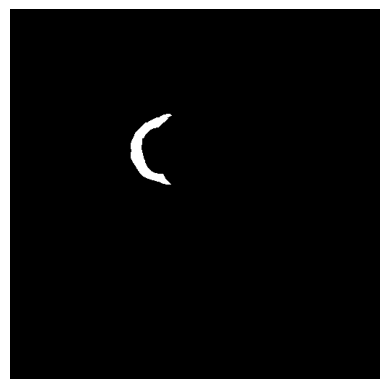

In [ ]:
# смотрим файл-маску nii.gz (файл 3D: 152х152х(75-297))
# -----------------------------------------------------
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив

# смотрим параметры изображения
print(type(img))
# print("  размеры nii.gz:", img.Rows, img.Columns)
# print("  объем памяти:", img.__sizeof__(), "b")
# print("  min-max значения:", img.SmallestImagePixelValue, img.LargestImagePixelValue)
# перевод к numpy массив, вывод
print(type(img_array), img_array.dtype)
print("  размеры nii.gz-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b;", int(img_array.__sizeof__() / 1000000), "Mb")
print("  min-max значения:", img_array.min(), img_array.max())

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
plt.imshow(img_array[:, :, 50], cmap="gray")                                        # отображение среза изображения по оси Z
plt.axis("off")
plt.show() 

# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
# data = img.get_fdata()                                                            # получение данных изображения в виде numpy массива

# del img
# del img_array
# gc.collect()

In [ ]:
# смотрим разброс значений в 3D массиве из сегментированного изображения

print(img_array[:, :, 50].shape)
print(img_array[:, :, 50][:2, :10])
#print(img_array[:, :, 50].data)
print(np.unique(img_array))
print(np.unique(img_array, axis=2))

(512, 512)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 1.]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

In [ ]:
# как работает np.unique по осям 3D-тензора
ax0 = np.unique(img_array, axis=0)
ax1 = np.unique(img_array, axis=1)
ax2 = np.unique(img_array, axis=2)

# как работает unique по осям 2D-тензора (берем конкретный срез)
cc_ax0 = np.unique(img_array[:, :, 50], axis=0)
cc_ax1 = np.unique(img_array[:, :, 50], axis=1)

# смотрим размерности полученных массивов
print(ax0.shape, ax1.shape, ax2.shape)
print(cc_ax0.shape, cc_ax1.shape)

(103, 512, 111) (512, 78, 111) (512, 512, 38)
(64, 512) (512, 54)


In [ ]:
# вариант np.unique - с возвратом счетчиков вхождений
ax2_ext = np.unique(img_array, axis=2, return_counts=True)

print(ax2_ext)

(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

In [ ]:
# распечатаем min-max значения по последней оси массива np.unique(по последней оси исходного массива)
for i in range(ax2.shape[2]):
  print(ax2[:, :, i].min(), ax2[:, :, i].max())

0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [ ]:
# вариант np.unique - с возвратом индексов уникальных элементов (-> можно восстановить исходный массив)
ax2_ext2, idx_ext2 = np.unique(img_array, axis=2, return_inverse=True )

print(ax2_ext2)
print(idx_ext2)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[ 0  0  0 

In [ ]:
# переводим массив индексов в Boolean
# получаем маску для последней оси исходного 3D-массива - есть/нет выпот на конкретном срезе
print(np.bool8(idx_ext2))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]


In [ ]:
# смотрим параметры трех семгентированных файлов одного пациента (для сравнения)
filename1 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"   # имя файла
filename2 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_second_reviewer.nii.gz"  # имя файла
filename3 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_third_reviewer.nii.gz"   # имя файла

img_array1 =  nib.load(filename1).get_fdata()                                          # перевод в numpy массив
img_array2 =  nib.load(filename2).get_fdata()                                          # перевод в numpy массив
img_array3 =  nib.load(filename3).get_fdata()                                          # перевод в numpy массив

print("Оригинальный снимок имеет 111 срезов")
print("Сегментированные снимки:")
print("  img_array1:", type(img_array1), img_array1.__sizeof__(), img_array1.shape, img_array1.dtype, img_array1.min(), img_array1.max() )
print("  img_array2:", type(img_array2), img_array2.__sizeof__(), img_array2.shape, img_array2.dtype, img_array2.min(), img_array2.max() )
print("  img_array3:", type(img_array3), img_array3.__sizeof__(), img_array3.shape, img_array3.dtype, img_array3.min(), img_array3.max() )

Оригинальный снимок имеет 111 срезов
Сегментированные снимки:
  img_array1: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array2: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array3: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0


###смотрим исходное изображение dcm

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 2237
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 2237


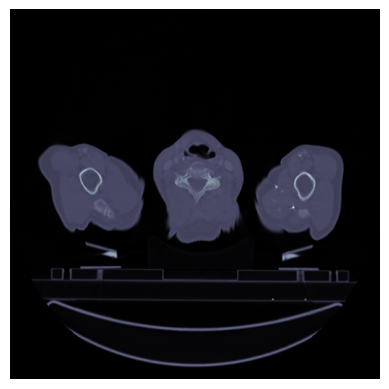

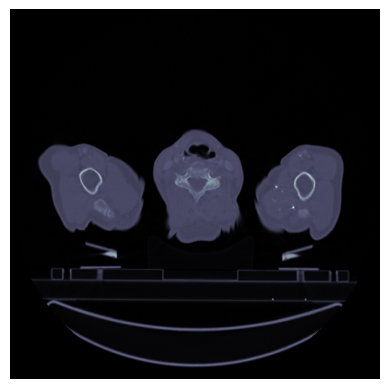

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1442
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1442


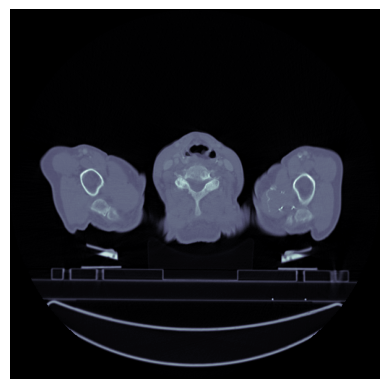

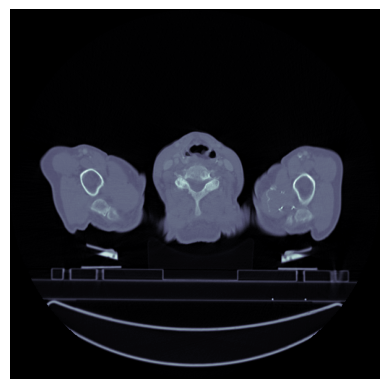

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1378
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1378


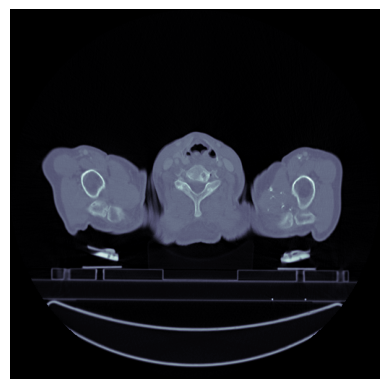

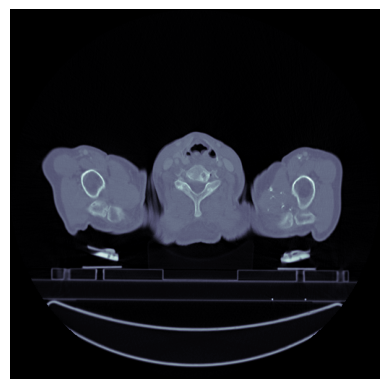

6356

In [ ]:
#смотрим исходное изображение dcm (75-297 файлов 2D: 152х152)
# -----------------------------------------------------------
# type(dcm_file) =             <class 'pydicom.dataset.FileDataset'>
# type(dcm_file.pixel_array) = <class 'numpy.ndarray'>

patient_dir = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228"

for file in sorted(os.listdir(patient_dir))[:3]:
  # загрузить файл dcm
  #dcm_file = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
  dcm_file = dicom.dcmread(os.path.join(patient_dir, file))
  offset = dcm_file.RescaleIntercept
  # смотрим параметры изображения
  print(type(dcm_file))
  print("  размеры dcm:", dcm_file.Rows, dcm_file.Columns)
  print("  объем памяти:", dcm_file.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.SmallestImagePixelValue, dcm_file.LargestImagePixelValue)
  # перевод к numpy массив, вывод
  print(type(dcm_file.pixel_array), dcm_file.pixel_array.dtype)
  print("  размеры dcm-массив:", dcm_file.pixel_array.shape)
  print("  объем памяти:", dcm_file.pixel_array.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())

  plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()

  plt.imshow((dcm_file.pixel_array - dcm_file.RescaleIntercept), cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()


del dcm_file
gc.collect()

In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
print(dcm_file1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.307880158436639081057603825300678127628
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.3

In [ ]:
# смотрим содержимое dcm файла LUNG1-002
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
print(dcm_file2)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.146690518896939717990238286069631301037
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20090530'
(0008, 0013) Instance Creation Time              TM: '130247'
(0008, 0014) Instance Creator UID  

In [ ]:
img_array = get_img("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")

print(type(img_array), img_array.dtype)
print("  размеры dcm-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b")
print("  min-max значения:", img_array.min(), img_array.max())

In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm")
dcm_file3 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm") 
print(dcm_file1.SliceThickness)
print(dcm_file2.SliceThickness)
print(dcm_file3.SliceThickness)

###пробуем примеры кода "открыть-вывести" от согруппников

In [ ]:
n = 28
# Загрузка масок nii.gz (файл 3D: 152х152х(75-297))
# -------------------------------------------------
#image_path1 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"
   #image_path2 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_second_reviewer.nii.gz"
image_path2 = "/content/Effusions/LUNG1-104/LUNG1-104_effusion_first_reviewer.nii.gz"  # у снимка 297 срезов
#image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
#image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
#rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
#height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
#print(f"Размерность изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность изображения сегментирование плеврального выпота: высота: {height2}, ширина: {width2}, глубина:{depth2}")
print("объем памяти:", image_data2.__sizeof__(), "b;", int(image_data2.__sizeof__() / 1000000), "Mb")

# # Показывает изображения слоя
plt.figure(1, figsize=(16, 10))

# plt.subplot(1, 3, 1)
# plt.title('Оригинальное изображение', fontweight='bold')
# plt.imshow(ds.pixel_array, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(rotated_image1[:, :, n], cmap='gray')
# plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

del image_obj2
del image_data2
gc.collect()

In [ ]:
def get_img_test(image_path):
    rotated_image = None
    if image_path.endswith('.dcm'):
        image_obj = dicom.dcmread(image_path)
        image_np = image_obj.pixel_array
    if image_path.endswith('.gz'):
        image_obj = nib.load(image_path)
        #image_np = image_obj.get_fdata().astype(np.int32)
        #image_np = np.resize(image_obj.get_fdata(), (512,512, min_images))
        image_np = image_obj.get_fdata()
    return image_obj#, image_np


folder = f'/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046'
image_path = os.path.join(f'{folder}/1-050.dcm')
img1 = get_img_test(image_path)
img1_np = img1.pixel_array
print(type(img1), type(img1_np), img1_np.shape)

# img2 = get_img_test(os.path.join(f'{DATA_DIR}/{THOR_CAV_DIR}/LUNG1-001/LUNG1-001_thor_cav_primary_reviewer.nii.gz'))
# img2_np = img2.get_fdata().astype(np.int32)
# print(type(img2), type(img2_np), img2_np.dtype, img2_np.shape)

# img3 = get_img_test(os.path.join(f'/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz'))
# img3_np = img3.get_fdata()
# print(type(img3), type(img3_np), img3_np.dtype, img3_np.shape)

plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(img1_np, cmap='gray')
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(img2_np[:, :, 50], cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.title('Сегментирование плеврального выпота', fontweight='bold')
# plt.imshow(img3_np[:, :, 50], cmap='gray')
# plt.axis('off')

plt.show()

del img1
del img1_np
gc.collect()

#Готовим списки пациентов train/test, перезаписываем файлы в формате png в папки train/test

##создаем 2 списка пациентов (без выпотов и с выпотами), перемешиваем оба списка, делим на train/test

In [19]:
# список пациентов класс1 - из папки с сегментированными изображениями EFFUSIONS_DIR
patients_eff = [ name for name in sorted(os.listdir(EFFUSIONS_DIR)) if os.path.isdir(os.path.join(EFFUSIONS_DIR, name)) and name != "LUNG1-095" ]
# список пациентов класс0 - из папки с оригинальными изображениями ORIGINAL_DIR минус те, кто попал в список patients_eff
patients_noeff = [ name for name in sorted(list(set(os.listdir(ORIGINAL_DIR)) - set(patients_eff))) if os.path.isdir(os.path.join(ORIGINAL_DIR, name)) ]

print("Всего пациентов:", len(patients_noeff) + len(patients_eff))
print("Всего пациентов без выпота:", len(patients_noeff))
print("Всего пациентов с выпотом:", len(patients_eff))
print(patients_noeff)
print(patients_eff)

# перемешиваем каждый список, берем без выпотов столько же, сколько есть с выпотами 
np.random.seed(333)
patients_noeff = list(np.random.permutation(patients_noeff))[0: len(patients_eff)]
patients_eff = list(np.random.permutation(patients_eff))

print()
print("Списки после перемешивания:")
print(patients_noeff)
print(patients_eff)

# # делим списки пациентов на train/test/valid
# # train = с начала до (1-TRAIN_TEST_RATIO*1.5)
# patients_train = patients_noeff[ : -int(len(patients_noeff) * TRAIN_TEST_RATIO * 1.5)] + patients_eff[ : -int(len(patients_eff) * TRAIN_TEST_RATIO * 1.5)]
# # valid = с (1-TRAIN_TEST_RATIO*1.5) до (1-TRAIN_TEST_RATIO)
# patients_valid = patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO * 1.5) : -int(len(patients_noeff) * TRAIN_TEST_RATIO)] + \
#                    patients_eff[-int(len(patients_eff)   * TRAIN_TEST_RATIO * 1.5) : -int(len(patients_eff)   * TRAIN_TEST_RATIO)]
# # test = с (1-TRAIN_TEST_RATIO) до конца
# patients_test = patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO) : ] + patients_eff[-int(len(patients_eff) * TRAIN_TEST_RATIO) : ]

# делим списки пациентов на train/test
# train = с начала до (1-TRAIN_TEST_RATIO)
patients_train = patients_noeff[ : -int(len(patients_noeff) * TRAIN_TEST_RATIO)] + patients_eff[ : -int(len(patients_eff) * TRAIN_TEST_RATIO)]
# test = с (1-TRAIN_TEST_RATIO) до конца
patients_test = patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO) : ] + patients_eff[-int(len(patients_eff) * TRAIN_TEST_RATIO) : ]

print()
print("Списки после разделения:")
print("train:", "всего пациентов", len(patients_train), "\n", patients_train)
#print("valid:", "всего пациентов", len(patients_valid), "\n", patients_valid)
print("test: ", "всего пациентов", len(patients_test), "\n", patients_test)

Всего пациентов: 402
Всего пациентов без выпота: 325
Всего пациентов с выпотом: 77
['LUNG1-004', 'LUNG1-006', 'LUNG1-007', 'LUNG1-009', 'LUNG1-010', 'LUNG1-011', 'LUNG1-012', 'LUNG1-015', 'LUNG1-017', 'LUNG1-019', 'LUNG1-020', 'LUNG1-022', 'LUNG1-023', 'LUNG1-025', 'LUNG1-027', 'LUNG1-029', 'LUNG1-030', 'LUNG1-032', 'LUNG1-033', 'LUNG1-034', 'LUNG1-036', 'LUNG1-037', 'LUNG1-039', 'LUNG1-040', 'LUNG1-041', 'LUNG1-043', 'LUNG1-044', 'LUNG1-045', 'LUNG1-047', 'LUNG1-048', 'LUNG1-049', 'LUNG1-052', 'LUNG1-054', 'LUNG1-055', 'LUNG1-056', 'LUNG1-057', 'LUNG1-059', 'LUNG1-062', 'LUNG1-063', 'LUNG1-064', 'LUNG1-066', 'LUNG1-067', 'LUNG1-070', 'LUNG1-071', 'LUNG1-072', 'LUNG1-073', 'LUNG1-075', 'LUNG1-076', 'LUNG1-077', 'LUNG1-078', 'LUNG1-079', 'LUNG1-080', 'LUNG1-081', 'LUNG1-082', 'LUNG1-084', 'LUNG1-086', 'LUNG1-087', 'LUNG1-089', 'LUNG1-090', 'LUNG1-092', 'LUNG1-094', 'LUNG1-096', 'LUNG1-098', 'LUNG1-099', 'LUNG1-100', 'LUNG1-101', 'LUNG1-102', 'LUNG1-103', 'LUNG1-105', 'LUNG1-106', 'LUNG1

In [20]:
# перемешиваем каждый список train/valid/test
np.random.seed(666)
patients_train = list(np.random.permutation(patients_train))
#patients_valid = list(np.random.permutation(patients_valid))
patients_test =  list(np.random.permutation(patients_test))

##по каждому списку пациентов train/test переписываем файлы в папки train/test в формате png

In [25]:
# удаляем папки train, test
remove_dirs(DATASET_DIR, ["train", "test"])

# создаем папки train, test
make_dirs(DATASET_DIR, ["train/originals", "train/masks", "test/originals", "test/masks"])

В папке /content/ удалены директории:
   train
   test
В папке /content/ созданы директории:
   train/originals
   train/masks
   test/originals
   test/masks


In [22]:
# переписываем исходные dcm-срезы и nii.gz-маски в виде файлов png в папки train/test 

with timex():
    # пишем все файлы пациентов 
    #save_patients(patients_train, "train", patients_eff) # в папку train
    save_patients(patients_test, "test", patients_eff)   # в папку test

Всего пациентов в списке: 30

Пациент   1: LUNG1-279 всего срезов: 134; записаны файлы png в папку test
Пациент   2: LUNG1-358 всего срезов: 104; записаны файлы png в папку test
Пациент   3: LUNG1-373 всего срезов: 94; записаны файлы png в папку test
Пациент   4: LUNG1-376 всего срезов: 134; записаны файлы png в папку test
Пациент   5: LUNG1-307 всего срезов: 134; записаны файлы png в папку test
Пациент   6: LUNG1-387 всего срезов: 101; записаны файлы png в папку test
Пациент   7: LUNG1-001 всего срезов: 134; записаны файлы png в папку test
Пациент   8: LUNG1-275 всего срезов: 132; записаны файлы png в папку test
Пациент   9: LUNG1-366 всего срезов: 134; записаны файлы png в папку test
Пациент  10: LUNG1-200 всего срезов: 134; записаны файлы png в папку test
Пациент  11: LUNG1-362 всего срезов: 134; записаны файлы png в папку test
Пациент  12: LUNG1-020 всего срезов: 108; записаны файлы png в папку test
Пациент  13: LUNG1-131 всего срезов: 114; записаны файлы png в папку test
Пациент  

In [ ]:
# архивируем папку train

with timex():
    # указываем путь к архиву и путь к папке, которую нужно заархивировать
    zip_dirs(archive_path=os.path.join(os.getcwd(),"train_dataset_png.zip"), 
             folder_path=os.path.join(os.getcwd(),"train"))

    # копируем файл  из /content на гугл-диск
    !cp "/content/train_dataset_png.zip" "/content/drive/MyDrive/SEGMENT/train_dataset_png.zip"

# выгружаем архив train  из /content
#files.download(os.path.join(os.getcwd(),"train_dataset_png.zip"))

Время обработки: 251.94 с


In [23]:
# архивируем папку test

with timex():
    # указываем путь к архиву и путь к папке, которую нужно заархивировать
    zip_dirs(archive_path=os.path.join(os.getcwd(),"test_dataset_png.zip"), 
             folder_path=os.path.join(os.getcwd(),"test"))

    # копируем файл  из /content на гугл-диск
    !cp "/content/test_dataset_png.zip" "/content/drive/MyDrive/SEGMENT/test_dataset_png.zip"

# выгружаем архив test из /content
#files.download(os.path.join(os.getcwd(),"test_dataset_png.zip"))

Время обработки: 62.94 с


In [ ]:
from google.colab import files
# выгружаем архив train  из /content
files.download(os.path.join(os.getcwd(),"train_dataset_png.zip"))
# выгружаем архив test из /content
files.download(os.path.join(os.getcwd(),"test_dataset_png.zip"))

In [ ]:
from google.colab import files
# выгружаем архив train  из /content
files.download("/content/drive/MyDrive/SEGMENT/train_dataset_png.zip")
# выгружаем архив test из /content
#files.download("/content/drive/MyDrive/SEGMENT/test_dataset_png.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Проверка созданных файлов png на значения выпотов

In [27]:
# выбираем из файлов png оригинальных срезов значения пикселей, которые соответствуют пикселям маски
train_list_fn = sorted(os.listdir(os.path.join(TRAIN_DIR, ORIG_FOLDER)))        # список имен файлов в папке train/originals
train_pix_values = []                                                           # список значений пикселей, соответствующих пикселям маски = 1

for fn in train_list_fn:
    path = os.path.join(TRAIN_DIR, ORIG_FOLDER, fn)                                             # путь к оригинальному файлу 
    orig_img = Image.open(path)
    orig_img_np = np.array(orig_img)                                                            # должны быть значения в дипазоне [0; 4095]
    path = glob.glob(path[0: path.find("(")].replace(ORIG_FOLDER, MASK_FOLDER) + "*.png")[0]    # путь к маске
    mask_img = Image.open(path)                                                                 # должны быть значения {0; 1}
    mask_img_np = np.array(mask_img)
    # выделим пиксели оригинального изображения по маске выпота
    #_, idxs = np.unique(img_array, axis=2, return_inverse=True )  
    pixels = orig_img_np[np.nonzero(mask_img_np)]
    if pixels.shape[0] != 0:
        train_pix_values = train_pix_values + list(pixels)
    #break
train_pix_values = np.array(list(set(train_pix_values)))
print("Диапазон значений пикселей по маске из train png (dcm):", train_pix_values.min(), train_pix_values.max())

test_list_fn = sorted(os.listdir(os.path.join(TEST_DIR, ORIG_FOLDER)))          # список имен файлов в папке train/originals
test_pix_values = []                                                            # список значений пикселей, соответствующих пикселям маски = 1

for fn in test_list_fn:
    path = os.path.join(TEST_DIR, ORIG_FOLDER, fn)                                              # путь к оригинальному файлу 
    orig_img = Image.open(path)
    orig_img_np = np.array(orig_img)
    path = glob.glob(path[0: path.find("(")].replace(ORIG_FOLDER, MASK_FOLDER) + "*.png")[0]    # путь к маске
    mask_img = Image.open(path)
    mask_img_np = np.array(mask_img)
    # выделим пиксели оригинального изображения по маске выпота
    #_, idxs = np.unique(img_array, axis=2, return_inverse=True )  
    pixels = orig_img_np[np.nonzero(mask_img_np)]
    if pixels.shape[0] != 0:
        test_pix_values = test_pix_values + list(pixels)
    #break
test_pix_values = np.array(list(set(test_pix_values)))
print("Диапазон значений пикселей по маске из test png (dcm):", test_pix_values.min(), test_pix_values.max())    

print(train_pix_values)
print(test_pix_values)

Диапазон значений пикселей по маске из train png (dcm): 122 2348
Диапазон значений пикселей по маске из test png (dcm): 127 1766
[ 122  125  128 ... 2276 2320 2348]
[ 127  173  181 ... 1701 1759 1766]


In [ ]:
print(train_pix_values.shape, test_pix_values.shape)

(2013,) (1783,)


In [ ]:
train_list_fn_orig = sorted(os.listdir(os.path.join(TRAIN_DIR, ORIG_FOLDER)))
print(train_list_fn_orig[40:45])
train_list_fn_mask = sorted(os.listdir(os.path.join(TRAIN_DIR, MASK_FOLDER)))
print(train_list_fn_mask[40:45])

# ['LUNG1-002-041(1-041).png', 'LUNG1-002-042(1-042).png', 'LUNG1-002-043(1-043).png', 'LUNG1-002-044(1-044).png', 'LUNG1-002-045(1-045).png']
# ['LUNG1-002-041(1-071).png', 'LUNG1-002-042(1-070).png', 'LUNG1-002-043(1-069).png', 'LUNG1-002-044(1-068).png', 'LUNG1-002-045(1-067).png']

['LUNG1-002-041(1-041).png', 'LUNG1-002-042(1-042).png', 'LUNG1-002-043(1-043).png', 'LUNG1-002-044(1-044).png', 'LUNG1-002-045(1-045).png']
['LUNG1-002-041(1-071).png', 'LUNG1-002-042(1-070).png', 'LUNG1-002-043(1-069).png', 'LUNG1-002-044(1-068).png', 'LUNG1-002-045(1-067).png']


In [ ]:
# загружаем ИСХОДНЫЙ файл dcm для 'LUNG1-002-042(1-042).png'
_, orig_img_array, ds = get_image("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm") 
# смотрим разброс пикселей
print("Исходные пиксели исходного файла dcm:", orig_img_array.min(), orig_img_array.max())
print("Исходные параметры датасета DICOM:", ds.get("PixelPaddingValue"), ds.get("RescaleSlope"), ds.get("RescaleIntercept"))

# переводим его в HU (+ сдвиг)
orig_img_array = convert_array2HU(orig_img_array, ds)
# смотрим разброс пикселей
print("После перевода в HU+сдвиг:", orig_img_array.min(), orig_img_array.max())

# переводим в изображение
img = Image.fromarray(orig_img_array)                      # создаем PIL изображение из массива 
img.save("/content/LUNG1-002-1-042.png")                   # сохраняем как png

# открываем png через tf.io
img_png = tf.io.read_file("/content/LUNG1-002-1-042.png")
img_png = decode_png(img_png, np.uint16)
img_png_array = img_png.numpy()
# смотрим разброс пикселей
print("После открытия из png через tf.io:", img_png_array.min(), img_png_array.max())

# открываем png через PIL
img_png2 = tf.io.read_file("/content/LUNG1-002-1-042.png")
img_png2 = decode_png(img_png2, np.uint16)
img_png_array2 = img_png2.numpy()
# смотрим разброс пикселей
print("После открытия из png через PIL:", img_png_array2.min(), img_png_array2.max())

Исходные пиксели исходного файла dcm: -1024 1248
Исходные параметры датасета DICOM: -2000 1 0
После перевода в HU+сдвиг: 0 2272
После открытия из png через tf.io: 0 2272
После открытия из png через PIL: 0 2272


In [ ]:
# открываем подготовленный файл png через PIL
orig_img = Image.open(os.path.join(TRAIN_DIR, ORIG_FOLDER, 'LUNG1-002-042(1-042).png'))
#mask_img = Image.open(os.path.join(TRAIN_DIR, MASK_FOLDER, 'LUNG1-002-042(1-070).png'))
orig_img_np = np.array(orig_img)
#mask_img_np = np.array(mask_img)

print("Диапазон значений в файле png (открыли через PIL)", orig_img_np.min(), orig_img_np.max())

Диапазон значений в файле png (открыли через PIL) 0 2272


In [ ]:
# открываем подготовленный файл png через tf.io
orig_img = tf.io.read_file(os.path.join(TRAIN_DIR, ORIG_FOLDER, 'LUNG1-002-042(1-042).png'))
#mask_img = tf.io.read_file(os.path.join(TRAIN_DIR, MASK_FOLDER, 'LUNG1-002-042(1-070).png'))
orig_img_np = decode_png(orig_img, np.uint16)
#mask_img_np = decode_png(mask_img, np.uint8)
orig_img_np = orig_img_np.numpy()
#mask_img_np = mask_img_np.numpy()

print("Диапазон значений файла png (открыли через tf.io)", orig_img_np.min(), orig_img_np.max())

Диапазон значений файла png (открыли через tf.io) 0 2272


In [ ]:
orig_img = tf.io.read_file(os.path.join(TRAIN_DIR, ORIG_FOLDER, 'LUNG1-002-042(1-042).png'))
orig_img = decode_png(orig_img, np.uint16)
orig_img = preprocessing_orig(orig_img)
orig_img_np = orig_img.numpy()

print(orig_img_np.min(), orig_img_np.max())

0.0 1.0


#Используем созданные файлы png для подготовки датасетов

закачаем и распакуем архивы train/test

In [26]:
!unzip -qo /content/drive/MyDrive/SEGMENT/train_dataset_png.zip
!unzip -qo /content/drive/MyDrive/SEGMENT/test_dataset_png.zip

создаем tf.data.Dataset из списков путей к файлам png (оригинальных+маска) из папок tran/test

In [ ]:
# используем tf.data.Dataset (списки путей к файлам png) для создания датасетов-генераторов train, test

# список полных путей к файлам оригинальных изображений в папке TRAIN_DIR и подпапках ORIG_DIR, MASK_DIR
orig_list_ds = tf.data.Dataset.list_files(str(TRAIN_DIR + ORIG_FOLDER + "/*.png"), shuffle=True, seed=123)
mask_list_ds = tf.data.Dataset.list_files(str(TRAIN_DIR + MASK_FOLDER + "/*.png"), shuffle=True, seed=123)

# объединяем списки в список пар полных путей к файлам оригинальных, масок изображений в папке TRAIN_DIR
train_list_ds = tf.data.Dataset.zip((orig_list_ds, mask_list_ds))
# всего файлов в датасете train_list_ds
image_count = train_list_ds.cardinality().numpy()
print("Всего файлов в списке train:", image_count)
# перемешивание
train_list_ds = train_list_ds.shuffle(buffer_size=train_list_ds.cardinality().numpy(), reshuffle_each_iteration=True)
# смотрим, что внутри
print("Список путей к файлам набора train")
for f in train_list_ds.take(5):
    print(f[0].numpy(), f[1].numpy())   #print(f.numpy())
print(*list(train_list_ds.as_numpy_iterator())[0:5], sep="\n")
print()


# список полных путей к файлам оригинальных изображений в папке TEST_DIR и подпапках ORIG_DIR, MASK_DIR
orig_list_ds = tf.data.Dataset.list_files(str(TEST_DIR + ORIG_FOLDER + "/*.png"), shuffle=True, seed=123)
mask_list_ds = tf.data.Dataset.list_files(str(TEST_DIR + MASK_FOLDER + "/*.png"), shuffle=True, seed=123)

# объединяем списки в список пар полных путей к файлам оригинальных, маск изображений в папке TEST_DIR
test_list_ds = tf.data.Dataset.zip((orig_list_ds, mask_list_ds))
# всего файлов в датасете test_list_ds
image_count = test_list_ds.cardinality().numpy()
print("Всего файлов в списке test:", image_count)
# перемешивание
test_list_ds = test_list_ds.shuffle(buffer_size=test_list_ds.cardinality().numpy(), reshuffle_each_iteration=True)
# смотрим, что внутри
print("Список путей к файлам набора test")
for f in test_list_ds.take(5):
    print(f[0].numpy(), f[1].numpy())   #print(f.numpy())
print(*list(test_list_ds.as_numpy_iterator())[0:5], sep="\n") 

del orig_list_ds, mask_list_ds
gc.collect()

Всего файлов в списке train: 14727
Список путей к файлам набора train
b'/content/train/originals/LUNG1-286-004(1-004).png' b'/content/train/masks/LUNG1-286-004(1-133).png'
b'/content/train/originals/LUNG1-148-002(1-002).png' b'/content/train/masks/LUNG1-148-002(1-107).png'
b'/content/train/originals/LUNG1-051-049(1-049).png' b'/content/train/masks/LUNG1-051-049(1-077).png'
b'/content/train/originals/LUNG1-364-052(1-052).png' b'/content/train/masks/LUNG1-364-052(1-083).png'
b'/content/train/originals/LUNG1-043-022(1-022).png' b'/content/train/masks/LUNG1-043-022(1-082).png'
(b'/content/train/originals/LUNG1-402-082(1-082).png', b'/content/train/masks/LUNG1-402-082(1-053).png')
(b'/content/train/originals/LUNG1-113-019(1-019).png', b'/content/train/masks/LUNG1-113-019(1-100).png')
(b'/content/train/originals/LUNG1-263-127(1-127).png', b'/content/train/masks/LUNG1-263-127(1-008).png')
(b'/content/train/originals/LUNG1-240-080(1-080).png', b'/content/train/masks/LUNG1-240-080(1-055).png')


0

In [ ]:
# смотрим, что у нас с типами данных в списке путей к файлам
print(type(train_list_ds))
for f0, f1 in train_list_ds.take(1):
    print(type(f0), type(f0.numpy()))
    print(type(f1), type(f1.numpy()))

del f0, f1

<class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'bytes'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'bytes'>


In [ ]:
# проверяем работу функции по созданию трех массивов
img, mask, weights = process_path(("/content/train/originals/LUNG1-002-001(1-001).png", "/content/train/masks/LUNG1-002-001(1-111).png"))

получили на вход preprocessing_orig: <class 'tensorflow.python.framework.ops.EagerTensor'> <dtype: 'uint16'> (512, 512, 1)
отдаем на выходе preprocessing_orig: <class 'tensorflow.python.framework.ops.EagerTensor'> <dtype: 'float32'> (512, 512, 1)


In [ ]:
# смотрим, что у нас получается на выходе из функции
print("Image:         ", type(img), img.numpy().shape, img.numpy().dtype, img.numpy().min(), img.numpy().max())
print("Mask:          ", type(mask), mask.numpy().shape, mask.numpy().dtype, mask.numpy().min(), mask.numpy().max())
print("Sample_weights:", type(weights), weights.numpy().shape, weights.numpy().dtype, weights.numpy().min(), weights.numpy().max())

# было раньше:
# Image:          <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float64 0.0 1.0
# Mask:           <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) uint8 0 0
# Sample_weights: <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.33333334 0.33333334

Image:          <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.0 1.0
Mask:           <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) uint8 0 0
Sample_weights: <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.33333334 0.33333334


создание генераторов наборов train/test на основе списков путей к файлам

Image:          <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.0 0.9992674
Mask:           <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) uint8 0 0
Sample_weights: <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.09090909 0.09090909
Параметры батчей (train):
(8, 512, 512, 1) (8, 512, 512, 1) (8, 512, 512, 1)


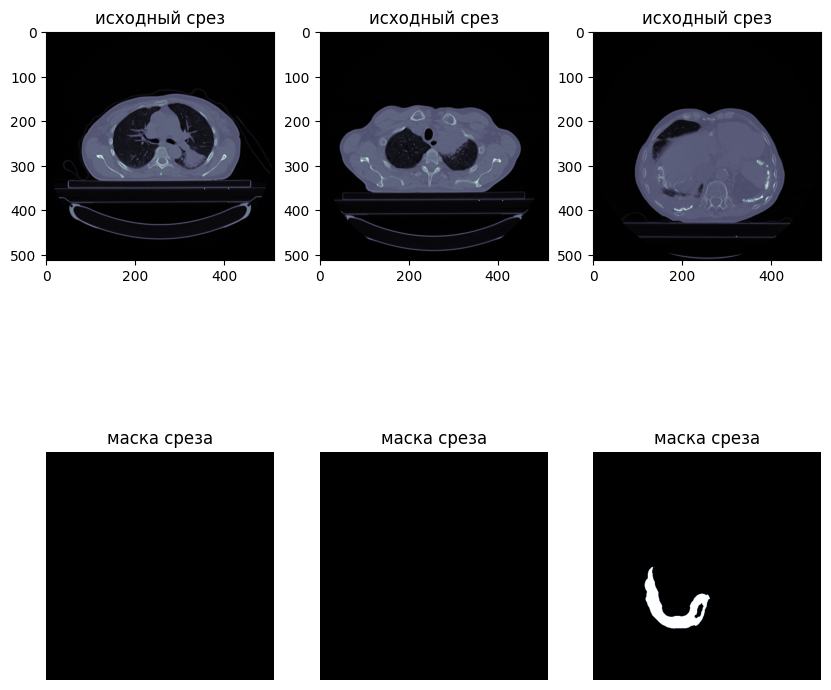

In [ ]:
# создаем train/test генераторы на основе списков файлов

# TRAIN: создаем датасет (num_parallel_calls - so multiple images are loaded/processed in parallel)
#train_ds = train_list_ds.map(lambda x: tf.py_function(func=process_path, inp=[x], Tout=tf.Tensor), num_parallel_calls=tf.data.AUTOTUNE)
#train_ds = train_list_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_list_ds.map(lambda x, y: process_path((x, y)), num_parallel_calls=tf.data.AUTOTUNE)

for image, mask, sample_weights in train_ds.take(1):
    print("Image:         ", type(image), image.numpy().shape, image.numpy().dtype, image.numpy().min(), image.numpy().max())
    print("Mask:          ", type(mask), mask.numpy().shape, mask.numpy().dtype, mask.numpy().min(), mask.numpy().max())
    print("Sample_weights:", type(sample_weights), sample_weights.numpy().shape, sample_weights.numpy().dtype, sample_weights.numpy().min(), sample_weights.numpy().max())

# прогоняем датасет через конвейер
train_ds = configure_for_performance(train_ds)

# вывести первые 3 картинок первого батча в датасете
image_batch, mask_batch, weights_batch = next(iter(train_ds))
fig = plt.figure(figsize=(10, 10))
for i in range(min(3, image_batch.shape[0])):
    ax1 = plt.subplot(2, 3, i + 1)
    # массивы со значениями в диапазоне [0; 1]
    plt.imshow(image_batch[i].numpy() * CONST_HU_MAX, cmap=plt.cm.bone)   # cmap=plt.cm.gray
    # пробуем отобразить так
    #img = Image.fromarray(image_batch[i].numpy() * CONST_HU_MAX)
    #img.show()
    ax1.set_title("исходный срез")
    ax2 = plt.subplot(2, 3, i + 4)
    plt.imshow(mask_batch[i].numpy().astype("uint8"), cmap=plt.cm.bone)   # cmap=plt.cm.gray)
    ax2.set_title("маска среза")
    plt.axis("off")

print("Параметры батчей (train):")
print(image_batch.shape, mask_batch.shape, weights_batch.shape)
#print(image_batch.numpy().min(), image_batch.numpy().max(), mask_batch.numpy().min(), mask_batch.numpy().max(), weights_batch.numpy().min(), weights_batch.numpy().min())

Image:          <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.0 0.47912088
Mask:           <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) uint8 0 1
Sample_weights: <class 'tensorflow.python.framework.ops.EagerTensor'> (512, 512, 1) float32 0.09090909 0.90909094
Параметры батчей (test):
(8, 512, 512, 1) (8, 512, 512, 1) (8, 512, 512, 1)


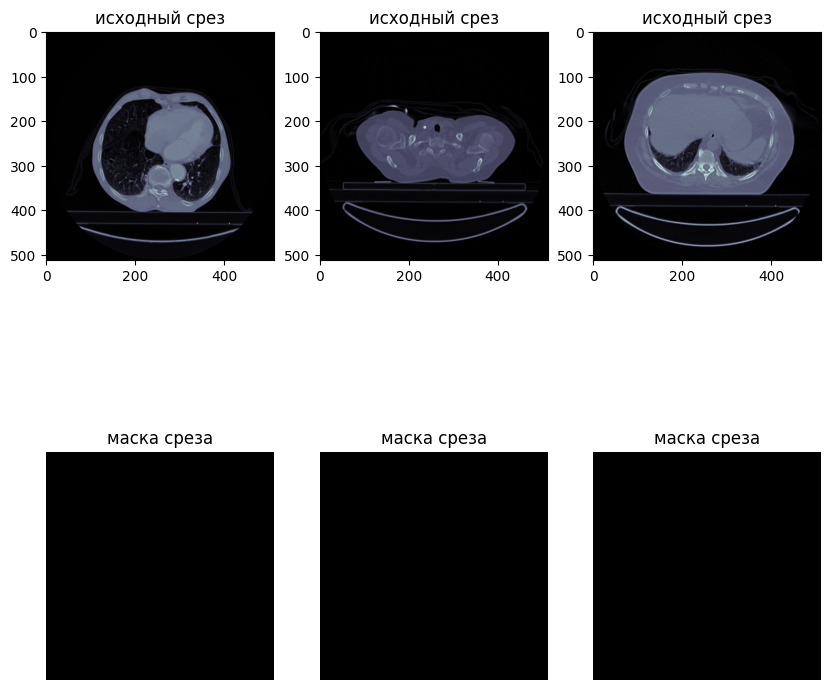

In [ ]:
# TEST: создаем датасет (num_parallel_calls - so multiple images are loaded/processed in parallel)
test_ds = test_list_ds.map(lambda x, y: process_path((x, y)), num_parallel_calls=tf.data.AUTOTUNE)

for image, mask, sample_weights in test_ds.take(1):
    print("Image:         ", type(image), image.numpy().shape, image.numpy().dtype, image.numpy().min(), image.numpy().max())
    print("Mask:          ", type(mask), mask.numpy().shape, mask.numpy().dtype, mask.numpy().min(), mask.numpy().max())
    print("Sample_weights:", type(sample_weights), sample_weights.numpy().shape, sample_weights.numpy().dtype, sample_weights.numpy().min(), sample_weights.numpy().max())

# прогоняем датасет через конвейер
test_ds = configure_for_performance(test_ds)

# вывести первые 3 картинок первого батча в датасете
image_batch, mask_batch, weights_batch = next(iter(test_ds))
fig = plt.figure(figsize=(10, 10))
for i in range(min(3, image_batch.shape[0])):
    ax1 = plt.subplot(2, 3, i + 1)
    # массивы со значениями в диапазоне [0; 1]
    plt.imshow(image_batch[i].numpy() * CONST_HU_MAX, cmap=plt.cm.bone)   # cmap=plt.cm.gray
    # пробуем отобразить так
    #img = Image.fromarray(image_batch[i].numpy() * CONST_HU_MAX)
    #img.show()
    ax1.set_title("исходный срез")
    ax2 = plt.subplot(2, 3, i + 4)
    plt.imshow(mask_batch[i].numpy().astype("uint8"), cmap=plt.cm.bone)   # cmap=plt.cm.gray)
    ax2.set_title("маска среза")
    plt.axis("off")

print("Параметры батчей (test):")
print(image_batch.shape, mask_batch.shape, weights_batch.shape)
#print(image_batch.numpy().min(), image_batch.numpy().max(), mask_batch.numpy().min(), mask_batch.numpy().max(), weights_batch.numpy().min(), weights_batch.numpy().min())

In [ ]:
del train_list_ds, test_list_ds, image_batch, mask_batch, weights_batch
gc.collect()

16178

In [ ]:
# из ноута 1-ой группы
# Настраиваем аугментацию ПОКА ОТКЛЮЧИЛ, ТАК КАК НЕ РАБОТАЕТ
'''data_augmentation = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.RandomRotation(0.45),
tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),]
)'''

#Создаем 2D модель, обучаем, смотрим графики

In [ ]:
# создаем модель
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)  # (128, 128, 1)  # (512, 512, 1)

model = unet_2d(input_shape, CLASS_COUNT)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi = 60)

In [ ]:
# компилируем модель

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=dice_coef_loss,
              # iou = true_positives / (true_positives + false_positives + false_negatives)
              # target_class_ids=[0, 1], -> возвращается среднее значение IoU для двух классов
              metrics=[tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_io_u"),       # было 0.9
                       dice_coef],   
              # задаем взвешенную метрику (указываем список метрик, которые нужно взвесить)
              # взвешиваются с помощью sample_weight или class_weight во время обучения/тестрования
              # без указания выдавалось предупреждение о том, что вроде как нужно
              # после добавления динамика loss по эпохам резко ухудшилась; видимо, нужно убрать; можно указать [], чтобы убрать вывод предупреждения
              # weighted_metrics=[tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_io_u")] 
              weighted_metrics=[] 
             )
# loss_fn = lss.BinaryCrossentropy()                   # lss.SparseCategoricalCrossentropy()     lss.CategoricalCrossentropy() 
# opt_fn = opt.Adam(learning_rate=LEARNING_RATE)
# metr_fn = mtr.BinaryAccuracy()                       # mtr.SparseCategoricalAccuracy()         mtr.CategoricalAccuracy()
# model.compile(loss=loss_fn, optimizer=opt_fn, metrics=[metr_fn])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),       # Оптимизатор Adam c заданным ранее шагом обучения
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
#               metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
# #checkpoints = ModelCheckpoint(f"/content/drive/MyDrive/CARS-ULTRAPRO/model_cars_weights.h5", 
# сохраняем лучшие результаты в процессе обучения
checkpoints = tf.keras.callbacks.ModelCheckpoint(f"/content/drive/MyDrive/SEGMENT/model_2Dunet_v2", 
                                                 monitor="val_binary_io_u",
                                                 save_weights_only=False, 
                                                 mode="max",
                                                 save_best_only=True)

# сохраняем результаты обучения (!!! history не сохраняется при сохранении модели)
csv_logger = tf.keras.callbacks.CSVLogger(filename="/content/drive/MyDrive/SEGMENT/model_history_v2
.csv", 
                                          separator=',', 
                                          append=True)

In [ ]:
# установка параметра report_tensor_allocations_upon_oom Для вывода информации о распределении памяти в случае ошибки "Out of memory" 
# предполагалось передать в метод fit (options=run_options), но там нет такого параметра, chatGPT наврал
# run_options = tf.compat.v1.RunOptions()
# run_options.report_tensor_allocations_upon_oom = True

In [ ]:
# загрузка модели для добучений частями
# model = tf.keras.models.load_model("/content/drive/MyDrive/SEGMENT/model_2Dunet_v2", 
#                                    custom_objects={"dice_coef_loss": dice_coef_loss, "dice_coef": dice_coef}, 
#                                    compile=True)

In [ ]:
# ВАРИАНТ 2: 
# исправленный датасет Effusions
# метрики = (BIoU, dice_coef); батч = (8, 512, 512, 1); веса классов = [1, 10]
# файлы png без "окна", нормирование по CONST_HU_MAX - ???????????????????????????????
# сохраняем в SEGMENT/model_2Dunet_v2, model_history_v2.csv

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

In [ ]:
# загрузка модели для добучений частями
# model = tf.keras.models.load_model("/content/drive/MyDrive/SEGMENT/model_2Dunet_v1", 
#                                    custom_objects={"dice_coef_loss": dice_coef_loss, "dice_coef": dice_coef}, 
#                                    compile=True)

In [ ]:
# ВАРИАНТ 1: 
# метрики = (BIoU, dice_coef); батч = (8, 512, 512, 1); веса классов = [1, 10]
# файлы png без "окна", нормирование по CONST_HU_MAX
# сохраняем в SEGMENT/model_2Dunet_v1, model_history_v1.csv

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))


# первый прогон 3 эпохи:
# Epoch 1/3
# 1841/1841 [==============================] - ETA: 0s - loss: 0.0826 - binary_io_u: 0.4998 - dice_coef: 0.0995
# 1841/1841 [==============================] - 3890s 2s/step - loss: 0.0826 - binary_io_u: 0.4998 - dice_coef: 0.0995 - val_loss: 0.0903 - val_binary_io_u: 0.4371 - val_dice_coef: 0.0156
# Epoch 2/3
# 1841/1841 [==============================] - ETA: 0s - loss: 0.0673 - binary_io_u: 0.5966 - dice_coef: 0.2656
# 1841/1841 [==============================] - 3771s 2s/step - loss: 0.0673 - binary_io_u: 0.5966 - dice_coef: 0.2656 - val_loss: 0.0598 - val_binary_io_u: 0.6761 - val_dice_coef: 0.3467
# Epoch 3/3
#  982/1841 [===============>..............] - ETA: 26:53 - loss: 0.0619 - binary_io_u: 0.6253 - dice_coef: 0.3239

# второй прогон:
# Epoch 1/3
# 1841/1841 [==============================] - ETA: 0s - loss: 0.0612 - binary_io_u: 0.6338 - dice_coef: 0.3319
# 1841/1841 [==============================] - 3878s 2s/step - loss: 0.0612 - binary_io_u: 0.6338 - dice_coef: 0.3319 - val_loss: 0.0770 - val_binary_io_u: 0.5480 - val_dice_coef: 0.1599
# Epoch 2/3
# 1841/1841 [==============================] - ETA: 0s - loss: 0.0570 - binary_io_u: 0.6585 - dice_coef: 0.3770
# 1841/1841 [==============================] - 3780s 2s/step - loss: 0.0570 - binary_io_u: 0.6585 - dice_coef: 0.3770 - val_loss: 0.0772 - val_binary_io_u: 0.5490 - val_dice_coef: 0.1581
# Epoch 3/3
#  350/1841 [====>.........................] - ETA: 46:35 - loss: 0.0546 - binary_io_u: 0.6661 - dice_coef: 0.4041

Epoch 1/3
1841/1841 [==============================] - ETA: 0s - loss: 0.0612 - binary_io_u: 0.6338 - dice_coef: 0.3319

1841/1841 [==============================] - 3878s 2s/step - loss: 0.0612 - binary_io_u: 0.6338 - dice_coef: 0.3319 - val_loss: 0.0770 - val_binary_io_u: 0.5480 - val_dice_coef: 0.1599
Epoch 2/3
1841/1841 [==============================] - ETA: 0s - loss: 0.0570 - binary_io_u: 0.6585 - dice_coef: 0.3770

1841/1841 [==============================] - 3780s 2s/step - loss: 0.0570 - binary_io_u: 0.6585 - dice_coef: 0.3770 - val_loss: 0.0772 - val_binary_io_u: 0.5490 - val_dice_coef: 0.1581
Epoch 3/3
 350/1841 [====>.........................] - ETA: 46:35 - loss: 0.0546 - binary_io_u: 0.6661 - dice_coef: 0.4041

попытки ниже были на наборе png с некорректными значениями

In [ ]:
# 5 попытка прохода обучения эпохи (работа на батче (1, 512, 512, 1) + убрала веса метрики + трешхолд = 0.5 + 2 метрики  !!!!!!!!
# аналог прохода 1: попытка повторить хорошое схождение ошибки для батча = 1
# сохраняемся в model_2Dunet_v3 + model_history_v3.csv
# результаты: эпоха 2 - лучший val_binary_io_u; эпоха 3 - лучшие val_loss + val_dice_coef
# ДООБУЧЕНИЕ 1: 

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
14727/14727 [==============================] - ETA: 0s - loss: 0.1249 - binary_io_u: 0.5249 - dice_coef: 0.6263

14727/14727 [==============================] - 4417s 298ms/step - loss: 0.1249 - binary_io_u: 0.5249 - dice_coef: 0.6263 - val_loss: 0.0697 - val_binary_io_u: 0.4995 - val_dice_coef: 0.7920
Epoch 2/3
14727/14727 [==============================] - 4370s 297ms/step - loss: 0.0692 - binary_io_u: 0.4995 - dice_coef: 0.7933 - val_loss: 0.0697 - val_binary_io_u: 0.4995 - val_dice_coef: 0.7920
Epoch 3/3
 9287/14727 [=================>............] - ETA: 24:35 - loss: 0.0688 - binary_io_u: 0.4995 - dice_coef: 0.7944

In [ ]:
# 5 попытка прохода обучения эпохи (работа на батче (1, 512, 512, 1) + убрала веса метрики + трешхолд = 0.5 + 2 метрики  !!!!!!!!
# аналог прохода 1: попытка повторить хорошое схождение ошибки для батча = 1
# сохраняемся в model_2Dunet_v3 + model_history_v3.csv
# результаты: эпоха 2 - лучший val_binary_io_u; эпоха 3 - лучшие val_loss + val_dice_coef

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
14727/14727 [==============================] - ETA: 0s - loss: 0.3286 - binary_io_u: 0.4872 - dice_coef: 0.0151

14727/14727 [==============================] - 4094s 276ms/step - loss: 0.3286 - binary_io_u: 0.4872 - dice_coef: 0.0151 - val_loss: 0.3047 - val_binary_io_u: 0.5280 - val_dice_coef: 0.0864
Epoch 2/3
14727/14727 [==============================] - ETA: 0s - loss: 0.3073 - binary_io_u: 0.5279 - dice_coef: 0.0786

14727/14727 [==============================] - 4061s 276ms/step - loss: 0.3073 - binary_io_u: 0.5279 - dice_coef: 0.0786 - val_loss: 0.2998 - val_binary_io_u: 0.5862 - val_dice_coef: 0.1012
Epoch 3/3
14727/14727 [==============================] - 4073s 277ms/step - loss: 0.1160 - binary_io_u: 0.5247 - dice_coef: 0.6530 - val_loss: 0.0697 - val_binary_io_u: 0.4995 - val_dice_coef: 0.7920
Время обучения: 12298 секунд (204.97 минут)

Максимальный коэфф-т пересечения и объединения на тестовой выборке: 0.5862358808517456


In [ ]:
# 4 попытка прохода обучения эпохи (работа на батче (8, 512, 512, 1) + убрала веса метрики + трешхолд = 0.5
# аналог прохода 3: попытка получить при старте более удачный расклад весов
# сохраняемся в model_2Dunet_v2 + model_history_v2.csv

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
1841/1841 [==============================] - ETA: 0s - loss: 0.3218 - binary_io_u: 0.4966

1841/1841 [==============================] - 4095s 2s/step - loss: 0.3218 - binary_io_u: 0.4966 - val_loss: 0.3337 - val_binary_io_u: 0.4993
Epoch 2/3
1672/1841 [==========================>...] - ETA: 5:30 - loss: 0.3325 - binary_io_u: 0.5047

In [ ]:
# 3 попытка прохода обучения эпохи (работа на батче (8, 512, 512, 1) + убрала веса метрики + трешхолд = 0.5
# обучение прошло, но ноутбук не сохранился; было сохранение в model_2Dunet + model_history.csv
# результаты: val_loss = 0.2711690366; val_binary_io_u = 0.6096592546	- НУЖНО ПОПРОБОВАТЬ ДОУЧИТЬ!!!!
# ДООБУЧЕНИЕ 1: почему-то не хватило времени

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
1841/1841 [==============================] - ETA: 0s - loss: 0.2473 - binary_io_u: 0.5958

1841/1841 [==============================] - 3831s 2s/step - loss: 0.2473 - binary_io_u: 0.5958 - val_loss: 0.2627 - val_binary_io_u: 0.6024
Epoch 2/3
1841/1841 [==============================] - ETA: 0s - loss: 0.2315 - binary_io_u: 0.6210

1841/1841 [==============================] - 3738s 2s/step - loss: 0.2315 - binary_io_u: 0.6210 - val_loss: 0.2949 - val_binary_io_u: 0.5645
Epoch 3/3
1113/1841 [=================>............] - ETA: 22:41 - loss: 0.2219 - binary_io_u: 0.6434

In [ ]:
# 3 попытка прохода обучения эпохи (работа на батче (8, 512, 512, 1) + убрала веса метрики + трешхолд = 0.5
# обучение прошло, но ноутбук не сохранился; было сохранение в model_2Dunet + model_history.csv
# результаты: val_loss = 0.2711690366; val_binary_io_u = 0.6096592546	- НУЖНО ПОПРОБОВАТЬ ДОУЧИТЬ!!!!

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
1841/1841 [==============================] - ETA: 0s - loss: 0.3248 - binary_io_u: 0.4883

1841/1841 [==============================] - 3732s 2s/step - loss: 0.3248 - binary_io_u: 0.4883 - val_loss: 0.3297 - val_binary_io_u: 0.4372
Epoch 2/3
 284/1841 [===>..........................] - ETA: 46:31 - loss: 0.2940 - binary_io_u: 0.5378

In [ ]:
# 2 попытка прохода обучения эпохи (работа на батче (8, 512, 512, 1) + дополнительно указан параметр компиляции weighted_metrics
# результаты: val_loss =  0.3337;  val_binary_io_u = 0.49945804476737976 (трешхолд = 0.9)

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1,   
    callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/3
1841/1841 [==============================] - ETA: 0s - loss: 0.3218 - binary_io_u: 0.4983 - weighted_binary_io_u: 0.5027

1841/1841 [==============================] - 4144s 2s/step - loss: 0.3218 - binary_io_u: 0.4983 - weighted_binary_io_u: 0.5027 - val_loss: 0.3337 - val_binary_io_u: 0.4995 - val_weighted_binary_io_u: 0.4989
Epoch 2/3
1841/1841 [==============================] - ETA: 0s - loss: 0.3299 - binary_io_u: 0.5045 - weighted_binary_io_u: 0.5073

1841/1841 [==============================] - 3976s 2s/step - loss: 0.3299 - binary_io_u: 0.5045 - weighted_binary_io_u: 0.5073 - val_loss: 0.3337 - val_binary_io_u: 0.4995 - val_weighted_binary_io_u: 0.4989
Epoch 3/3
1841/1841 [==============================] - 3967s 2s/step - loss: 0.3337 - binary_io_u: 0.4995 - weighted_binary_io_u: 0.4990 - val_loss: 0.3337 - val_binary_io_u: 0.4995 - val_weighted_binary_io_u: 0.4989
Время обучения: 12131 секунд (202.19 минут)

Максимальный коэфф-т пересечения и объединения на тестовой выборке: 0.49945804476737976


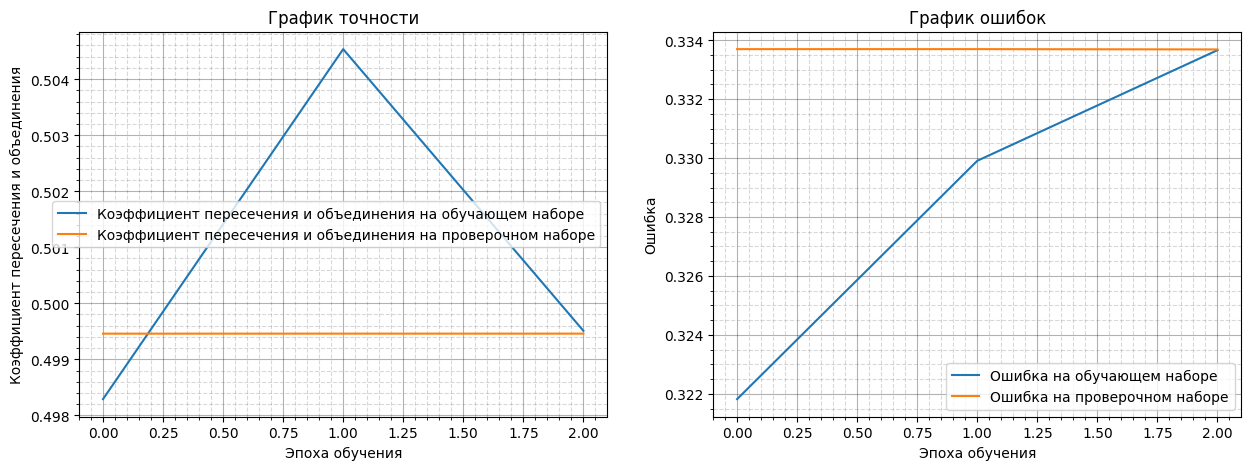

In [ ]:
# смотрим графики обучения
plot_show(["binary_io_u", "loss"],  ["Коэффициент пересечения и объединения", "Ошибка"], history.history)

In [ ]:
# 1 попытка прохода обучения эпохи (работа на батче (1, 512, 512, 1))           !!!! - пока наилучший результат по дайсону !!!! 
# результаты: val_loss =  0.0697;  val_binary_io_u = 0.4995 (здесь трешхолд = 0.9)

CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_ds,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data=test_ds, 
    #validation_steps=validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1  
    #callbacks=[checkpoints, csv_logger]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальный коэфф-т пересечения и объединения на тестовой выборке:", max(history.history["val_binary_io_u"]))

Epoch 1/10
14727/14727 [==============================] - ETA: 0s - loss: 0.3256 - binary_io_u: 0.4940

14727/14727 [==============================] - 4158s 280ms/step - loss: 0.3256 - binary_io_u: 0.4940 - val_loss: 0.3111 - val_binary_io_u: 0.5149
Epoch 2/10
14727/14727 [==============================] - ETA: 0s - loss: 0.1863 - binary_io_u: 0.5291

14727/14727 [==============================] - 4092s 278ms/step - loss: 0.1863 - binary_io_u: 0.5291 - val_loss: 0.0697 - val_binary_io_u: 0.4995
Epoch 3/10
14727/14727 [==============================] - ETA: 0s - loss: 0.0692 - binary_io_u: 0.4995

14727/14727 [==============================] - 4126s 280ms/step - loss: 0.0692 - binary_io_u: 0.4995 - val_loss: 0.0697 - val_binary_io_u: 0.4995
Epoch 4/10
  505/14727 [>.............................] - ETA: 1:01:19 - loss: 0.0616 - binary_io_u: 0.4997

In [ ]:
# сохранение модели для добучений частями
tf.keras.models.save_model("/content/drive/MyDrive/SEGMENT/model_2Dunet")

In [ ]:
# смотрим графики обучения
plot_show(["binary_io_u", "loss"],  ["Коэффициент пересечения и объединения", "Ошибка"], history.history)

#Тестируем 2D модель

##тесты по пациентам из файлов test

In [ ]:
# создаем список пациентов, чьи файлы есть в папке test (LUNG1-002-001(1-001).png)
patients_test = sorted(list(set([ name[0:9] for name in os.listdir(os.path.join(TEST_DIR, ORIG_FOLDER))  ])))
print("test: ", "всего пациентов", len(patients_test), "\n", patients_test)

оценка модели по каждому пациенту

In [ ]:
# в цикле проходим по всем пациентам и создаем наборы X, y (срезы снимка + срезы маски)
for patient_id in patients_test:
    gc.collect()

    # создаем списки путей к оригинальным+маскам файлам конкретного пациента
    patient_files = zip(sorted(os.listdir(os.path.join(TEST_DIR, ORIG_FOLDER))), sorted(os.listdir(os.path.join(TEST_DIR, MASK_FOLDER))))

    print(patient_files[0:5])

    # формируем из файлов пациента датасеты X, Y
    X, Y_true = make_xydataset_patient(patient_files, np.float32, np.uint8)

    # делаем оценку модели на данных пациента
    evaluate_result = model.evaluate(X, Y_true, batch_size=BATCH_SIZE, verbose=0)
    print(f"Пациент {patient_id}, всего срезов {len(patient_files):03d}: значение dice = {1 - patient_evaluate_result[0]}, значение binary_io_u = {patient_evaluate_result[1]}")

    # делаем предсказание модели на данных пациента
    Y_pred = model.predict(X, batch_size=BATCH_SIZE, verbose=0)


предсказание модели по каждому пациенту

##смотрим срезы исходных изображений (dcm-файлы) и из tiff  файлов



смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **не предобработанные** пиксели!!!)


У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


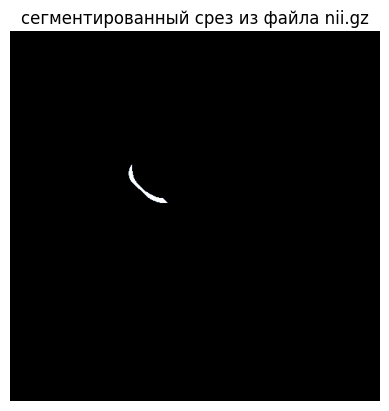

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        128 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


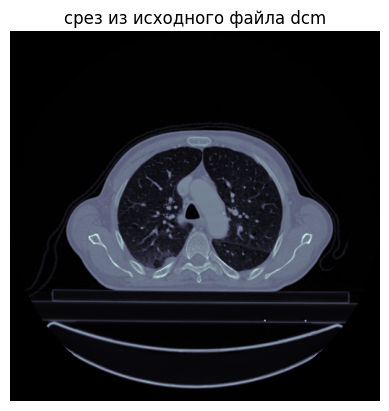

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


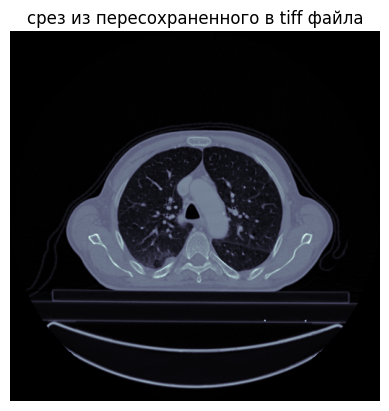

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **предобработанные** пиксели!!!)

У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


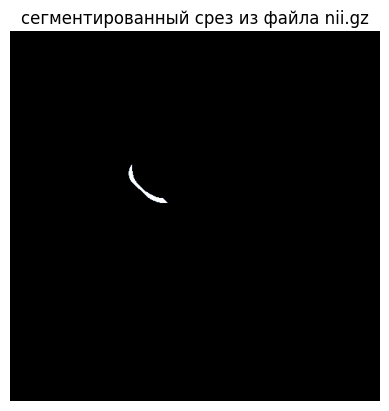

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


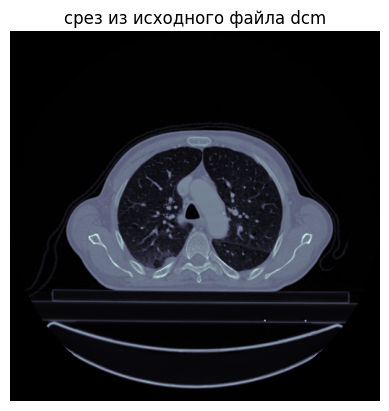

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


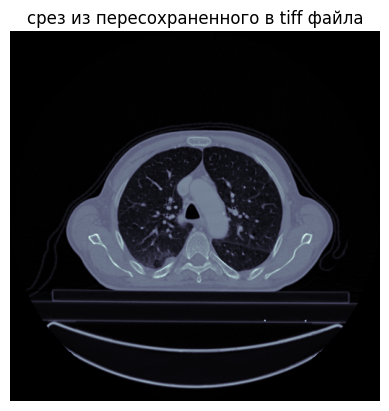

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff

сегментированный срез 42 из первого файла nii.gz
пиксели в срезе: 0.0 1.0


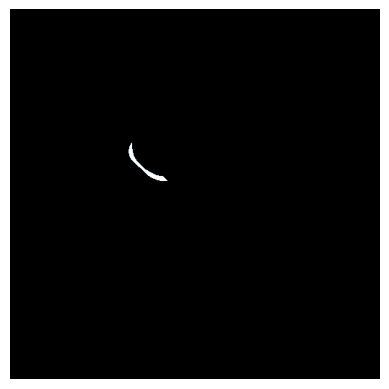

/content/train/class_effusions/LUNG1-002(1-042.dcm)042.tiff
262144 (512, 512)
пиксели в img_array_tiff: -1024 1248
Пересохраненный в формате tiff файл 1-042.dcm


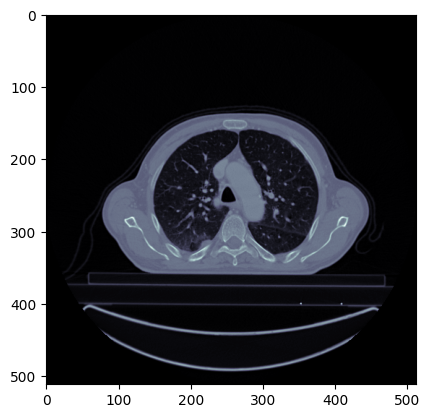

/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm
262144 (512, 512)
пиксели в dcm_file_array: -1024 1248
оригинальный файл 1-042.dcm; номер среза по сортировке = 42


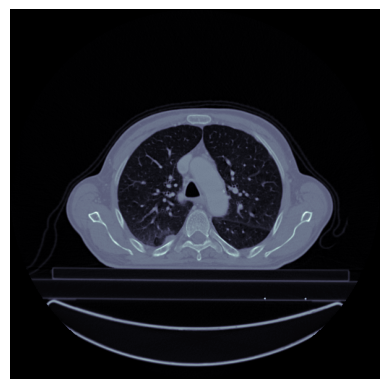

In [ ]:
# проверим, что срезы друг другу соответствуют

# 1 ЕСТЬ ВЫПОТ
# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
print(f"сегментированный срез {nslice + 1} из первого файла nii.gz")
print("пиксели в срезе:", img_array[:, :, nslice].min(), img_array[:, :, nslice].max())
plt.imshow(img_array[:, :, nslice], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
#plt.title(f"сегментированный срез {nslice + 1} из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл)
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(filename)
print(img_array_tiff.size, img_array_tiff.shape)
print("пиксели в img_array_tiff:", img_array_tiff.min(), img_array_tiff.max())
print(f"Пересохраненный в формате tiff файл 1-{nslice + 1:03d}.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальный файл .dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
dcm_file = dicom.dcmread(filename)
dcm_file_array = dcm_file.pixel_array
print(filename)
print(dcm_file_array.size, dcm_file_array.shape)
print("пиксели в dcm_file_array:", dcm_file_array.min(), dcm_file_array.max())
print(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}")
plt.imshow(dcm_file_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
#plt.title(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}") # , fontweight='bold')
plt.show()

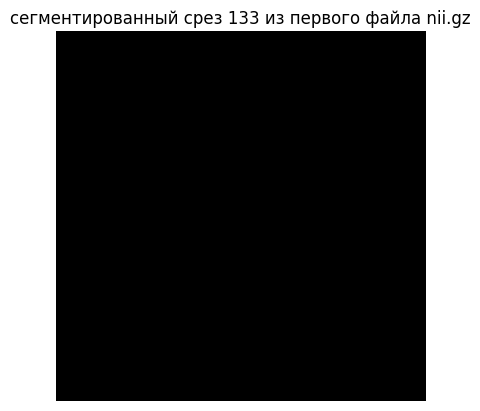

(512, 512)
Пересохраненный в формате png файл 1-001.dcm


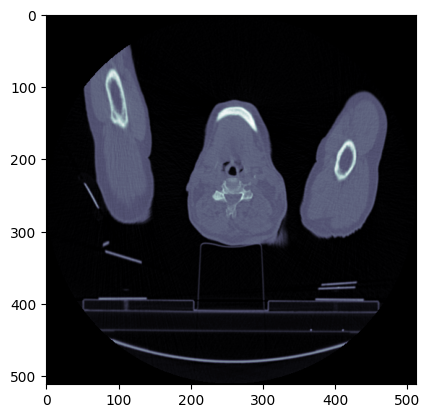

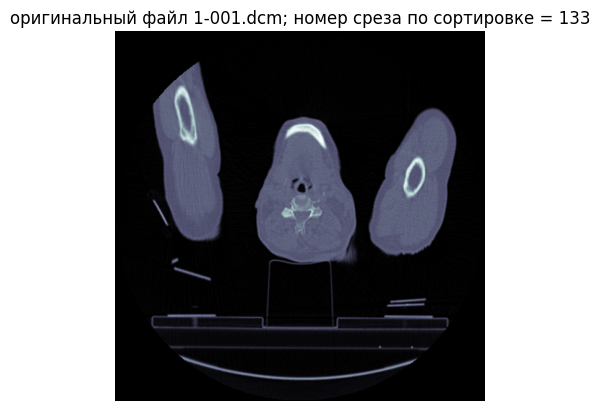

In [ ]:
# проверим, что срезы друг другу соответствуют

# 2 НЕТ ВЫПОТА
# открываем срез сегментов 107 в nii.gz (/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.png  - картинка без выпота)
filename = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
plt.imshow(img_array[:, :, 1], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
plt.title("сегментированный срез 133 из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл) 1-027
filename = "/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(img_array_tiff.size)
print("Пересохраненный в формате tiff файл 1-001.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальны файл 1-001.dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm"
dcm_file = dicom.dcmread(filename)
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
plt.title("оригинальный файл 1-001.dcm; номер среза по сортировке = 133") # , fontweight='bold')
plt.show()

In [ ]:
print("значения в массиве nii.gz", img_array[:, :, 107].min(), img_array[:, :, 107].max())
print("значения в массиве tiff", img_array_tiff.min(), img_array_tiff.max())
print("значения в массиве dcm", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())


значения в массиве nii.gz 0.0 0.0
значения в массиве png 0 2535
значения в массиве dcm 0 2535


#Песочница

In [ ]:
#@title примеры кодов с register_keras_serializable, get_custom_objects

# Для регистрации пользовательской функции loss в Keras через register_keras_serializable, необходимо включить следующие параметры:
# 1. `name`: Уникальное имя для функции потерь.
# 2. `serialization_method`: Функция-обертка, которая преобразует пользовательскую функцию потерь в словарь, который может быть сериализован в JSON.
# 3. `deserialization_method`: Функция-обертка, которая преобразует словарь, сериализуемый в JSON, обратно в пользовательскую функцию потерь.
# 4. `dtype`: Тип данных, который должен быть возвращен пользовательской функцией потерь.

# Вот пример использования функции `register_keras_serializable` для регистрации пользовательской функции потерь:

import tensorflow as tf
from tensorflow.keras.utils import losses_utils

def custom_loss(y_true, y_pred):
    # Некоторый код для вычисления функции потерь
    loss = ...
    return loss

# Функция-обертка для сериализации функции потерь
def custom_loss_to_dict(custom_loss_fn):
    return {'fn': tf.keras.backend.serialize(custom_loss_fn)}

# Функция-обертка для обратной десериализации в функцию потерь
def custom_loss_from_dict(loss_dict):
    return losses_utils.deserialize(loss_dict['fn'])

# Регистрация пользовательской функции потерь в Keras
tf.keras.utils.losses_utils.register_keras_serializable(
    'custom_loss', custom_loss, custom_loss_to_dict, custom_loss_from_dict, dtype=tf.float32)

# После этой регистрации функцию потерь `custom_loss` можно использовать в качестве аргумента при вызове метода `compile()` модели.

In [ ]:
#@title как вывести информацию по использованию памяти при возникновении OOM
# совет от chatGPT
# В случае возникновения ошибки "Out of memory" (OOM) при обучении модели методом `fit()` в Google Colab можно использовать 
# следующий код для вывода информации о распределении памяти:

!pip install memory-profiler
%load_ext memory_profiler
%memit model.fit(X_train, y_train)

# Этот код устанавливает библиотеку `memory-profiler`, загружает расширение `memory_profiler` для Jupyter Notebook, 
# и использует функцию `%memit` для измерения памяти, используемой при выполнении команды `model.fit(X_train, y_train)`. 
# Результаты измерения памяти будут выведены в терминале. Если память закончится, то вы увидите ошибку OOM и количество использованной памяти в момент ошибки.

In [ ]:
#@title пример использование утилиты "tf.keras.utils.image_dataset_from_directory" и tf.data.Dataset
# https://www.tensorflow.org/tutorials/load_data/images
# https://www.tensorflow.org/tutorials/images/classification

# ------------------------------------------------------------------------------
# 1 используем tf.keras.utils.image_dataset_from_directory для создания датасета
# создать обучающий датасет
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# создать проверочный датасет
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# имена классов
class_names = train_ds.class_names
print(class_names)
# вывести первые 9 картинок первого батча в датасете
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("int16"), cmap=plt.cm.bone)
    plt.title(class_names[labels[i]])
    plt.axis("off")
# датасет можно перебирать в цикле
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break   
# нормализация
# используем слой tf.keras.layers.Rescaling
# to scale pixel values to [-1,1] you can instead write tf.keras.layers.Rescaling(1./127.5, offset=-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
# вариант 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# проверяем значения пикселей: Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
# вариант 2 - вставить слой нормализации в модель

# нужно обязательно добавлять, чтобы что-то там улучшить
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# собираем модель
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
# обучаем модель
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)
# ------------------------------------------------------------------------------
# 2 используем tf.data.Dataset для осздания датасета
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
for f in list_ds.take(5):
  print(f.numpy())
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)
# создаем датасеты
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)
# длина датасетов
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())
# функции 
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width]) 
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
# вывести первые 9 картинок первого батча в датасете
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

In [ ]:
#@title тестируем вариант использовать tf.data.Dataset
# -----------------------------------------------------

# используем tf.data.Dataset для осздания датасета
data_dir = TRAIN_DIR
list_ds = tf.data.Dataset.list_files(str(data_dir+'*/*.txt'), shuffle=False)

image_count = list_ds.cardinality().numpy()

# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
for f in list_ds.take(5):
   print(f.numpy())

class_names = np.array(sorted([item for item in glob.glob(data_dir+'*') if item != "LICENSE.txt"]))
print(class_names)

print(image_count)

# # создаем датасеты
# val_size = int(image_count * 0.2)
# train_ds = list_ds.skip(val_size)
# val_ds = list_ds.take(val_size)
# # длина датасетов
# print(train_ds.cardinality().numpy())
# print(val_ds.cardinality().numpy())
# print(train_ds.cardinality().numpy())
# print(val_ds.cardinality().numpy())
# # функции 
# def get_label(file_path):
#   # Convert the path to a list of path components
#   parts = tf.strings.split(file_path, os.path.sep)
#   # The second to last is the class-directory
#   one_hot = parts[-2] == class_names
#   # Integer encode the label
#   return tf.argmax(one_hot)
# def decode_img(img):
#   # Convert the compressed string to a 3D uint8 tensor
#   img = tf.io.decode_jpeg(img, channels=3)
#   # Resize the image to the desired size
#   return tf.image.resize(img, [img_height, img_width]) 
# def process_path(file_path):
#   label = get_label(file_path)
#   # Load the raw data from the file as a string
#   img = tf.io.read_file(file_path)
#   img = decode_img(img)
#   return img, label
# # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
# train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# for image, label in train_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())
# def configure_for_performance(ds):
#   ds = ds.cache()
#   ds = ds.shuffle(buffer_size=1000)
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(buffer_size=AUTOTUNE)
#   return ds

# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)
# # вывести первые 9 картинок первого батча в датасете
# image_batch, label_batch = next(iter(train_ds))
# plt.figure(figsize=(10, 10))
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(image_batch[i].numpy().astype("uint8"))
#   label = label_batch[i]
#   plt.title(class_names[label])
#   plt.axis("off")

# model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=3
# )

b'/content/train/masks/file1_mask.txt'
b'/content/train/masks/file2_mask.txt'
b'/content/train/originals/file1_orig.txt'
b'/content/train/originals/file2_orig.txt'
['/content/train/masks' '/content/train/originals']
4


In [ ]:
#@title скрипт по конвертации dcm файлов в изображения .png
# запуск: python script.py input_data output_data

import os
import argparse
import logging
from glob import glob

import numpy as np
from tqdm import tqdm
from PIL import Image
from pydicom import dcmread
from pydicom.pixel_data_handlers.util import convert_color_space


# Script configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
parser = argparse.ArgumentParser(description='The script is used to convert some kinds of DICOM (.dcm) files to regular image files (.png)')
parser.add_argument('input', type=str, help='A root directory with medical data files in DICOM format. The script finds all these files based on their extension')
parser.add_argument('output', type=str, help='Where to save converted files. The script repeats internal directories structure of the input root directory')
args = parser.parse_args()


class Converter:
    def __init__(self, filename):
        with dcmread(filename) as ds:
            self._pixel_array = ds.pixel_array
            self._photometric_interpretation = ds.PhotometricInterpretation
            self._min_value = ds.pixel_array.min()
            self._max_value = ds.pixel_array.max()
            self._depth = ds.BitsStored

            logging.debug('File: {}'.format(filename))
            logging.debug('Photometric interpretation: {}'.format(self._photometric_interpretation))
            logging.debug('Min value: {}'.format(self._min_value))
            logging.debug('Max value: {}'.format(self._max_value))
            logging.debug('Depth: {}'.format(self._depth))

            try:
                self._length = ds["NumberOfFrames"].value
            except KeyError:
                self._length = 1

    def __len__(self):
        return self._length

    def __iter__(self):
        if self._length == 1:
            self._pixel_array = np.expand_dims(self._pixel_array, axis=0)

        for pixel_array in self._pixel_array:
            # Normalization to an output range 0..255, 0..65535
            pixel_array = pixel_array - self._min_value
            pixel_array = pixel_array.astype(int) * (2 ** self._depth - 1)
            pixel_array = pixel_array // (self._max_value - self._min_value)

            # In some cases we need to convert colors additionally
            if 'YBR' in self._photometric_interpretation:
                 pixel_array = convert_color_space(pixel_array, self._photometric_interpretation, 'RGB')

            if self._depth == 8:
                image = Image.fromarray(pixel_array.astype(np.uint8))
            elif self._depth == 16:
                image = Image.fromarray(pixel_array.astype(np.uint16))
            else:
                raise Exception('Not supported depth {}'.format(self._depth))

            yield image


def main(root_dir, output_root_dir):
    dicom_files = glob(os.path.join(root_dir, '**', '*.dcm'), recursive = True)
    if not len(dicom_files):
        logging.info('DICOM files are not found under the specified path')
    else:
        logging.info('Number of found DICOM files: ' + str(len(dicom_files)))

    pbar = tqdm(dicom_files)
    for input_filename in pbar:
        pbar.set_description('Conversion: ' + input_filename)
        input_basename = os.path.basename(input_filename)

        output_subpath = os.path.relpath(os.path.dirname(input_filename), root_dir)
        output_path = os.path.join(output_root_dir, output_subpath)
        output_basename = '{}.png'.format(os.path.splitext(input_basename)[0])
        output_filename = os.path.join(output_path, output_basename)

        if not os.path.exists(output_path):
            os.makedirs(output_path)

        try:
            iterated_converter = Converter(input_filename)
            length = len(iterated_converter)
            for i, image in enumerate(iterated_converter):
                if length == 1:
                    image.save(output_filename)
                else:
                    filename_index = str(i).zfill(len(str(length)))
                    list_output_filename = '{}_{}.png'.format(os.path.splitext(output_filename)[0], filename_index)
                    image.save(list_output_filename)
        except Exception as ex:
            logging.error('Error while processing ' + input_filename)
            logging.error(ex)

if __name__ == '__main__':
    input_root_path = os.path.abspath(args.input.rstrip(os.sep))
    output_root_path = os.path.abspath(args.output.rstrip(os.sep))

    logging.info('From: {}'.format(input_root_path))
    logging.info('To: {}'.format(output_root_path))
    main(input_root_path, output_root_path)

##примеры из туториала pydicom

https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html

чтение файла dcm, содержание датасета

In [ ]:
# версия
print(dicom.__version__)

# путь к тестовому датасету dicom
fpath = dicom.data.get_testdata_file("CT_small.dcm")    # версия pydicom > 1.4
#fpath = get_testdata_files("CT_small.dcm")[0]          #                < 1.4

# читаем датасет
#ds = dicom.dcmread(fpath)
#ds = dcmread(fpath, force=True)                         # если файл не содержит правильных мета-данных, но содержит DICOM data
with open(fpath, 'rb') as f:
  ds = dicom.dcmread(f)

print(type(ds))                                         # <class 'pydicom.dataset.FileDataset'>

2.3.1
<class 'pydicom.dataset.FileDataset'>


In [ ]:
print(type(ds.SliceLocation))

<class 'pydicom.valuerep.DSfloat'>


In [ ]:
print([ds.SliceLocation])

['-77.2040634155']


In [ ]:
A = (1,2)
A = A + (ds.SliceLocation, )
print(A)
print(type(A[-1]))

(1, 2, '-77.2040634155')
<class 'pydicom.valuerep.DSfloat'>


In [ ]:
# просмотр всего датасета:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

In [ ]:
# доступ к отдельным элементам датасета:
# 1 - через теги: (группа, элемент в группе)
# 2 - через keyword: обычно = имя элемента без пробелов
# (0008, 0016) SOP Class UID                       UI: CT Image Storage
elem = ds[0x0008, 0x0016]
print(elem)
print(elem.keyword)

elem = ds['SOPClassUID']
print(elem)

# значение элемента (элементы могут быть многозначными)
print(elem.value)
print(ds.SOPClassUID)                   # только для стандартных элементов
# многозначный элемент
print(ds.ImageType, ds.ImageType[1])
print(ds['ImageType'].VM)               # количество значений у элемента
# элемент - последовательность (дерево) = список ('pydicom.sequence.Sequence') из 0 или больше 'pydicom.dataset.Dataset' объектов
print(ds[0x0010, 0x1002])
print(ds['OtherPatientIDsSequence'])
print(len(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence[0]))
print(ds.OtherPatientIDsSequence[0])
print(ds.OtherPatientIDsSequence[1])

(0008, 0016) SOP Class UID                       UI: CT Image Storage
SOPClassUID
(0008, 0016) SOP Class UID                       UI: CT Image Storage
1.2.840.10008.5.1.4.1.1.2
1.2.840.10008.5.1.4.1.1.2
['ORIGINAL', 'PRIMARY', 'AXIAL'] PRIMARY
3
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
2 <class 'pydicom.sequence.Sequence'> <class 'pydicom.dataset.Dataset'>
(0010, 0020) Patient ID                          LO: 'ABCD1234'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'
(0010, 0020) Patient ID                          LO: '1234ABCD'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'


In [ ]:
# формат файла DICOM File Format:
# заголовок = 128 byte preamble + 4 byte DICM prefix + required DICOM File Meta Information elements (элементы из группы 0x0002)
print(ds.preamble)
print()
#print(ds.prefix)
print(ds.file_meta)
print()
# самый важный элемент мета-данных заголовка: (0002,0010) Transfer Syntax UID
# определяет кодировку всего датасета, включая пиксельные данные
print(ds.file_meta.TransferSyntaxUID)
print(ds.file_meta.TransferSyntaxUID.name)

b'II*\x00T\x18\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH

In [ ]:
# изменение элементов датасета
elem = ds[0x0010, 0x0010]
print(elem)
elem.value = 'Citizen^Jan'                      # 
# предпочтительнее для стандартных элементов:
ds.PatientName = 'Citizen^Snips' 
# ds.PatientName = None
print(elem)

# многозначные элементы
ds.ImageType = ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
ds.ImageType[1] = 'DERIVED'
ds.ImageType.insert(1, 'PRIMARY')
print(ds.ImageType)

(0010, 0010) Patient's Name                      PN: 'Citizen^Jan'
(0010, 0010) Patient's Name                      PN: 'Citizen^Snips'
['ORIGINAL', 'PRIMARY', 'DERIVED', 'LOCALIZER']


In [ ]:
# сохранить датасет
ds.save_as('out.dcm')

with open('out.dcm', 'wb') as outfile:
  ds.save_as(outfile)

from io import BytesIO
out = BytesIO()
ds.save_as(out)

# для уверенности, что файл запишется в формате DICOM File Format: будет корректно добавлен/изменен загловок
ds.save_as('out.dcm', write_like_original=False)   

сжатие пиксельных данных в датасете

https://pydicom.github.io/pydicom/stable/tutorials/pixel_data/compressing.html

In [ ]:
# датасет с кодировкой "Explicit VR Little Endian" содержит НЕ сжатые пиксельные данные
# каждая кодировка датасета (Transfer Syntax) имет свои требования к инструменту сжатия пиксельных данных
# рекомендуется использовать "GDCM" for Pixel Data compression (поддерживает все кодировки)

# сжатие сторонними библиотеками, добавление в датасет с помощью pydicom
# ----------------------------------------------------------------------
'''
from typing import List, Tuple

from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.encaps import encapsulate, encapsulate_extended
from pydicom.uid import JPEG2000Lossless

path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)

# Use third-party package to compress
# Let's assume it compresses to JPEG 2000 (lossless)
frames: List[bytes] = third_party_compression_func(...)

# Set the *Transfer Syntax UID* appropriately
ds.file_meta.TransferSyntaxUID = JPEG2000Lossless
# For *Samples per Pixel* 1 the *Photometric Interpretation* is unchanged

# Basic encapsulation
ds.PixelData = encapsulate(frames)
ds.save_as("CT_small_compressed_basic.dcm")

# Extended encapsulation
result: Tuple[bytes, bytes, bytes] = encapsulate_extended(frames)
ds.PixelData = result[0]
ds.ExtendedOffsetTable = result[1]
ds.ExtendedOffsetTableLength = result[2]
ds.save_as("CT_small_compressed_ext.dcm")
'''

# сжатие с помощью pydicom (только кодировка "RLE Lossless")
# будут сжаты имеющиеся в датасете пиксельные данные и изменена кодировка (элемент "Transfer Syntax UID") перед сохранением датасета в файл
'''
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless
path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)
ds.compress(RLELossless)
ds.save_as("CT_small_rle.dcm")
'''

# в качесте Pixel Data можно передать в датасет numpy массив 
# массив должен соответствовать мета-данным датасета: Rows, Columns, Samples per Pixel и тд
'''
import numpy as np
arr = np.zeros((ds.Rows, ds.Columns), dtype='<i2')       # np.int16 - 2 байта = 16 бит
ds.compress(RLELossless, arr)
ds.compress(RLELossless, encoding_plugin='pylibjpeg')    # 
'''

пример открыть и вывести картинку

https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html#sphx-glr-download-auto-examples-input-output-plot-read-dicom-py

In [ ]:
# пример открыть и показать файл
'''
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()
'''

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

пример считывания срезов, правильная сортировка, формирование 3D картинки, вывод как картинки

https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py

In [ ]:
# loading multiple files, sorting them by slice location, building a 3D image and reslicing it in different planes
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files = []
# sys.argv - список аргументов командной строки, переданных в скрипт Python при его запуске
# sys.argv[0] - обычно имя самого скрипта, остальные - аргументы
# если запуск из командной строки = "python myscript.py arg1 arg2", то sys.argv будет равен ['myscript.py', 'arg1', 'arg2'].
print('glob: {}'.format(sys.argv[1]))                    
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

In [ ]:
# пробуем цикл с помощью glob
# ---------------------------
# import pydicom as dicom                     # для файлов dcm
# import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению

files = []
i = 0
print('glob: {}'.format(ORIGINAL_DIR))  
# производит реурсивный обход по всем вложенным папкам указанной директории                  
for fname in sorted(glob.glob(ORIGINAL_DIR + "/**/*.dcm", recursive=True)):
    #print("loading: {}".format(fname))
    #files.append(dicom.dcmread(fname))
    files.append(fname)
    i += 1
    if i > 100:
      break
print(files)

# #i = 0
# # цикл по словарю с путями к файлам: каждый файл с исходным изображением добавляем в список, добавляем соответствующую метку
# for patient_id, paths in patients_files_path.items():
#   gc.collect()
#   for file in paths[1]:
#     img_list.append(get_img(os.path.join(paths[0], file)))
#     img_label.append(patients[np.where(patients == int(patient_id[-3:])+1000)[0], 3])
#     print(os.path.join(paths[0], file))
#   #i += 1
#   #if i > 3: break


glob: /content/Dataset/manifest-1586193031612/NSCLC-Radiomics
['/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-005.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-006.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-007.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1

In [ ]:
print(files)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##еще примеры открыть, прочитать, вывести файл

In [ ]:
# Full path of the DICOM file is passed in base
base = ORIGINAL_DIR # r"C:\Users\Ajit Gupta\Documents\dicom image"
pass_dicom = "*.dcm" # "1-12.dcm"  # file name is 1-12.dcm
  
# enter DICOM image name for pattern
# result is a list of 1 element
filename = dicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = dicom.dcmread(filename)
  
# отображение
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
# plt.show()

In [ ]:
# Compressed and uncompressed Pixel Data is always available to be read, changed and written as bytes:
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
print(type(ds.PixelData))
#<class 'bytes'>
print(len(ds.PixelData))
#332768
print(ds.PixelData[:2])
#b'\xaf\x00'

In [ ]:
# Прочтите файл DICOM и отображение - через plt
ds = dicom.dcmread(file)
plt.figure(figsize=(10, 10))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
import pylab
# Прочтите файл DICOM и отображение - через pylab
ds = dicom.dcmread(file)
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

In [ ]:
# извлечь одно изображение из dcm

import pydicom
from matplotlib import plt
 
ds = pydicom.read_file ('C: / Users / **** / Desktop / CT000000.dcm') # Расположение файла DICOM
print(ds.dir ()) # Распечатать все имена DICOM TAG
print(ds.dir ('Pixe')) # печать DICOM TAG, содержащего'pat '
print(ds.PatientName, ds.PatientSex, ds.PatientID, ds.PatientBirthDate, ds.PatientAge) # Распечатайте соответствующее значение атрибута DICOM TAG
print(ds.data_element ('PatientName')) # Распечатать полный элемент данных, включая значение кода DICOMTAG (группа, элемент), VR, значение
print(ds.data_element('PatientID').VR, ds.data_element('PatientID').value)
pixel_bytes = ds.PixelData # Исходный двоичный файл
 
pix = ds.pixel_array # матрица значений пикселей
print(pix.shape) # печать размеров матрицы
plt.imshow(pix, cmap=pylab.cm.bone)
plt.show () # cmap представляет цветовую карту, которой можно задать разные значения для получения различных эффектов отображения и печати изображений dicom

In [ ]:
# извлечь последовательность изображений из набора файлов dcm

import pydicom
import numpy
from matplotlib import plt
 
# Используйте lstFilesDCM в качестве списка для хранения файлов DICOM
PathDicom = "D: / dicom_image / V" # Папка в том же каталоге, что и файл python
lstFilesDCM = []
 
# Прочитать все файлы dicom
for diName, subdirList, fileList in os.walk(PathDicom):
  for filename in fileList:
    if ".dcm" in filename.lower(): # Определить, является ли файл файлом dicom
      print(filename)
      lstFilesDCM.append(os.path.join (diName, filename)) # Добавить в список
 
## Используйте первое изображение в качестве эталонного изображения
RefDs = pydicom.read_file(lstFilesDCM[10]) # читать первое изображение dicom
# print(RefDs)
# print(RefDs.pixel_array)
# print(RefDs.PatientPosition)
plt.imshow(RefDs.pixel_array, cmap=plt.cm.bone)
plt.show()
 
# Создайте трехмерный массив для записи длины, ширины и количества слоев (то есть количества данных dicom)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
print(ConstPixelDims)
 
# Получить значение интервала (в миллиметрах)
# PixelSpacing-Фактическая длина и ширина каждого пикселя, единицы (мм)
# SliceThickness - толщина каждого ломтика, единица (мм)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
 
# Трехмерные данные
# от 0 до (первое измерение плюс один * интервал между пикселями), размер шага - ConstPixelSpacing
x = numpy.arange (0.0, (ConstPixelDims [0] + 1) * ConstPixelSpacing [0], ConstPixelSpacing [0]) 
y = numpy.arange(0.0, (ConstPixelDims[1] + 1) * ConstPixelSpacing[1], ConstPixelSpacing[1])  #
z = numpy.arange(0.0, (ConstPixelDims[2] + 1) * ConstPixelSpacing[2], ConstPixelSpacing[2])  #
print(len(x),"xxxx")
 
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
 
 # Обойти все файлы dicom, прочитать данные изображения и сохранить их в массиве numpy
for filenameDCM in lstFilesDCM:
  ds = pydicom.read_file(filenameDCM)
  ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
 
# Отображение осевой поверхности
# dpi означает количество пикселей на дюйм, чем больше dpi, тем четче печатаемое изображение. Это не относится к размеру изображения.
# Пиксели используются в поле отображения Разрешение используется в поле печати, то есть, когда ваше изображение используется для печати, 
# учитывайте только проблему разрешения
plt.figure(dpi=1000)
# Измените ось на ту же длину
# plt.axes().set_aspect('equal', 'datalim')
plt.axes().set_aspect('equal')
# Меняем картинку на серый цвет
plt.set_cmap(plt.gray())
 
plt.imshow(ArrayDicom [:,:, 360]) # Третье измерение указывает, какой слой в данный момент отображается 
plt.show() 
# Корона дисплей 
plt.figure(dpi=100) 
plt.axes().set_aspect('equal', 'datalim') 
plt.set_cmap(plt.gray()) 
plt.imshow(ArrayDicom[:, 90, :])
plt.show()



# очень похожий код, но с другого сайта
# -------------------------------------
import pydicom
import os
import numpy
from matplotlib import pyplot, cm
# Используйте lstFilesDCM в качестве списка DICOM files
PathDicom = "dicom/2" # папка в том же каталоге, что и файл python
lstFilesDCM = <>
for dirName,subdirList,fileList in os.walk(PathDicom):
    for filename in fileList:
    if ".dcm" in filename.lower (): #judging, является ли файл dicom файл
        print(filename)
        lstFilesDCM.append(os.path.join(dirName,filename)) # добавить в список
## Используйте первое изображение в качестве эталонного изображения
RefDs = pydicom.read_file(lstFilesDCM<0>) # Прочитайте первое dicom изображение
# Создайте три -мерный массив
ConstPixelDims = (int(RefDs.Rows),int(RefDs.Columns),len(lstFilesDCM)) # get spacing значение (mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing<0>), float(RefDs.PixelSpacing<1>), float(RefDs.SliceThickness))
# 3D данные
x = numpy.arange(0.0, (ConstPixelDims<0>+1)*ConstPixelSpacing<0>, ConstPixelSpacing<0>) # 0 to (интервал между первым измерением плюс один*пиксель), степи constpixelSpacing
y = numpy.arange(0.0, (ConstPixelDims<1>+1)*ConstPixelSpacing<1>, ConstPixelSpacing<1>) #
z = numpy.arange(0.0, (ConstPixelDims<2>+1)*ConstPixelSpacing<2>, ConstPixelSpacing<2>) #
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom<:, :, lstFilesDCM.index(filenameDCM)> = ds.pixel_array # осевая поверхность дисплея
    pyplot.figure(dpi=300)
    pyplot.axes().set_aspect('equal', 'datalim')
    pyplot.set_cmap(pyplot.gray())
    pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom<:, :, 2>)) # Третье измерение указывает, что сейчас является первым слоем
    pyplot.show()

In [ ]:
# открыть одно изображение из dcm - с помощью SimpleITK

import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot
 
file = sitk.ReadImage('C:/Users/****/Desktop/CT1227429.dcm')
print(file.GetSize())
print(file.GetOrigin ()) # начало координат
print(file.GetSpacing ()) # Расстояние между пикселями
print(file.GetDirection ()) # Направление
pixel_array = sitk.GetArrayFromImage (file) # матрица пикселей
print(pixel_array.shape) # печать размеров матрицы
image_array = np.squeeze(pixel_array)
print(image_array.shape) #
pyplot.imshow(image_array)
pyplot.show()

In [ ]:
# открыть последовательность изображений из набора файлов dcm - с помощью SimpleITK
reader = sitk.ImageSeriesReader()
reader.MetaDataDictionaryArrayUpdateOn() # Этот шаг предназначен для загрузки общедоступной метаинформации
reader.LoadPrivateTagsOn() # Этот шаг предназначен для загрузки частной метаинформации
# Получить идентификатор последовательности в соответствии с папкой, папка обычно содержит все срезы пациента, 
# которые будут разделены на несколько последовательностей
series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs(directorypath) 
# Выберите один из идентификаторов последовательности, чтобы получить несколько имен файлов последовательности
dicom_names = reader.GetGDCMSeriesFileNames(directorypath, series_ID) 
reader.SetFileNames(dicom_names) # Установить имя файла
image3D = reader.Execute() # Читать последовательность dicom
# Прочитать ключ, принадлежащий срезу, через индекс среза, а затем получить соответствующее значение с помощью индекса среза и ключа
reader.GetMetaDataKeys(slice_index)
reader.GetMetaData(slice_index, key)

In [ ]:
# -*-coding:utf-8-*-
import cv2
import numpy
import dicom
from matplotlib import pyplot as plt
dcm = dicom.read_file("dcm")
dcm.image = dcm.pixel_array * dcm.RescaleSlope + dcm.RescaleIntercept
slices = []
slices.append(dcm)
img = slices[int(len(slices) / 2)].image.copy()
ret, img = cv2.threshold(img, 90, 3071, cv2.THRESH_BINARY)
img = numpy.uint8(img)
im2, contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask = numpy.zeros(img.shape, numpy.uint8)
for contour in contours:
    cv2.fillPoly(mask, [contour], 255)
img[(mask > 0)] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img2 = slices[int(len(slices) / 2)].image.copy()
img2[(img == 0)] = -2000
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(slices[int(len(slices) / 2)].image, 'gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(img, 'gray')
plt.title('Mask')
plt.subplot(133)
plt.imshow(img2, 'gray')
plt.title('Result')
plt.show()

##Пример обработки набора срезов пациента - из статьи "Анализ файлов dicom"
https://russianblogs.com/article/24941332478/

In [ ]:
import cv2
import os
import pydicom
import numpy
import SimpleITK

# Объявление пути и списка
# Папка в том же каталоге, что и файл python для хранения файлов dicom. Путь к файлу не должен содержать китайский
PathDicom = "D:/dicom_image/V"
# Папка в том же каталоге, что и файл python, используемая для хранения файлов mhd и необработанных файлов, путь к файлу не должен содержать китайский
SaveRawDicom = "D:/dicom_image/V/SaveRaw"
lstFilesDCM = []

# Считываем адрес файла dicom в папке PathDicom в lstFilesDCM
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # Определить, является ли файл файлом dicom
            print(filename)
            lstFilesDCM.append(os.path.join(dirName, filename))  # Добавить в список

# Шаг 1. Используйте первое изображение в качестве эталонного и примите во внимание, что все изображения имеют одинаковые размеры.
RefDs = pydicom.read_file(lstFilesDCM[0])  # Прочитать первую картинку dicom

# Шаг 2. Получите размеры трехмерного изображения, состоящего из изображений dicom.
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))  # ConstPixelDims - это кортеж

# Шаг 3: Получите интервал в направлении x и направлении y и получите толщину слоя в направлении z
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

# Четвертый шаг: получить происхождение изображения
Origin = RefDs.ImagePositionPatient

# Создайте трехмерный массив numpy в соответствии с размерами и установите тип элемента: pixel_array.dtype
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)  # array is a numpy array

# Шаг 5: просмотреть все файлы dicom, прочитать данные изображения и сохранить их в массиве numpy
i = 0
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    cv2.imwrite("out_" + str(i) + ".png", ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)])
    i += 1

# Шаг 6: транспонируйте массив numpy, то есть преобразуйте оси координат (x, y, z) в (z, y, x), 
#        это формат файлов хранилища dicom, то есть первое измерение - это ось z для удобства Укладка изображений
ArrayDicom = numpy.transpose(ArrayDicom, (2, 0, 1))

# Седьмой шаг: преобразовать текущий массив numpy в mhd и необработанные файлы через SimpleITK
sitk_img = SimpleITK.GetImageFromArray(ArrayDicom, isVector=False)
sitk_img.SetSpacing(ConstPixelSpacing)
sitk_img.SetOrigin(Origin)
SimpleITK.WriteImage(sitk_img, os.path.join(SaveRawDicom, "sample" + ".mhd"))

##Пример предобработки медицинских изображений (из статьи)

(https://russianblogs.com/article/22763178929/)

In [ ]:
# 0 - библиотеки
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
 
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
# 1 Корневый каталог содержит каталог всех каталога пациентов
#INPUT_FOLDER = '../input/sample_images/'
patients = sorted(os.listdir(ORIGINAL_DIR))  # INPUT_FOLDER

In [ ]:
# 2 Сканируйте каталог пациента, загрузите все срезы, сортируйте срез в направлении переключения Z и получите толщину нарезки
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'

    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))  
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
 
    for s in slices:
        s.SliceThickness = slice_thickness
 
    return slices

In [ ]:
# 3. По умолчанию значение, полученное из файла DICOM, является единицей HU. Вам нужно решить эту проблему.
# HU = Pixel Value * Rescale Slope + Rescale Intercept

def get_pixels_hu(slices):
         # np.stack соединил список 2D массивов в 3D массив
    image = np.stack([s.pixel_array for s in slices])
         # Преобразован в int16, int16 в порядке, потому что все значения должны быть <32K
    image = image.astype(np.int16)
 
         # Установите элемент за пределами границы на 0
    image[image == -2000] = 0
 
         # Преобразован в блок HU
    for slice_number in range(len(slices)):
 
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
 
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
 
        image[slice_number] += np.int16(intercept)
 
    return np.array(image, dtype=np.int16)

In [ ]:
# 4. Посмотреть изображение пациента:
first_patient = load_scan(INPUT_FOLDER + patients[0])
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
 
 # Показать кусочек средней позиции
plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()

In [ ]:
# 5 5. Re -Sampling
# Возможное расстояние между пикселями КТ составляет [2,5, 0,5, 0,5], что означает, что расстояние между срезами составляет 2,5 мм. 
# Для различных сканирований расстояние среза может быть различным, а автоматический анализ является проблемой.
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
 
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
 
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
 
    return image, new_spacing
 
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

In [ ]:
# 6. Нарисуйте 3D -изображение
# Отображение сканирования трехмерных изображений, и интуитивное ощущение данных полезно для обработки данных.

def plot_3d(image, threshold=-300):
 
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
 
    verts, faces = measure.marching_cubes(p, threshold)
 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
 
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
 
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
 
    plt.show()

In [ ]:
# 7, разрезание легких
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
 
    counts = counts[vals != bg]
    vals = vals[vals != bg]
 
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None
 
def segment_lung_mask(image, fill_lung_structures=True):
 
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
 
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
 
    #Fill the air around the person
    binary_image[background_label == labels] = 2
 
 
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
 
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1
 
 
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
 
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image
 
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)
 
plot_3d(segmented_lungs, 0)

In [ ]:
plot_3d(segmented_lungs_fill, 0)

In [ ]:
# нормализация данных
MIN_BOUND = -1000.0
MAX_BOUND = 400.0
 
def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [ ]:
# 8. Центр данных нулевых данных
# В качестве окончательного этапа предварительной обработки рекомендуется установить средние данные на ноль. 
# По этой причине просто уменьшите среднее значение пикселя от всех пикселей.
# Чтобы определить это значение, только среднее из всех изображений во всем наборе данных.

Pixel_mean = 0,25 # Предполагая, что среднее значение составляет 0,25
 
def zero_center(image):
    image = image - PIXEL_MEAN
    return image

In [ ]:
# 9. Наконец
# Через вышеуказанные шаги изображение доступно для CNN или других методов машинного обучения. 
# Вы можете выполнить все эти шаги в автономном режиме (один раз и сохранить результаты). 
# Рекомендуется, чтобы вы сделали это и позволили ему работать в течение ночи, потому что это может занять много времени.
# Совет: чтобы сохранить пространство для хранения, пожалуйста, не стандартизируйте и ноль заранее, а в онлайн -обработку 
# (после обучения, после загрузки). Если вы еще не сделали этого, ваше изображение INT16, которое меньше, чем Float32 и его легче сжимать.

##открыть Pixeldata из файла dcm как np-массив, отобразить

In [ ]:
# If NumPy is installed, Pixel Data can be converted to an ndarray using the Dataset.pixel_array property:
#---------------------------------------------------------------------------------------------------------
arr = ds.pixel_array
print(arr.shape)
#(128, 128)
print(arr)

In [ ]:
# Change a patient's ID
#----------------------
from pydicom import dcmread

ds = dcmread("/path/to/file.dcm")
# Edit the (0010,0020) 'Patient ID' element
ds.PatientID = "12345678"
ds.save_as("/path/to/file_updated.dcm")

In [ ]:
# Display the Pixel Data
#-----------------------
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

##прочие варианты, пробы

In [ ]:
import nibabel as nib
import os

In [ ]:
#@title  класс io.BytesIO() - для создания временного буфера и записи в него данных в виде байтов
import io

buffer = io.BytesIO()                # Создаем буфер в памяти
buffer.write(b'Hello, world!')       # Записываем данные в буфер
data = buffer.getvalue()             # Считываем данные из буфера
print(data.decode())                 # Выводим данные на экран

In [ ]:
#@title варианты загрузки файлов в Колаб с локального компьютера

from google.colab import files
uploaded = files.upload()                              # можно выбрать несколько файлов, нельзя - папку
# fn = "uploadfilename.ext2"
# uploaded_file = files.upload_file(fn)                   # выбираем файл, сохраняем под именем fn

print(uploaded)

dir(files)
['_FileHandler',
 '_IPython',
 '_V6Server',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_base64',
 '_collections',
 '_get_unique_filename',
 '_http_server',
 '_json',
 '_os',
 '_output',
 '_pkgutil',
 '_socket',
 '_socketserver',
 '_upload_file',
 '_upload_files',
 '_urllib',
 '_uuid',
 'download',
 'upload',
 'upload_file',
 'view']


Saved LUNG1-018_effusion_third_reviewer.nii.gz to /content/uploadfilename.ext2


In [ ]:
#@title информация от chatGPT: как закачать с локальной машины файлы (zip) в сессию
# ---------------------------------------------------------------------------------

from google.colab import files
import zipfile
import os
#import shutil

def upload_and_extract():
    print("Укажите файлы для загрузки:")
    uploaded = files.upload()                            # можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
        if zipfile.is_zipfile(name):
            with zipfile.ZipFile(name, 'r') as zipped:
                zipped.extractall('/content/')
            os.remove(name)
        
# def main():
#     upload_and_extract()

# if name == "main":
#     main()

In [ ]:
#@title информация от ТГ-chatGPT3.5: как закачать с удаленной гугл-папки файл (zip) в память и распаковать в /content/
# --------------------------------------------------------------------------------------------------------------------

import requests
import zipfile
import io
import os

# URL папки на чужом гугл-диске
url = 'https://drive.google.com/drive/folders/1234567890'

# ID файла dataset.zip
file_id = 'qwertyuiop'

# Загрузка файла в память
response = requests.get(f'https://drive.google.com/uc?id={file_id}&export=download')
file = zipfile.ZipFile(io.BytesIO(response.content))

# Распаковка файла в папку /content/my_folder
file.extractall('/content/my_folder')

# Удаление загруженного файла из памяти
os.remove(file)

In [ ]:
#@title информация от ТГ-chatGPT3.5: код для загрузки файла с расширением "nii.gz" в память ноутбука в Colab
# ----------------------------------------------------------------------------------------------------------

!pip install nibabel         # установка библиотеки nibabel для работы с файлами NIfTI
import nibabel as nib        # импорт библиотеки nibabel

filename = "example.nii.gz"  # имя файла
img = nib.load(filename)     # загрузка файла в память

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
import matplotlib.pyplot as plt  # импорт библиотеки matplotlib

plt.imshow(img.get_fdata()[:, :, 50], cmap="gray")  # отображение среза изображения по оси Z
plt.show()  # показ изображения


# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
import numpy as np

data = img.get_fdata()  # получение данных изображения в виде numpy массива

In [ ]:
#@title код от Андрея Н. - загрузить и открыть файлы dcm/nii.gz
# --------------------------------------------------------------

# Загружаем библиотеки
!pip install pydicom
import os
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import gdown
import pydicom as dicom
import nibabel as nib

image_list = []
gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001.zip', None, quiet=True)
!unzip -qo LUNG1-001 -d /content/data
folder_path = '/content/data/LUNG1-001'
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.dcm'):
        image_list.append(os.path.join(folder_path, filename))

n = 69
image_path = image_list[n-1]
ds = dicom.dcmread(image_path)

# Загрузка масок nii.gz
image_path1 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_thor_cav_primary_reviewer.nii.gz', None, quiet=True)
image_path2 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_effusion_second_reviewer.nii.gz', None, quiet=True)
image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
print(f"Размерность объекта изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность объекта изображения сегментирование плеврального выпота:  {height2}, ширина: {width2}, глубина:{depth2}")
# Показывает изображения слоя
plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(ds.pixel_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Сегментирование грудной клетки', fontweight='bold')
plt.imshow(rotated_image1[:, :, n], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
# загружаем архив dataset.zip
#import gdown
#gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip', None, quiet=True)

# пишет:
# Access denied with the following error:
#	Cannot retrieve the public link of the file. You may need to change
#	the permission to 'Anyone with the link', or have had many accesses. 
#file_name = gdown.download('https://drive.google.com/uc?id=1o1UtbUnM51in3f07s-XxB4Kmkq40v-76', None, quiet=True)

# ошибка (качает кусок файла, размер не совпадает!): 
# You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
#file_name = gdown.download('https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip', None, quiet=True)

# не качает!! ?? и никаких сообщений не выводит
#!wget -q "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip"  

In [ ]:
#@title коды для деления выборки на части, вычисления весов классов

# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(lst))),
                                       stratify=y_data,            # не используем на выборке с 1-ыми классами
                                       test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True) 




# # вычисляем веса классов - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# y_train_seq = np.argmax(y_train_01_res, axis=-1)
# class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

# print(class_weights.shape)
# print(class_weights)

# # создаем словарь весов для метода fit - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# class_weights_dict = dict(zip([i for i in range(0, CLASS_COUNT)], list(class_weights)))
# print(class_weights_dict)

# вычисляем веса классов - только ОСНОВНОЙ класс (нулевой индекс в списке классов)
# !!!! веса классов не применимы для сети с несколькими выходами !!!!!
y_train_seq = np.argmax(y_train_list[0], axis=-1)
class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

print(class_weights.shape)
print(class_weights)




# # номер ячейки для повтора действий: 5
# # Получение индексов разделения основного набора на обучающую и тестовую выборки
# idx_train, idx_test = train_test_split(list(range(len(x_data))),
#                                        stratify=y_data,            # не используем на выборке с 1-ыми классами
#                                        test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True)  
# # Разделение на обучающую/тестовую в соответствии с полученными индексами
# x_train, x_test = x_data[idx_train], x_data[idx_test]
# x_train_clip, x_test_clip = x_data_clip[idx_train], x_data_clip[idx_test]
# x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
# y_train, y_test = y_data[idx_train], y_data[idx_test]

##тесты разных команд

In [ ]:
# смотрим, как из двух датасетов со списками файлов создать датасет из согласованных пар файлов 

orig_list_ds = tf.data.Dataset.list_files(str(TRAIN_DIR + ORIG_FOLDER + "/*.png"), shuffle=True, seed=123)
mask_list_ds = tf.data.Dataset.list_files(str(TRAIN_DIR + MASK_FOLDER + "/*.png"), shuffle=True, seed=123)
print("orig")
print(*list(orig_list_ds.as_numpy_iterator())[0:5], sep="\n")
print("mask")
print(*list(mask_list_ds.as_numpy_iterator())[0:5], sep="\n")

train_list_ds = tf.data.Dataset.zip((orig_list_ds, mask_list_ds))
print("train")
print(*list(train_list_ds.as_numpy_iterator())[0:5], sep="\n")

orig
b'/content/train/originals/LUNG1-418-070(1-070).png'
b'/content/train/originals/LUNG1-320-122(1-122).png'
b'/content/train/originals/LUNG1-330-112(1-112).png'
b'/content/train/originals/LUNG1-393-043(1-043).png'
b'/content/train/originals/LUNG1-205-027(1-27).png'
mask
b'/content/train/masks/LUNG1-418-070(1-064).png'
b'/content/train/masks/LUNG1-320-122(1-010).png'
b'/content/train/masks/LUNG1-330-112(1-023).png'
b'/content/train/masks/LUNG1-393-043(1-092).png'
b'/content/train/masks/LUNG1-205-027(1-068).png'
train
(b'/content/train/originals/LUNG1-331-115(1-115).png', b'/content/train/masks/LUNG1-331-115(1-020).png')
(b'/content/train/originals/LUNG1-393-054(1-054).png', b'/content/train/masks/LUNG1-393-054(1-081).png')
(b'/content/train/originals/LUNG1-336-006(1-006).png', b'/content/train/masks/LUNG1-336-006(1-129).png')
(b'/content/train/originals/LUNG1-396-001(1-001).png', b'/content/train/masks/LUNG1-396-001(1-134).png')
(b'/content/train/originals/LUNG1-161-077(1-077).png', 

In [ ]:
# смотрим как найти путь к конкретному файлу по шаблону

tt = tf.io.gfile.glob(TRAIN_DIR+'originals/*.png')
print(type(tt))
print(tt)
print("---------------------------")
fn = tt[2]
print(fn)
print("---------------------------")
fn2 = fn[0:fn.find("(")].replace("originals", "masks") + "*.png"
print(fn2)
tt2 = tf.io.gfile.glob(fn2)
print(tt2[0])
print("---------------------------")
print(tf.io.gfile.glob(fn[0:fn.find("(")].replace("originals", "masks") + "*.png")[0])

<class 'list'>
['/content/train/originals/file3_orig.png', '/content/train/originals/file1_orig.png', '/content/train/originals/LUNG-003-014(1-013).png']
---------------------------
/content/train/originals/LUNG-003-014(1-013).png
---------------------------
/content/train/masks/LUNG-003-014*.png
/content/train/masks/LUNG-003-014(1-286).png
---------------------------
/content/train/masks/LUNG-003-014(1-286).png


In [ ]:
# смотрим, как обрабатывать изображения с помощью PIL

# from PIL import Image
# import numpy as np

# # Создание numpy массива
# array = np.zeros((512, 512, 111))
# # Преобразование массива в изображение
# image = Image.fromarray(array)
# # Сохранение изображения в формате PNG
# image.save('image.png')
# # Открываем файл с изображением
# img = Image.open('image.png')
# # Выводим размеры изображения
# print(img.size)
# # Отображаем изображение
# img.show()
# # Преобразуем изображение в numpy массив
# a
# # Выводим размеры массива
# print(arr.shape)


# ------------------------------------------------------------
from PIL import Image
import numpy as np

# Создание numpy массива размера (512, 512) с элементами типа np.int16
arr = np.random.randint(low=0, high=65536, size=(512, 512), dtype=np.uint16)

#print(arr.dtype)
# Приведение значений массива к диапазону от 0 до 255
#arr = (arr / 65535 * 255).astype(np.uint8)

print(arr.min(), arr.max())
# Создание изображения из массива и сохранение в файле
img = Image.fromarray(arr)
# Отображаем изображение
img.show()

arr2 = np.array(img)
print(arr.min(), arr.max())

#img.save('image.png')

In [ ]:
# смотрим, как происходт вращение 3D массива; нам надо, чтобы повернулись срезы
image_np3d = np.zeros(shape=(2, 2, 3), dtype=np.uint8) 
image_np3d[:, :, 0] = np.arange(4).reshape((2,2))
image_np3d[:, :, 1] = np.arange(4, 8).reshape((2,2))
image_np3d[:, :, 2] = np.arange(8, 12).reshape((2,2))
print(image_np3d)
print("-------------------")
print(np.rot90(m=image_np3d, k=1, axes=(0,1)))    # поворот всех срезов
print("-------------------")
image_np3d_2 = np.zeros(shape=(2, 2, 3), dtype=np.uint8) 
image_np3d_2[:, :, 0] = np.rot90(np.arange(4).reshape((2,2)))
image_np3d_2[:, :, 1] = np.rot90(np.arange(4, 8).reshape((2,2)))
image_np3d_2[:, :, 2] = np.rot90(np.arange(8, 12).reshape((2,2)))
print(image_np3d_2)
print("-------------------")
print("срез из image_np3d")
print(image_np3d[:, :, 0])
print("срез из image_np3d_2")
print(image_np3d_2[:, :, 0])

[[[ 0  4  8]
  [ 1  5  9]]

 [[ 2  6 10]
  [ 3  7 11]]]
-------------------
[[[ 1  5  9]
  [ 3  7 11]]

 [[ 0  4  8]
  [ 2  6 10]]]
-------------------
[[[ 1  5  9]
  [ 3  7 11]]

 [[ 0  4  8]
  [ 2  6 10]]]
-------------------
срез из image_np3d
[[0 1]
 [2 3]]
срез из image_np3d_2
[[1 3]
 [0 2]]


In [ ]:
# смотрим, как поменять очередность срезов 3D массива
image_np3d = np.zeros(shape=(2, 2, 3), dtype=np.uint8) 
image_np3d[:, :, 0] = np.arange(4).reshape((2,2))
image_np3d[:, :, 1] = np.arange(4, 8).reshape((2,2))
image_np3d[:, :, 2] = np.arange(8, 12).reshape((2,2))
print(image_np3d)
print(image_np3d[:, :, 0])
print(image_np3d[:, :, 1])
print(image_np3d[:, :, 2])
print("---------------------")
image_np3d_rev = image_np3d[:, :, ::-1]
print(image_np3d_rev)
print(image_np3d_rev[:, :, 0])
print(image_np3d_rev[:, :, 1])
print(image_np3d_rev[:, :, 2])
print("---------------------")
image_np3d_rev2 = np.flip(m=image_np3d, axis=2)
print(image_np3d_rev2)
print(image_np3d_rev2[:, :, 0])
print(image_np3d_rev2[:, :, 1])
print(image_np3d_rev2[:, :, 2])

[[[ 0  4  8]
  [ 1  5  9]]

 [[ 2  6 10]
  [ 3  7 11]]]
[[0 1]
 [2 3]]
[[4 5]
 [6 7]]
[[ 8  9]
 [10 11]]
---------------------
[[[ 8  4  0]
  [ 9  5  1]]

 [[10  6  2]
  [11  7  3]]]
[[ 8  9]
 [10 11]]
[[4 5]
 [6 7]]
[[0 1]
 [2 3]]
---------------------
[[[ 8  4  0]
  [ 9  5  1]]

 [[10  6  2]
  [11  7  3]]]
[[ 8  9]
 [10 11]]
[[4 5]
 [6 7]]
[[0 1]
 [2 3]]


In [ ]:
# смотрим, как работает фиксатор псевдогенерации
np.random.seed(0)
lst1 = sorted("abcdifghijklmnopqrst")
lst2 = sorted("tsrqponmlkjihgfidcba")
print(lst1)
print(list(np.random.permutation(lst1)))
print()
print(lst2)
print(list(np.random.permutation(lst2)))

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
# как работает repeat
depth_add = 304 - 250
depth_index = depth_add // 2

image_np = np.full(shape=(512, 512, 250), fill_value=1)
H, W, D = image_np.shape
temp_slice = np.full(shape=(H, W, 1), fill_value=99, dtype=image_np.dtype)              # новый срез
# добавляем срезы в исходный массив до D штук
image_np = np.dstack(tup=(np.repeat(temp_slice, depth_index, axis=-1),                   # размножили срез на половину нужного количества срезов
                          image_np,                                                      # исходный массив
                          np.repeat(temp_slice, depth_add - depth_index, axis=-1)))      # размножили срез на оставшееся количество срезов
print(image_np.shape)

In [ ]:
# как работает repeat
arr = np.arange(1, 17).reshape(4,4)
print(arr.shape)
print(arr)
np.expand_dims(arr, axis=2)
print(arr.shape)
print(arr)
arr = arr[:, :, np.newaxis]
print(arr.shape)
print(arr)

print(np.repeat(arr, 3, axis=-1))
print(tf.repeat(arr, 3, axis=-1))
print()

(4, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
(4, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
(4, 4, 1)
[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
[[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[ 9  9  9]
  [10 10 10]
  [11 11 11]
  [12 12 12]]

 [[13 13 13]
  [14 14 14]
  [15 15 15]
  [16 16 16]]]
tf.Tensor(
[[[ 1  1  1]
  [ 2  2  2]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 6  6  6]
  [ 7  7  7]
  [ 8  8  8]]

 [[ 9  9  9]
  [10 10 10]
  [11 11 11]
  [12 12 12]]

 [[13 13 13]
  [14 14 14]
  [15 15 15]
  [16 16 16]]], shape=(4, 4, 3), dtype=int64)

[]


In [ ]:
print(np.repeat(arr, 0, axis=-1))
print("arr.shape", arr.shape)

new_arr = np.dstack(tup=(np.repeat(arr, 2, axis=-1), 
                         arr,   
                         np.repeat(arr, 0, axis=-1))) 

print("new_arr.shape", new_arr.shape)
print(new_arr[:, :, :2])

[]
arr.shape (4, 4, 1)
new_arr.shape (4, 4, 3)
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]]

 [[ 5  5]
  [ 6  6]
  [ 7  7]
  [ 8  8]]

 [[ 9  9]
  [10 10]
  [11 11]
  [12 12]]

 [[13 13]
  [14 14]
  [15 15]
  [16 16]]]


In [ ]:
print(new_arr[:, :, 1:2])

[[[ 1]
  [ 2]
  [ 3]
  [ 4]]

 [[ 5]
  [ 6]
  [ 7]
  [ 8]]

 [[ 9]
  [10]
  [11]
  [12]]

 [[13]
  [14]
  [15]
  [16]]]
